In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import isclose

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

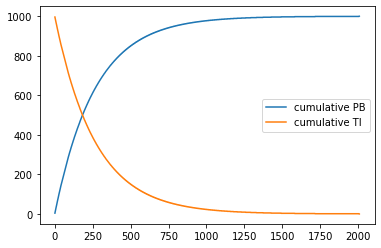

In [2]:
tau = 3.052 * 60
n_atoms = 1000

def p(t):
    return 1 - 2 ** (-t/tau)

def decay_atoms(atoms, t):
    n_atoms_to_decay = round(len(atoms) * p(t))
    atoms[:n_atoms_to_decay] = 1
    return atoms

# array of zeros means not decayed
atoms = np.zeros(n_atoms)
t=0
cumulative_pb = []
cumulative_ti = []
while atoms.sum() != len(atoms):
    t += 1
    # atoms = np.array(list(map(decay, atoms)))
    atoms = decay_atoms(atoms, t)
    
    cumulative_pb.append(atoms.sum())
    
    cumulative_ti.append(n_atoms - atoms.sum())
    
plt.plot ( range(len(cumulative_pb)),cumulative_pb, label="cumulative PB")
plt.plot ( range(len(cumulative_ti)),cumulative_ti, label="cumulative TI")

plt.legend()

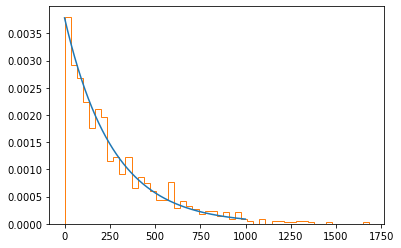

In [3]:
def pdf(t):
    return (2 **(-t/tau)) * np.log(2) / tau
    
def icdf(t):
    return (-tau * np.log(1-t)/np.log(2))

u = np.random.random(1000)
v = icdf(u)

a=list(map(pdf, range(len(v))))

plt.plot(range(1000), a)
h, bins, _ = plt.hist(v, histtype = 'step', bins=50, density=True)


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  


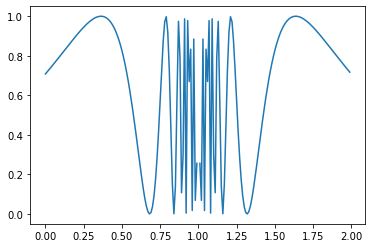

In [4]:
def f(x):
    return np.sin(1/(1-x)) ** 2

x = np.arange(0, 2, 0.01) 
plt.plot(x, f(x))

In [5]:
def print_statistics(f, N):
    integrals = []
    for i in range (1000):
        integrals.append(f(N))
    integrals = np.array(integrals) 
    print("mean with %d points :%.4f" % (N, integrals.mean()))
    print("standard deviation with %d points :%.4f" % (N, integrals.std()/integrals.mean() ))
    
def integral_hit_miss(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is between 0 and 2
        y = np.random.random() # y is between 0 and 1
        if y < f(x):
            count +=1
    return 2 * count / N

N=1000
print_statistics(integral_hit_miss, N)

mean with 1000 points :1.3473
standard deviation with 1000 points :0.0212


In [6]:
def integral_mean_value(N):
    b = 2
    a = 0
    x = np.random.random(N)
    sum_y = np.sum(f(x))
    return (b-a) / N *sum_y

print_statistics(integral_mean_value, N)

mean with 1000 points :1.3481
standard deviation with 1000 points :0.0148


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
def circle(x, y):
    if (x ** 2) + (y**2) <= 1:
        return 1
    return 0

def integral_hit_miss_circle(N):
    count = 0
    for i in range(N):
        x = (2 * np.random.random()) -1 # x is between -1 and 1
        y = (2 * np.random.random()) -1 # y is between -1 and 1
        if circle(x, y) == 1:
            count +=1
    return 4 * count / N


N = 100000
I = integral_hit_miss_circle(N)
print("Monte Carlo Integration for 2D circle using hit/miss algorithm and %d random points is %.4f" % ( N, I))
print ("Is the result close to the real one? ",  isclose(I, np.pi, rel_tol=1e-3))

Monte Carlo Integration for 2D circle using hit/miss algorithm and 100000 random points is 3.1400
Is the result close to the real one?  True


In [16]:
def sphere(x):
    x = x**2
    sum_x = x.sum()
    if sum_x <= 1:
        return 1
    return 0

def integral_hit_miss_sphere(N, dim):
    count = 0
    for i in range(N):
        x = (2 * np.random.random(size = dim)) - 1
        if sphere(x) == 1:
            count +=1
    return 4 * count / N
integral_hit_miss_sphere(N, 2)

[ 0.35197474 -0.65391603]
[-0.23421533 -0.3631877 ]
[ 0.77195971 -0.74782276]
[-0.17466747 -0.04971607]
[0.53810689 0.21764673]
[-0.81564849  0.14299459]
[0.87047939 0.3669944 ]
[ 0.19919723 -0.19974614]
[-0.44655805  0.77184939]
[-0.13720158 -0.97774549]
[-0.30872427  0.8231711 ]
[0.898462   0.73967103]
[ 0.03198334 -0.44842728]
[0.50113322 0.01997246]
[-0.72694548 -0.81903117]
[-0.44264051 -0.82160264]
[-0.17614264 -0.5105477 ]
[0.3688045  0.85675189]
[0.3493128  0.10815323]
[0.10178247 0.60524749]
[ 0.94581101 -0.99636107]
[-0.61462593 -0.58814834]
[ 0.52109383 -0.99535064]
[-0.59334427 -0.03868395]
[0.80647282 0.1875065 ]
[-1.39678812e-04 -5.48539279e-01]
[ 0.63929991 -0.76522054]
[ 0.792338   -0.10973453]
[-0.17548554  0.44747146]
[-0.42146198  0.00957831]
[-0.40961195 -0.55749722]
[-0.19135109 -0.86370165]
[-0.75470723 -0.48684092]
[0.58172128 0.15574144]
[-0.37317262 -0.11002658]
[0.66528416 0.02346175]
[ 0.21281898 -0.08782175]
[ 0.96113715 -0.34552299]
[0.6428318  0.17249965]


[ 0.99956759 -0.59752433]
[-0.87753588  0.68142914]
[0.90289989 0.85199943]
[0.1861562 0.4401714]
[-0.22294474 -0.72267978]
[0.58161542 0.93814185]
[0.85349039 0.54278354]
[0.28358901 0.49439464]
[-0.53984777  0.66586388]
[0.58439372 0.70487631]
[-0.67906387  0.25528078]
[-0.93468173  0.44192735]
[-0.5339333 -0.4624532]
[-0.28451273 -0.94623569]
[-0.67815053  0.66571333]
[-0.86041379  0.20734271]
[0.79661876 0.82482281]
[-0.13392365 -0.63039907]
[ 0.00054693 -0.53534611]
[-0.14049489 -0.27383764]
[0.46673148 0.72330792]
[-0.10321616 -0.10062832]
[-0.61806127 -0.52493862]
[ 0.47790677 -0.35878182]
[ 0.14080998 -0.96035723]
[-0.27007438  0.49888345]
[-0.75361971  0.05435587]
[ 0.37919996 -0.75070044]
[-0.7455593   0.51571709]
[-0.26778362 -0.12329194]
[0.61339239 0.09285263]
[-0.55861892 -0.53010409]
[ 0.98862787 -0.80295796]
[ 0.23942207 -0.84948267]
[-0.14499353 -0.96628553]
[-0.31656752  0.55324596]
[-0.25932561  0.75342924]
[-0.09988988 -0.9477149 ]
[ 0.43558292 -0.75684468]
[0.71184

[-0.89264736  0.17262792]
[0.52207851 0.47925362]
[0.93310275 0.64523314]
[0.15987708 0.49111224]
[ 0.05530257 -0.83300844]
[0.27038385 0.22175112]
[-0.43169677 -0.71567471]
[ 0.8099797  -0.23757389]
[-0.88087908 -0.28724509]
[0.75583176 0.01236868]
[0.16789458 0.60861792]
[-0.67253897  0.71178748]
[-0.24760206  0.62426354]
[-0.18615027 -0.39831772]
[-0.0712412   0.88431118]
[-0.9758554   0.80615749]
[-0.79579721  0.45892712]
[ 0.92027022 -0.39886916]
[-0.41613611  0.26403649]
[ 0.84232295 -0.60677532]
[ 0.11843807 -0.44036183]
[ 0.37102407 -0.11825002]
[0.32193515 0.70261318]
[-0.99693893 -0.36265725]
[-0.27687303 -0.39352517]
[ 0.48161154 -0.87883698]
[ 0.15789603 -0.29174224]
[-0.69779151  0.15271959]
[-0.06594301 -0.85898565]
[-0.32842087  0.61635922]
[0.43024522 0.95345484]
[-0.21542667  0.72803931]
[-0.46134923  0.17596944]
[-0.44541515 -0.89941442]
[-0.15177549 -0.3632406 ]
[0.35426005 0.78445787]
[ 0.7196892  -0.98412783]
[-0.77186202  0.69665252]
[0.65624863 0.31872744]
[-0.81

[ 0.84969289 -0.05463797]
[-0.17111345 -0.12031168]
[0.87710799 0.36710196]
[0.02760377 0.81713103]
[-0.80224824 -0.9999425 ]
[-0.38251175 -0.72856455]
[0.26068952 0.23593435]
[-0.46785495 -0.5912903 ]
[-0.92953203 -0.44170065]
[ 0.2059566  -0.81066996]
[-0.95988544 -0.62853768]
[-0.32881557 -0.66066129]
[ 0.28997459 -0.96548118]
[0.22284795 0.89539937]
[-0.31258731 -0.26013643]
[-0.06282334  0.56536899]
[-0.60332045  0.98699356]
[ 0.70131756 -0.78230131]
[0.69304399 0.8244588 ]
[-0.66562253 -0.19462419]
[-0.5932492  -0.20671069]
[ 0.38918749 -0.94535854]
[-0.69454342 -0.63139463]
[0.31803638 0.73297844]
[-0.97411038 -0.25934921]
[-0.5503755   0.98959414]
[ 0.64426453 -0.61261732]
[0.17871608 0.62783292]
[-0.47020627 -0.88613038]
[ 0.1985753  -0.71282674]
[0.13216496 0.93056418]
[ 0.43004044 -0.81516818]
[-0.15883598  0.0543393 ]
[-0.18608129  0.36637319]
[ 0.83321786 -0.71474707]
[-0.23498881 -0.3359767 ]
[0.69359403 0.41083658]
[0.29206169 0.206298  ]
[0.78348171 0.63291449]
[0.85835

[-0.04624119 -0.84538383]
[0.36185609 0.61469589]
[-0.30866217 -0.29503021]
[-0.62654687 -0.34350984]
[ 0.17813387 -0.65359303]
[-0.66248561  0.27493153]
[0.39982824 0.1353158 ]
[0.45547   0.8323225]
[-0.60052956  0.78787817]
[0.00071218 0.65674265]
[ 0.65692597 -0.2567473 ]
[-0.60885515 -0.29757872]
[0.22222537 0.23808949]
[-0.44565929  0.70773449]
[-0.27313861 -0.99357294]
[0.04549345 0.64890121]
[ 0.93034711 -0.90668835]
[-0.90790022  0.24252928]
[-0.87033509 -0.94429553]
[-0.89618978 -0.02849488]
[0.27600171 0.13267196]
[-0.84464033 -0.6978144 ]
[-0.85282912  0.78422176]
[0.49426462 0.53687758]
[-0.35127163  0.59026794]
[-0.9802938   0.51442874]
[0.95715849 0.44025914]
[-0.50186958  0.97362383]
[ 0.19742895 -0.66665224]
[ 0.53860182 -0.09497273]
[-0.95271212  0.42572186]
[ 0.61794183 -0.74346589]
[-0.00034632  0.11369793]
[ 0.55237926 -0.28643896]
[-0.12502333  0.13295482]
[ 0.68906603 -0.3591988 ]
[0.63605346 0.86681312]
[-0.30118225  0.67035243]
[0.27886689 0.69043132]
[-0.113568

[-0.9052972  -0.58361958]
[0.47030622 0.44002355]
[0.85925709 0.46123377]
[-0.30182179 -0.34208744]
[0.95711631 0.57287105]
[-0.13212421 -0.34092549]
[0.82043292 0.24983181]
[0.48157252 0.83370278]
[0.93571458 0.25594234]
[-0.10262957  0.64072194]
[-0.02432968 -0.31050875]
[-0.53121049  0.29050526]
[-0.02128614  0.97223612]
[0.39168208 0.08724039]
[-0.12973482 -0.91992367]
[ 0.16861522 -0.15391808]
[0.54353864 0.65300008]
[-0.87522628 -0.88054633]
[0.44881325 0.38112134]
[-0.8002424   0.80903297]
[-0.17604058 -0.53000401]
[-0.80526974  0.98456074]
[-0.51249998  0.3871396 ]
[0.32429041 0.63177486]
[ 0.07616164 -0.4404703 ]
[-0.12822355 -0.30659746]
[-0.10944485 -0.42326056]
[-0.62362852 -0.90946579]
[-0.6649784  -0.13697037]
[0.53810888 0.49610292]
[ 0.70001594 -0.59932221]
[-0.94607371  0.28892746]
[-0.35886647  0.18334033]
[-0.28438424  0.29782292]
[ 0.26196573 -0.90353742]
[-0.71716925  0.09347937]
[ 0.99764854 -0.95067013]
[-0.05362222  0.86906453]
[0.43711857 0.1304556 ]
[-0.766222

[-0.05555255 -0.87981908]
[0.01475059 0.6286364 ]
[ 0.72807465 -0.90592075]
[-0.14470806 -0.27927702]
[0.91095073 0.5797015 ]
[ 0.58318548 -0.87815971]
[ 0.3360406  -0.48887375]
[-0.46211346  0.16273808]
[0.59713767 0.4315902 ]
[ 0.99818963 -0.38935152]
[ 0.46592112 -0.34789419]
[0.61712562 0.6801648 ]
[-0.87635845  0.75854975]
[-0.20941713 -0.04027011]
[-0.80379213  0.32541813]
[0.44632367 0.25662175]
[-0.256649   -0.64049394]
[ 0.20252872 -0.67417526]
[-0.65912863 -0.02343551]
[-0.66872422 -0.56921855]
[0.24100646 0.89402781]
[0.5668645  0.16943337]
[-0.03397358 -0.99013998]
[-0.51243907  0.52906652]
[ 0.95709798 -0.92381022]
[ 0.77006015 -0.84879114]
[ 0.07629317 -0.52429756]
[ 0.03837475 -0.58260422]
[-0.94553595 -0.71407736]
[-0.63488899 -0.46152801]
[-0.52661128 -0.73091812]
[ 0.83741757 -0.08385274]
[-0.29851668  0.23942862]
[0.8466318  0.01387811]
[-0.60463105 -0.47909258]
[ 0.6660139  -0.72472435]
[0.78244395 0.04480376]
[0.7979095 0.3972016]
[0.43351762 0.28397136]
[ 0.219416

[-0.88669273 -0.77042592]
[ 0.27452029 -0.56897781]
[ 0.30816318 -0.38077688]
[-0.87785296 -0.36007355]
[ 0.24227966 -0.63906711]
[0.56667584 0.78446556]
[-0.47024202 -0.96101323]
[0.43376235 0.94797433]
[-0.1492805   0.98713496]
[0.28786145 0.59919861]
[ 0.57263664 -0.9342877 ]
[ 0.35493867 -0.10247123]
[-0.18866582  0.32377827]
[-0.9763363   0.42452438]
[-0.38426116 -0.18327006]
[ 0.45451059 -0.00560603]
[0.91034026 0.08879997]
[0.4224128  0.22642331]
[ 0.8342786  -0.34523738]
[-0.68184779  0.6565567 ]
[ 0.05326422 -0.81552273]
[-0.23328884  0.30977182]
[0.49150517 0.78673083]
[-0.65174295 -0.03218115]
[0.78528935 0.38993354]
[-0.74721771 -0.10921148]
[ 0.03224112 -0.18673124]
[0.80857483 0.47722084]
[0.66944302 0.41789249]
[-0.21076503  0.30534188]
[0.30692137 0.39997412]
[-0.37549522 -0.76523189]
[-0.72092381  0.53961633]
[-0.87330061 -0.76334293]
[-0.07565465  0.06839876]
[0.17672352 0.27850389]
[-0.95133868  0.96433665]
[-0.77426123 -0.88257067]
[-0.63116835  0.51147291]
[-0.4467

[-0.78840149 -0.50138871]
[-0.16690798 -0.55064167]
[-0.1391702  -0.40242295]
[ 0.05660688 -0.67734746]
[-0.90038433 -0.82840592]
[0.92284313 0.31214447]
[0.47727451 0.87215134]
[-0.4168759  -0.36351554]
[-0.0631614 -0.8429825]
[-0.02939643  0.9706978 ]
[ 0.5912723  -0.72677141]
[0.005257   0.80300947]
[0.32045068 0.74346808]
[ 0.37631795 -0.75978176]
[0.5136907  0.78855998]
[-0.77356575 -0.29261797]
[0.88179269 0.36069032]
[ 0.81690889 -0.38297131]
[0.82849479 0.34757339]
[ 0.32201634 -0.50378193]
[ 0.30012198 -0.44889708]
[-0.57020668  0.66278563]
[0.62396869 0.74079716]
[0.06052612 0.75127643]
[ 0.43576527 -0.76955063]
[-0.92905609 -0.67563474]
[-0.17370936  0.77130483]
[ 0.19594787 -0.58766894]
[0.6957709  0.70465678]
[ 0.23387099 -0.28109678]
[ 0.10701055 -0.19377626]
[-0.26828246  0.07155591]
[0.70432984 0.19867849]
[ 0.76101447 -0.29349964]
[-0.19290332  0.13617917]
[-0.95180357  0.38430106]
[0.94687632 0.96996364]
[0.39014838 0.64813513]
[-0.85923877 -0.96029784]
[-0.44614539 -

[-0.73520909 -0.33925061]
[-0.89086689 -0.04334789]
[-0.30674634  0.12748015]
[0.01444729 0.3633534 ]
[ 0.61026742 -0.57065858]
[0.70783893 0.78280573]
[ 0.22175269 -0.49617291]
[-0.08064612  0.61921814]
[0.85295746 0.46142394]
[-0.14327913 -0.04119465]
[0.86934156 0.92386506]
[-0.39196008 -0.25089336]
[-0.92728139  0.39790149]
[-0.52253814  0.59142181]
[0.87114689 0.94207852]
[-0.47650127  0.70136694]
[ 0.27941641 -0.72002373]
[0.5468794  0.91277394]
[-0.3761908 -0.3919459]
[-0.49183547  0.54254081]
[-0.22223615  0.02940616]
[-0.95870482  0.32361682]
[-0.15495585  0.97817551]
[-0.44376495 -0.60026993]
[-0.57226774 -0.736289  ]
[0.94728017 0.54221033]
[-0.21571514 -0.26192952]
[-0.32050289  0.4493412 ]
[ 0.59297448 -0.02501721]
[ 0.74427197 -0.65679601]
[-0.6304231   0.83180852]
[-0.64553526  0.88629435]
[ 0.12692215 -0.6230437 ]
[-0.57517222 -0.49578187]
[-0.02877049  0.32430439]
[ 0.47157032 -0.22909487]
[-0.86460515 -0.40764092]
[-0.55432247 -0.04341069]
[ 0.9403731  -0.89970606]
[0

[0.22796084 0.78736365]
[-0.52778935 -0.64395541]
[0.44551405 0.21015248]
[ 0.39357349 -0.89244074]
[-0.95895208  0.38200436]
[0.59872522 0.05803626]
[ 0.96513657 -0.84022135]
[ 0.78057653 -0.96378601]
[ 0.07580161 -0.82338501]
[0.65657242 0.67088617]
[0.80501175 0.2723211 ]
[ 0.95368815 -0.49270439]
[-0.21410292 -0.09089436]
[ 0.31858766 -0.1024979 ]
[-0.39690019  0.95045978]
[-0.65215236 -0.59361586]
[-0.0980218  0.8121534]
[ 0.55982566 -0.08366213]
[-0.92389239  0.55928858]
[-0.68154668  0.79232047]
[ 0.57528006 -0.40444616]
[-0.39745832  0.42614956]
[ 0.12710131 -0.30927377]
[ 0.53773801 -0.22368914]
[0.72098291 0.31613805]
[-0.71286004  0.99952042]
[-0.08395714  0.18657264]
[0.69900847 0.94626957]
[-0.52518171 -0.97342628]
[-0.36079745  0.87485233]
[-0.6518744  -0.74866389]
[-0.86436383 -0.52343167]
[ 0.13571745 -0.99706287]
[-0.12967515  0.79737947]
[-0.90203353  0.91390025]
[0.51464118 0.84997104]
[ 0.3582685  -0.42222681]
[ 0.26074836 -0.34266506]
[0.36175317 0.9872035 ]
[ 0.92

[-0.66816234 -0.86167506]
[-0.68036385 -0.05035589]
[-0.22607018 -0.29358865]
[-0.26531269  0.05209527]
[0.74982481 0.09608948]
[-0.33447104  0.61867339]
[0.34818806 0.74620397]
[ 0.84535883 -0.76624169]
[ 0.17745433 -0.24415414]
[-0.48860714  0.08841349]
[0.65269679 0.66082101]
[-0.49574048 -0.26224302]
[-0.01826273  0.03005699]
[-0.29206775 -0.07991722]
[-0.5464699  -0.75339179]
[0.86301464 0.72835326]
[ 0.00148079 -0.01340354]
[ 0.1951893  -0.73706367]
[-0.21039483 -0.77904038]
[0.9630413  0.95293334]
[ 0.57059471 -0.65773753]
[0.57706977 0.92192502]
[-0.59259448  0.20726675]
[ 0.61640519 -0.67791607]
[-0.19424664 -0.43003706]
[-0.38708193 -0.58153234]
[0.42032639 0.17517049]
[0.68678179 0.88796022]
[-0.40838312  0.77211056]
[0.66494455 0.12159376]
[-0.39181437  0.39196621]
[0.12707725 0.04273451]
[0.93516248 0.96730399]
[-0.57577763 -0.8411354 ]
[-0.1412422  -0.51430906]
[0.62815011 0.43102683]
[-0.70388425  0.34448263]
[-0.35003934 -0.56090826]
[-0.67607339  0.23784517]
[ 0.247214

[-0.85712836 -0.40437235]
[ 0.62661463 -0.52580553]
[ 0.67147897 -0.77290093]
[ 0.85945113 -0.79286413]
[-0.35230243 -0.13950605]
[-0.16017506 -0.81527897]
[-0.99795628  0.70196689]
[0.48495288 0.74404666]
[ 0.72613024 -0.24833667]
[ 0.40071828 -0.546918  ]
[ 0.18158168 -0.49741493]
[ 0.9293496  -0.95508801]
[-0.56492717  0.6629028 ]
[0.49521996 0.03953797]
[-0.71125371  0.53069702]
[-0.74008779 -0.55130605]
[ 0.19142679 -0.02016329]
[-0.77843597 -0.61825308]
[ 0.17670061 -0.64134808]
[-0.90958962 -0.43217966]
[0.37023552 0.37659499]
[ 0.27154825 -0.86941863]
[-0.65402812 -0.15790015]
[ 0.31652058 -0.74418811]
[-0.13024128 -0.35359109]
[-0.09142811  0.03379145]
[-0.80654594 -0.09722114]
[-0.88967954 -0.39700362]
[ 0.36549195 -0.91732195]
[ 0.88812384 -0.5665018 ]
[ 0.6156746  -0.22160502]
[0.64731532 0.82260408]
[0.39870876 0.75194507]
[ 0.17927989 -0.36102867]
[ 0.709683   -0.12590231]
[-0.70438778  0.57737458]
[-0.93688351 -0.72769445]
[0.8641759 0.3188316]
[-0.9389289  0.3598438]
[-

[ 0.60013773 -0.12140198]
[-0.61802022  0.11915899]
[ 0.84298619 -0.66285548]
[0.39475504 0.5923079 ]
[-0.99895852  0.04522643]
[-0.07779122  0.90772774]
[-0.62354692 -0.92793547]
[ 0.16115578 -0.47994653]
[0.66832778 0.18440046]
[-0.23974733 -0.11733014]
[-0.92118266 -0.96328796]
[-0.28611133 -0.6214024 ]
[-0.3685734   0.01864526]
[-0.08182617  0.21509128]
[-0.67563853  0.14756171]
[-0.77066052 -0.07697126]
[-0.35362399 -0.69066673]
[-0.12887459 -0.71694258]
[-0.00642401 -0.14751482]
[0.89367896 0.460805  ]
[-0.3531338  -0.17691469]
[-0.91596677  0.19802338]
[0.69671544 0.21678968]
[0.13825116 0.20220552]
[0.42015101 0.57802918]
[-0.77280383  0.25003379]
[-0.97491498 -0.96026936]
[ 0.38969225 -0.09494969]
[-0.23140535  0.18446651]
[-0.37750768  0.68836001]
[ 0.31413498 -0.28857126]
[-0.03630956 -0.76121182]
[-0.89338604 -0.50902183]
[ 0.65849337 -0.15762007]
[-0.12186928 -0.46510556]
[0.62443031 0.16439595]
[0.45724959 0.04078376]
[-0.10898789 -0.35498495]
[ 0.18912356 -0.00769135]
[-

[-0.44911314 -0.09827252]
[ 0.6890472  -0.91318596]
[ 0.77280021 -0.84330086]
[-0.79909351 -0.80852965]
[-0.10606056 -0.06113938]
[0.11760737 0.66058839]
[-0.19389771 -0.29170028]
[-0.02323336 -0.36326705]
[ 0.25344159 -0.95720172]
[ 0.39806171 -0.95130161]
[-0.50373885  0.87135691]
[-0.69687118  0.75566023]
[0.83637639 0.3604817 ]
[ 0.40939168 -0.84474165]
[0.27524295 0.16374957]
[0.03581063 0.0792967 ]
[-0.4251729  0.9391261]
[ 0.40408767 -0.38256679]
[-0.70080548  0.78431081]
[-0.43020209  0.97343555]
[0.61248323 0.45572143]
[0.53198384 0.8803569 ]
[-0.98458368 -0.68618166]
[ 0.16361402 -0.63735757]
[-0.44577663 -0.6712458 ]
[-0.79270721 -0.70549867]
[-0.22268258  0.09102107]
[-0.69806075 -0.30062222]
[ 0.18191139 -0.65053558]
[-0.4272208  -0.86480367]
[-0.94295363 -0.99304489]
[-0.1188195  -0.37180601]
[ 0.58243097 -0.39899154]
[ 0.80311679 -0.50509621]
[-0.77275068 -0.44190336]
[-0.2229785   0.29397483]
[0.14002115 0.31032145]
[0.55066809 0.65873665]
[ 0.88668978 -0.28145137]
[-0.

[-0.82305321 -0.5077661 ]
[-0.45946961  0.57115833]
[-0.98945542  0.91096188]
[-0.63847622  0.38424983]
[0.04875482 0.79827292]
[-0.13658781 -0.21853201]
[-0.92862907 -0.24515369]
[0.17079953 0.31581858]
[0.45074353 0.83138442]
[ 0.63998776 -0.74572781]
[-0.28296376 -0.34859027]
[0.79384566 0.06865305]
[0.11594384 0.76009884]
[0.77077328 0.3972946 ]
[ 0.87874502 -0.41857999]
[0.56825538 0.09861329]
[-0.91230838 -0.73402237]
[-0.27476113 -0.20110649]
[ 0.99239949 -0.88283938]
[-0.95162844  0.75410001]
[-0.35011917 -0.51697311]
[0.94487883 0.45640396]
[0.30741866 0.39965   ]
[ 0.07655788 -0.2403013 ]
[-0.37061662 -0.01385494]
[ 0.53974879 -0.44400427]
[-0.2777497  -0.59261885]
[ 0.33169954 -0.16189757]
[0.29278996 0.65639509]
[0.98169945 0.94626075]
[ 0.12896489 -0.36199871]
[-0.02281906  0.89958624]
[-0.01127169 -0.79273783]
[-0.35214344 -0.67965736]
[-0.89880153 -0.77560813]
[-0.97914681  0.23918318]
[ 0.16976032 -0.91322558]
[-0.69708086 -0.54958215]
[-0.4239419  0.8848278]
[-0.446933

[-0.93760465  0.16390975]
[0.30850476 0.03469087]
[-0.00578289  0.57198274]
[-0.85077764  0.54253634]
[ 0.95462915 -0.53015231]
[0.16160311 0.95807994]
[ 0.08039808 -0.93644027]
[-0.18620259 -0.28251535]
[ 0.46595135 -0.5648207 ]
[0.45348538 0.99768669]
[0.87259784 0.70949926]
[ 0.23144816 -0.53353307]
[-0.67111825  0.43398928]
[ 0.02787806 -0.34656996]
[-0.98526244 -0.40323298]
[-0.43552872 -0.56406235]
[-0.71010877 -0.90208578]
[-0.47022314 -0.40811576]
[ 0.09828739 -0.29538699]
[-0.40353627 -0.72388313]
[ 0.65374101 -0.66748223]
[0.41878283 0.41244817]
[-0.38677286 -0.21167459]
[-0.15182366  0.04639934]
[-0.68911027  0.85835138]
[ 0.28817249 -0.30880336]
[0.99841772 0.62997702]
[-0.16613396 -0.49249516]
[ 0.28233268 -0.52841251]
[ 0.0026275  -0.79895282]
[0.26128385 0.49020178]
[0.802187 0.317764]
[ 0.83314791 -0.81120335]
[ 0.57965243 -0.31176465]
[-0.00184363 -0.56544652]
[0.92956217 0.91558368]
[-0.42763843  0.04418047]
[ 0.75796531 -0.55273726]
[ 0.01197498 -0.9929897 ]
[0.27985

[-0.18076272 -0.54539076]
[-0.71302921 -0.15548484]
[-0.00249179 -0.52010874]
[-0.7363748   0.95338705]
[0.97267815 0.61161069]
[-0.94318282  0.31183369]
[ 0.93204323 -0.89313251]
[-0.03431774  0.77802866]
[0.68970296 0.60724906]
[-0.78918922  0.00922542]
[-0.42223265 -0.16301499]
[ 0.84560166 -0.12119947]
[ 0.54773889 -0.62285362]
[-0.02603548 -0.1349513 ]
[0.69727549 0.22163194]
[-0.04867831  0.67519008]
[-0.18677125  0.97735583]
[0.94351354 0.21415356]
[0.23586753 0.33694546]
[ 0.32303762 -0.36554919]
[ 0.29158395 -0.49141496]
[ 0.78663862 -0.39692805]
[ 0.87563602 -0.22387225]
[ 0.15400045 -0.97272162]
[-0.56931371 -0.1528894 ]
[-0.86509234  0.65471277]
[ 0.8925866  -0.86039716]
[-0.11462063 -0.2683062 ]
[-0.78796879 -0.81803608]
[-0.00540099  0.46438129]
[-0.73684961 -0.86703136]
[-0.81247629 -0.45852437]
[ 0.80100299 -0.93446966]
[0.50386153 0.78770069]
[0.66451103 0.98093182]
[0.5597018  0.88066275]
[-0.69732341  0.93824801]
[ 0.38500149 -0.32532971]
[ 0.31508968 -0.25328161]
[-

[0.21164167 0.0951427 ]
[ 0.88339482 -0.76739441]
[0.34981199 0.66156981]
[ 0.6020409  -0.26188935]
[-0.54187342 -0.33221489]
[-0.18085297 -0.54926234]
[-0.79761095 -0.40496536]
[0.91705944 0.44890179]
[-0.20742928 -0.48306824]
[ 0.27572482 -0.065585  ]
[0.41901718 0.39636391]
[ 0.67267513 -0.35270106]
[-0.26562246 -0.50502452]
[0.00637013 0.14333787]
[-0.27782096 -0.71689166]
[0.38357578 0.81128782]
[ 0.14023651 -0.3036326 ]
[-0.01116313  0.82852112]
[-0.18843437 -0.32374592]
[0.13945618 0.63856496]
[0.56552181 0.71682717]
[0.63558081 0.31862237]
[-0.4495926  -0.57590303]
[-0.13043517  0.42826366]
[-0.17959246  0.90479401]
[-0.41927539  0.27920345]
[-0.72120893  0.9538948 ]
[-0.92932606 -0.18326328]
[ 0.95850783 -0.87592404]
[-0.06876994  0.42322828]
[-0.71098082 -0.56704895]
[-0.26795798 -0.36472708]
[-0.47793123 -0.47468539]
[0.82559228 0.50170027]
[-0.51594562  0.3996902 ]
[ 0.93257485 -0.84669151]
[ 0.77311762 -0.06123571]
[-0.07240733  0.956117  ]
[ 0.60336646 -0.15219253]
[0.261

[ 0.53596954 -0.09781951]
[-0.74900504  0.04441466]
[0.35198399 0.43170114]
[ 0.94101038 -0.7403939 ]
[-0.77334017  0.82622645]
[0.74657738 0.11575363]
[ 0.44101206 -0.84301741]
[ 0.93321393 -0.37150316]
[ 0.43384801 -0.65102305]
[-0.65586103 -0.9269186 ]
[-0.07807551 -0.94681649]
[-0.55013931  0.39218374]
[0.56758257 0.35990028]
[-0.91368087  0.03796004]
[-0.333061   -0.57667689]
[-0.27277202 -0.74732355]
[-0.51942185 -0.69694899]
[0.57173651 0.82379314]
[0.98037589 0.36003651]
[0.7718335  0.15998693]
[0.48337416 0.88817934]
[0.28374006 0.0749256 ]
[-0.55018015 -0.84233558]
[ 0.52409745 -0.09564275]
[-0.4226818  -0.62068006]
[-0.77925454 -0.10704219]
[-0.41544881 -0.16260205]
[0.32150348 0.33267446]
[0.65631764 0.05266195]
[-0.36746351 -0.34906707]
[0.03220448 0.59247792]
[-0.33521315 -0.18558268]
[ 0.0547682  -0.11342809]
[-0.63468233  0.98275748]
[ 0.22996197 -0.8039004 ]
[-0.38335828  0.08036337]
[-0.80914646  0.3605445 ]
[ 0.34352396 -0.99001819]
[ 0.56472309 -0.59740749]
[-0.3999

[-0.76935159 -0.83917457]
[-0.32419378 -0.38409037]
[0.98304513 0.06366138]
[0.0059522  0.94185002]
[0.49284613 0.69224641]
[ 0.92161343 -0.66297829]
[-0.24766848 -0.39748699]
[ 0.10564709 -0.01134644]
[0.30878482 0.56105738]
[0.99552181 0.96409062]
[ 0.07792064 -0.69106837]
[-0.76617701 -0.89982739]
[0.99408461 0.16417632]
[0.33904032 0.48850082]
[ 0.66328159 -0.97369588]
[ 0.69726729 -0.80681549]
[-0.68143837  0.17383629]
[-0.9646272   0.98774528]
[-0.61234971  0.91947623]
[-0.39884648  0.5773204 ]
[-0.03997972 -0.41621658]
[ 0.40049777 -0.02222163]
[-0.68708311 -0.48320873]
[0.87629923 0.81914422]
[0.66144395 0.05919364]
[-0.56413191 -0.16568904]
[ 0.77620839 -0.2452418 ]
[-0.73483593 -0.79244826]
[-0.13721018 -0.85361205]
[ 0.9810148  -0.11597483]
[-0.99752042 -0.00812343]
[-0.95450933 -0.55218118]
[-0.70377931  0.1580573 ]
[-0.89895403  0.09099264]
[-0.14217624 -0.89588633]
[0.12486456 0.87187054]
[0.18716693 0.66168569]
[-0.37020613 -0.1559789 ]
[-0.57539187  0.32375127]
[0.53186

[-0.34410725 -0.15930828]
[ 0.09828294 -0.83525087]
[-0.31481011  0.33626225]
[ 0.63450813 -0.1582363 ]
[-0.4503166   0.04087941]
[-0.10005239  0.91786676]
[0.01825948 0.33833105]
[-0.14350425 -0.99747959]
[ 0.51808352 -0.70812313]
[0.28560199 0.76649904]
[ 0.74069007 -0.36131599]
[-0.81063277  0.49642291]
[-0.02969832 -0.57803557]
[ 0.94269128 -0.90634651]
[ 0.34731663 -0.64618952]
[-0.72315728 -0.88841597]
[-0.85823763  0.52970807]
[ 0.46596186 -0.02989914]
[ 0.68583908 -0.16974649]
[-1.32998492e-04  7.53061962e-01]
[0.3197907  0.15643691]
[-0.18691783 -0.58996227]
[-0.65270744 -0.83260244]
[-0.74416583 -0.68583136]
[ 0.78290925 -0.32797956]
[-0.27448769 -0.91223162]
[-0.05149501 -0.90729406]
[0.78760373 0.73095276]
[-0.23546715  0.46667329]
[ 0.27700576 -0.12041397]
[ 0.18563576 -0.26331297]
[ 0.96598167 -0.13407574]
[-0.89726442 -0.81201389]
[ 0.40735021 -0.12282647]
[0.4770859  0.52781197]
[0.14477327 0.22487756]
[ 0.05260544 -0.37977695]
[-0.30379809  0.64047317]
[ 0.34877142 -0.

[-0.7228464   0.49666676]
[-0.85092813 -0.89477754]
[-0.80836393  0.09406979]
[ 0.30565726 -0.55632577]
[-0.21725109 -0.85482997]
[-0.59600439  0.87217025]
[0.54906559 0.74667088]
[0.91262745 0.29704937]
[ 0.70357053 -0.19591723]
[-0.10520441  0.86820266]
[-0.71273145  0.65114721]
[ 0.576433   -0.80379338]
[-0.09935564 -0.70552381]
[ 0.6875506  -0.14344638]
[-0.11976811 -0.50121387]
[-0.46337978  0.22622083]
[-0.72325126 -0.82650472]
[-0.45498049  0.05470301]
[-0.02823493 -0.61816232]
[-0.10015124 -0.00237348]
[-0.56330783 -0.91789608]
[-0.34542138 -0.5961467 ]
[0.28188141 0.16073069]
[-0.06667645  0.08453095]
[ 0.73924679 -0.26400526]
[-0.79514607 -0.6203158 ]
[0.97511731 0.92712674]
[-0.63960054  0.05786657]
[-0.25866269 -0.85212913]
[0.70007641 0.55087072]
[ 0.31909832 -0.85951468]
[0.43758718 0.12523132]
[0.33018622 0.62358588]
[0.49320146 0.43345447]
[-0.39899281 -0.49977656]
[ 0.32680227 -0.10517351]
[ 0.02041922 -0.28804991]
[-0.16961243 -0.41761781]
[-0.16772657  0.71227137]
[-

[ 0.34569151 -0.05823916]
[-0.27329705  0.50492983]
[ 0.23962843 -0.75414771]
[ 0.32108299 -0.69796073]
[-0.57439512  0.42920105]
[ 0.35985927 -0.41176706]
[0.94198174 0.78779173]
[0.56700347 0.38110125]
[-0.23940219  0.36681105]
[-0.10795039  0.22351426]
[-0.12948738 -0.68394098]
[-0.64946536 -0.69483237]
[0.58528819 0.15944462]
[-0.36414395  0.30902638]
[0.55960206 0.93676631]
[ 0.435053   -0.60542986]
[-0.0510146  -0.00074428]
[ 0.27548338 -0.61697428]
[0.13493291 0.79738594]
[-0.78887806  0.14299068]
[-0.6758421   0.69866842]
[-0.60143702 -0.95664779]
[ 0.94637632 -0.38661332]
[-0.337333   -0.44336029]
[-0.11989861 -0.69747817]
[-0.68748132  0.70086088]
[0.78039419 0.40830233]
[-0.79153399 -0.5889534 ]
[-0.78360075 -0.149401  ]
[-0.31389201 -0.43507665]
[-0.62204693  0.13419606]
[-0.72818106  0.76717527]
[-0.61655317  0.48352698]
[-0.23566989  0.09172921]
[ 0.86316233 -0.27303235]
[-0.80487567  0.56396379]
[-0.70027536 -0.8479884 ]
[0.4743643  0.34493329]
[0.71425766 0.68626707]
[-

[-0.4830319   0.51858789]
[0.76866609 0.61313251]
[ 0.31536012 -0.60278199]
[-0.15966186  0.18138472]
[-0.6771451   0.97484437]
[-0.67058545 -0.39264604]
[ 0.7121857 -0.5951066]
[ 0.04011916 -0.3530078 ]
[-0.73658515 -0.01913455]
[-0.85400199  0.29519786]
[-0.06879042  0.61012043]
[0.73024021 0.77960716]
[0.41221221 0.37680834]
[-0.63460516  0.87751339]
[-0.09082617  0.15032753]
[ 0.73022567 -0.59169469]
[-0.49079848  0.03934751]
[-0.74171681  0.56730058]
[-0.95297935 -0.35574437]
[-0.4243066   0.07360452]
[-0.95912551  0.92012751]
[-0.86575599  0.50209568]
[ 0.80205147 -0.37019855]
[-0.70290324  0.80376096]
[-0.99687565  0.14491479]
[-0.3648148  -0.41140485]
[0.92061775 0.72718633]
[-0.18960759  0.01510846]
[-0.93339918 -0.28011655]
[-0.60370528  0.92462869]
[0.4025662  0.81062103]
[-0.36393121 -0.90552761]
[-0.60896533 -0.20730745]
[ 0.91329412 -0.29713577]
[-0.71252689  0.31310667]
[-0.02006452  0.46761165]
[0.86099552 0.80858084]
[ 0.13994805 -0.94910037]
[-0.07188244  0.4140606 ]


[ 0.43378746 -0.12812258]
[-0.28785722 -0.49649457]
[0.20560176 0.78226859]
[-0.27717415 -0.93110676]
[ 0.49872211 -0.79494473]
[0.31485518 0.34292584]
[0.4665779  0.84346952]
[ 0.25808991 -0.31137051]
[ 0.05053708 -0.98168824]
[ 0.89845706 -0.15570913]
[0.45623079 0.45368596]
[ 0.56581936 -0.78951361]
[0.74584144 0.58599101]
[-0.31949728  0.87218571]
[0.97831681 0.5799996 ]
[0.59344191 0.26002595]
[0.93419682 0.43174334]
[-0.72448884  0.92635717]
[-0.07201914 -0.36566553]
[ 0.80209065 -0.91544268]
[ 0.56831712 -0.72382406]
[-0.13860865  0.09390141]
[0.00376173 0.44005779]
[0.65944558 0.63648425]
[-0.85313211 -0.85049649]
[0.7912673  0.55377409]
[-0.19766343 -0.75549341]
[-0.00905922  0.61085148]
[0.87656199 0.85613393]
[-0.7940268  -0.88954808]
[0.30672102 0.57479785]
[0.82956775 0.60377904]
[ 0.30843508 -0.91189271]
[-0.29311667  0.4432633 ]
[ 0.99423768 -0.47053584]
[ 0.47927346 -0.89735905]
[ 0.55665029 -0.22729509]
[-0.90740387 -0.62246923]
[-0.24131901 -0.14273669]
[-0.97598681 -

[-0.0473257   0.27446619]
[-0.6993519  -0.92747947]
[-0.12305418  0.03359673]
[-0.25828185  0.41725762]
[0.82898913 0.37701963]
[-0.59999838  0.54379975]
[-0.27289122  0.22898656]
[-0.36445256 -0.05796281]
[ 0.137683   -0.67004738]
[-0.89723806  0.84158444]
[-0.66059851 -0.21005669]
[-0.81971342  0.5371542 ]
[-0.08857687  0.64706073]
[0.55044578 0.07657039]
[ 0.11538266 -0.16750125]
[0.94294926 0.34308824]
[-0.76097863  0.96397458]
[ 0.03542765 -0.50696714]
[ 0.51285065 -0.59230988]
[0.16852848 0.63196119]
[-0.28041566  0.70405329]
[ 0.97164755 -0.63208205]
[0.14186618 0.10972588]
[ 0.54609344 -0.10471625]
[-0.04098489  0.19506165]
[-0.9616962  -0.98396559]
[-0.9880773   0.08537045]
[0.94582841 0.87450808]
[0.55955239 0.2532477 ]
[ 0.54390656 -0.32809855]
[ 0.48541929 -0.7021105 ]
[-0.97324863 -0.28688391]
[ 0.01236879 -0.1005144 ]
[-0.11681929 -0.62679127]
[ 0.45654635 -0.04250614]
[0.91965058 0.40000221]
[-0.97701125  0.59919384]
[ 0.39131704 -0.8214467 ]
[-0.71123299  0.49003415]
[-

[-0.70691654 -0.95012863]
[-0.91316454 -0.99639819]
[ 0.71938848 -0.40164378]
[0.26155824 0.73010205]
[-0.3917008  0.8280249]
[-0.17373853  0.26315972]
[0.32633792 0.19113482]
[ 0.35778521 -0.27372419]
[ 0.03790324 -0.07851505]
[-0.32428241  0.3365488 ]
[ 0.50268338 -0.50608873]
[-0.24206011  0.59903723]
[-0.91401936 -0.79766407]
[0.85593608 0.21021728]
[-0.08950767  0.07925912]
[0.9953701  0.56161007]
[-0.01240461 -0.90158616]
[ 0.75146387 -0.73830324]
[ 0.95649815 -0.71341027]
[-0.97996602 -0.12296315]
[-0.2578467   0.70044426]
[-0.50489525 -0.22446813]
[-0.68081541  0.95832944]
[-0.92126723  0.91712553]
[0.10453012 0.008787  ]
[ 0.21112737 -0.15803517]
[-0.93011303  0.09080414]
[0.3466917  0.47810793]
[ 0.54292773 -0.81191048]
[0.97151261 0.66954702]
[0.44093906 0.23441503]
[-0.33430439  0.1933465 ]
[0.95593776 0.33368442]
[-0.35118852 -0.06970709]
[-0.22240102 -0.96577248]
[ 0.57064227 -0.59173265]
[0.8794577  0.15478878]
[0.74218059 0.44368463]
[ 0.47197485 -0.88590679]
[ 0.219457

[-0.31859952  0.13116153]
[-0.61197282  0.07910662]
[0.77933324 0.9868075 ]
[-0.99041104  0.55857373]
[-0.02789211  0.37316478]
[-0.57992572 -0.24623048]
[-0.63810032  0.80113792]
[-0.9149961  -0.59892251]
[-0.75458097  0.43786917]
[-0.0224548   0.42415296]
[-0.4596381   0.17096547]
[-0.12114364 -0.16738463]
[0.13277066 0.48982789]
[-0.31679158 -0.42510644]
[ 0.66302323 -0.52448459]
[-0.72848446 -0.63694851]
[ 0.10626084 -0.08865554]
[-0.40278249 -0.29857616]
[0.66748566 0.00599545]
[-0.10291737 -0.81600357]
[0.77481772 0.456365  ]
[-0.98250151 -0.19430484]
[-0.34595578  0.93148623]
[ 0.72212003 -0.21815644]
[0.57555272 0.41011643]
[-0.74096565 -0.74438631]
[ 0.74858904 -0.05182797]
[ 0.65487111 -0.5421388 ]
[ 0.01827413 -0.7431051 ]
[-0.75087956  0.27803756]
[-0.63585598  0.65898828]
[-0.93715729  0.69517541]
[0.21714744 0.14581721]
[ 0.46789991 -0.03500657]
[-0.18624213 -0.3034866 ]
[-0.48903042  0.55453925]
[-0.60620189 -0.34033923]
[ 0.23363419 -0.59596929]
[ 0.1457544  -0.16403999

[-0.72941599 -0.14383638]
[-0.01614976  0.50804374]
[0.90703208 0.77538433]
[-0.09067838  0.94905009]
[0.33987781 0.31422264]
[-0.16966464  0.0860367 ]
[ 0.89133785 -0.13164161]
[0.70338596 0.19331958]
[-0.14349102  0.92905903]
[-0.26899939  0.62925838]
[-0.25320759 -0.59475503]
[-0.72643648  0.24383778]
[-0.31212627  0.13820163]
[ 0.77994387 -0.72489035]
[0.96481877 0.58273517]
[ 0.62522798 -0.59693019]
[-0.88156089  0.56523604]
[-0.01391759 -0.40977566]
[ 0.02681467 -0.00997491]
[-0.81114209 -0.46177653]
[0.32192427 0.06685145]
[-0.30671287  0.26864148]
[-0.26852389  0.22907827]
[0.19684486 0.68704142]
[ 0.35127711 -0.899158  ]
[0.43434506 0.33096879]
[0.42186192 0.39595576]
[0.43076233 0.86363108]
[-0.57352835  0.90136232]
[0.83854499 0.5993391 ]
[ 0.57793331 -0.52022832]
[-0.89212246  0.07552731]
[ 0.84145188 -0.06215303]
[ 0.67554561 -0.96581325]
[ 0.72283364 -0.60729138]
[-0.75232268  0.49553895]
[-0.20141998  0.78813632]
[-0.76743006  0.37056868]
[0.70023404 0.57269024]
[0.77739

[ 0.38033674 -0.86230365]
[-0.64981022 -0.03405595]
[-0.82702367 -0.57136887]
[-0.45939591 -0.42500865]
[-0.9730245 -0.476625 ]
[-0.6179266  -0.86253424]
[-0.70639411  0.84276845]
[ 0.70295878 -0.23391664]
[-0.88900439 -0.6404853 ]
[-0.32951465 -0.36228752]
[ 0.73347594 -0.39273097]
[ 0.86362083 -0.1179315 ]
[ 0.88396122 -0.38271366]
[-0.19916852 -0.82711721]
[ 0.54821856 -0.40967799]
[-0.50207714  0.17062818]
[-0.07354342 -0.09927801]
[-0.382901   -0.21505955]
[0.76606311 0.19135728]
[-0.15632681 -0.13975527]
[-0.92661298  0.49636986]
[ 0.53981419 -0.52589693]
[-0.36211382  0.38056114]
[-0.79989424 -0.76823726]
[0.05575524 0.31614093]
[-0.05544794 -0.89025375]
[ 0.32772053 -0.81750367]
[-0.44432122  0.65627646]
[-0.13522355 -0.96682709]
[-0.79939648 -0.93894028]
[ 0.86360815 -0.42968353]
[ 0.75850552 -0.71619453]
[ 0.75779529 -0.44933597]
[-0.5760234  -0.89442783]
[-0.58006219 -0.91800277]
[0.08247507 0.33662793]
[ 0.02630428 -0.0393513 ]
[0.38784454 0.2902505 ]
[-0.75209467  0.521326

[ 0.39807501 -0.69811703]
[-0.11101174  0.26306579]
[-0.63466918 -0.5406508 ]
[-0.01939104  0.77466139]
[-0.4950574  0.530925 ]
[ 0.851768   -0.93327443]
[0.54879841 0.80662656]
[0.94160945 0.04046054]
[-0.51801865  0.09123867]
[-0.51652101  0.89561576]
[0.71681842 0.44650418]
[ 0.58260198 -0.07487831]
[-0.38318348 -0.56389426]
[-0.74508213 -0.74445722]
[-0.91129932  0.26016593]
[-0.95374359  0.49465782]
[-0.09069117  0.47646185]
[-0.3763333  -0.54794542]
[-0.08786898 -0.78316379]
[ 0.50435934 -0.72596153]
[0.77838013 0.51608308]
[-0.28634781 -0.83037436]
[ 0.99500501 -0.74280196]
[ 0.08149502 -0.82512786]
[ 0.62245019 -0.28867431]
[-0.24465446 -0.43715205]
[ 0.02296059 -0.27934607]
[-0.74466794 -0.80218519]
[-0.74840393 -0.9361331 ]
[-0.41105039  0.32534038]
[0.89581344 0.46386587]
[0.57452558 0.93040234]
[ 0.08980765 -0.24187408]
[ 0.21599032 -0.54816849]
[-0.49857613  0.1427154 ]
[-0.33279949 -0.45707139]
[-0.01857986  0.28266646]
[0.11432135 0.33663193]
[-0.07992756  0.3181199 ]
[-

[0.51948809 0.10743802]
[-0.18422026  0.83459514]
[0.49820991 0.0829818 ]
[-0.1845016  -0.78840821]
[-0.21745368 -0.14757961]
[ 0.74198001 -0.52832046]
[ 0.22120541 -0.75727301]
[ 0.64418052 -0.8423468 ]
[0.84834161 0.37160305]
[-0.84841349 -0.71250771]
[-0.54099423 -0.89912127]
[0.48754948 0.21400659]
[0.00482194 0.15372749]
[ 0.374563   -0.69453721]
[0.43357386 0.414085  ]
[ 0.99009885 -0.02428737]
[ 0.35248127 -0.32142544]
[0.44848222 0.73366178]
[0.07732765 0.02947252]
[-0.83825519  0.33554934]
[-0.67098175 -0.05335239]
[ 0.96116452 -0.2345772 ]
[0.27137282 0.39968802]
[0.21061875 0.87622095]
[0.786636   0.65424985]
[ 0.26650589 -0.45498271]
[0.94382189 0.21439646]
[-0.40879823 -0.3727118 ]
[0.40839234 0.2243678 ]
[-0.32142306  0.45131968]
[-0.00687063 -0.0112457 ]
[-0.98128717 -0.68640859]
[-0.21373811 -0.27215428]
[0.28025219 0.71036716]
[-0.83512352  0.64729736]
[-0.89464525  0.33869115]
[-0.50837072  0.70604008]
[-0.92877907 -0.37614625]
[ 0.15245859 -0.76114126]
[0.45468762 0.

[-0.60236672  0.7781289 ]
[0.32895873 0.96830901]
[0.5331676  0.32822023]
[-0.07553083  0.02469986]
[-0.68604159 -0.39277813]
[ 0.99303139 -0.54738878]
[-0.01487063  0.68886373]
[0.12275618 0.53413661]
[-0.44041223  0.49624449]
[0.39140555 0.99350239]
[ 0.74849364 -0.34652274]
[ 0.70621608 -0.82520818]
[ 0.49469134 -0.08202227]
[ 0.57717626 -0.52296389]
[ 0.53374437 -0.56613792]
[-0.69147378 -0.28616851]
[-0.70577228 -0.40131656]
[-0.18425048  0.61098138]
[-0.78533738  0.98096796]
[-0.88804676  0.28101798]
[ 0.26459837 -0.79412864]
[-0.98291755  0.48919372]
[-0.40353815 -0.57702261]
[ 0.55846194 -0.87554678]
[-0.12133235  0.43688589]
[0.98394634 0.73035712]
[0.20113535 0.66819783]
[-0.19119714 -0.43966242]
[0.69854394 0.75910513]
[-0.13866923  0.63308678]
[ 0.30393147 -0.39341777]
[ 0.91341575 -0.22799584]
[ 0.70105849 -0.70995004]
[-0.87469273  0.37356326]
[-0.94013912  0.82444395]
[-0.53537997  0.42318965]
[0.99826242 0.40481216]
[ 0.26085722 -0.34261541]
[-0.74091145 -0.61910804]
[-

[-0.39016686 -0.89514104]
[-0.51068576  0.09444317]
[-0.72065272 -0.81528676]
[0.48467215 0.39204142]
[-0.3329632   0.72418683]
[0.63885517 0.06828479]
[0.88566832 0.75659039]
[-0.89627439 -0.93680942]
[-0.33011908 -0.50328021]
[-0.71372548  0.57267183]
[-0.43741113  0.36443659]
[-0.06287839  0.3607772 ]
[0.91991539 0.08710602]
[0.89709952 0.03706177]
[-0.85440251 -0.22107942]
[ 0.62584402 -0.7804779 ]
[-0.86992802  0.00788596]
[-0.91861972  0.05071332]
[0.33386406 0.49450163]
[-0.33038472 -0.89701804]
[0.27128807 0.65676546]
[ 0.47524346 -0.71255438]
[ 0.17148433 -0.90336977]
[-0.77133009 -0.13957368]
[-0.78789373 -0.83378879]
[-0.79282478 -0.91423383]
[-0.35606051  0.75161114]
[0.15591707 0.99466794]
[-0.78130946 -0.9880649 ]
[-0.75050285  0.03738889]
[ 0.6727279  -0.58618327]
[-0.33189815 -0.94674193]
[-0.13408944 -0.26879015]
[0.90501702 0.22306953]
[-0.6413688  0.3240314]
[0.41640032 0.94210178]
[0.48883678 0.50527792]
[0.40688697 0.51192469]
[ 0.49163935 -0.98242947]
[-0.61423725

[-0.18632792 -0.8386181 ]
[-0.61423063  0.72203059]
[-0.70759702  0.11164079]
[ 0.85348945 -0.12939613]
[-0.73619665 -0.82930594]
[0.4724628 0.009312 ]
[0.28414047 0.13207564]
[0.85145291 0.99959667]
[0.07855839 0.92606755]
[-0.94951738 -0.17702052]
[-0.59331808 -0.41160339]
[-0.04282194 -0.34967863]
[0.49684431 0.89970875]
[0.49932573 0.9222551 ]
[0.71919329 0.03351505]
[-0.75283364  0.68843569]
[0.46477898 0.50099843]
[ 0.45600224 -0.26940429]
[-0.41668797  0.01074056]
[-0.86031836  0.3337261 ]
[0.35867755 0.25856653]
[-0.46742525  0.85257773]
[ 0.79755599 -0.69884953]
[-0.15748935  0.64673672]
[-0.24453743  0.55386252]
[0.36260301 0.53791116]
[-0.76557791 -0.25760128]
[-0.96666701  0.33330293]
[-0.89132127  0.59929521]
[-0.09526804  0.97902161]
[0.16564027 0.93004581]
[0.91671903 0.44328649]
[ 0.22831778 -0.68429689]
[-0.77973982  0.7383685 ]
[-0.24931857  0.12246972]
[ 0.64895285 -0.83553415]
[0.09593042 0.13798702]
[ 0.67339795 -0.99626723]
[-0.41913439  0.11809152]
[0.58956121 0.

[-0.77546957  0.79942039]
[-0.05643714 -0.6048218 ]
[-0.42271363  0.8130681 ]
[0.59047329 0.32661069]
[-0.12243993  0.30020533]
[-0.89236217 -0.61479384]
[-0.85327293  0.52232696]
[-0.11476796  0.86072988]
[-0.31285178 -0.06811109]
[0.08739803 0.61133358]
[-0.70322265 -0.87461908]
[0.89915416 0.14636347]
[0.37827382 0.27597104]
[ 0.79796909 -0.24691831]
[0.64563621 0.80648669]
[ 0.45065347 -0.95346351]
[ 0.05434348 -0.50320118]
[-0.93529169 -0.53768204]
[-0.31653784 -0.99604591]
[0.54799618 0.35483756]
[-0.28016813  0.78937303]
[0.62863647 0.58089655]
[ 0.7533074  -0.87794783]
[-0.03115595  0.81975515]
[ 0.46240128 -0.50683785]
[-0.74125626  0.4751977 ]
[-0.6368178   0.12355309]
[ 0.83721026 -0.98095944]
[-0.16188643  0.20170297]
[0.08223482 0.84151047]
[0.83663255 0.34499402]
[-0.50827923  0.66073446]
[-0.03203389  0.82329058]
[ 0.51155319 -0.95115737]
[-0.63442661 -0.18202368]
[-0.12827765  0.83445038]
[ 0.27754121 -0.74229672]
[0.41664606 0.72691728]
[-0.53985622  0.64614598]
[0.637

[ 0.53235782 -0.01983372]
[-0.28625423  0.10288358]
[-0.10407707  0.19935125]
[-0.23886721  0.13259855]
[ 0.06307446 -0.99111195]
[ 0.89575649 -0.02012465]
[0.32947627 0.1127874 ]
[-0.52747613  0.71721717]
[ 0.51193073 -0.07617592]
[-0.60123729  0.14295144]
[-0.99353236  0.77745532]
[-0.01878398  0.65605259]
[-0.72139712 -0.06112159]
[-0.0887672   0.87316378]
[0.01348999 0.14372348]
[ 0.59708256 -0.1057279 ]
[-0.55177952  0.68109642]
[-0.07686564 -0.76742924]
[-0.93526987  0.32740648]
[ 0.80338365 -0.00282785]
[-0.99170244  0.33691755]
[-0.92615865 -0.48253116]
[0.56275172 0.22358798]
[-0.91026446  0.1386564 ]
[ 0.56599935 -0.78292011]
[ 0.70509384 -0.34457587]
[-0.61888697 -0.17933825]
[-0.52381458 -0.9454901 ]
[-0.5665939   0.52967084]
[-0.80426287  0.44143312]
[0.83426415 0.42924027]
[-0.59239764  0.25187762]
[-0.37200158  0.51359428]
[-0.56806718  0.75795252]
[0.19161848 0.5342201 ]
[-0.57399168  0.59267781]
[-0.6834664  0.0253088]
[ 0.06853107 -0.35613467]
[0.02893005 0.29144981]


[0.76302234 0.27582558]
[0.03344694 0.65144328]
[-0.3862611  -0.88909411]
[-0.94125275 -0.10528483]
[0.20820876 0.205224  ]
[-0.8953855  -0.06382971]
[-0.57938232  0.98522126]
[ 0.71898934 -0.60961801]
[-0.72476909 -0.96783888]
[ 0.03471713 -0.45182373]
[ 0.94938462 -0.34276533]
[-0.97477792 -0.23818916]
[0.75070964 0.97046358]
[ 0.30642425 -0.86604748]
[ 0.95081464 -0.74345448]
[0.6518754  0.61080304]
[-0.71576323  0.37659359]
[ 0.01810876 -0.28473404]
[ 0.78163803 -0.19502485]
[-0.52081213  0.9481488 ]
[-0.01534055 -0.44425838]
[-0.89637497  0.90717163]
[ 0.40003513 -0.29433306]
[-0.81786112 -0.64081498]
[-0.30077268 -0.97557598]
[0.56372459 0.42223728]
[-0.77738727  0.00974937]
[-0.12505355 -0.22551619]
[-0.30736805  0.46475907]
[ 0.05837446 -0.86997788]
[-0.16831482 -0.62513686]
[0.63509192 0.04088181]
[-0.52628354 -0.93986052]
[ 0.71420155 -0.44539313]
[0.28799994 0.70628595]
[0.73793889 0.45476019]
[0.69703426 0.04801957]
[ 0.87253583 -0.61581518]
[0.92990994 0.49186419]
[-0.4061

[ 0.18087344 -0.36415814]
[-0.17158998 -0.18563691]
[ 0.73106743 -0.65370856]
[0.90906525 0.32352296]
[0.43995248 0.66980805]
[ 0.42073704 -0.66815355]
[-0.96253807 -0.86101672]
[0.76500872 0.97977105]
[-0.28254113 -0.20462312]
[ 0.71702638 -0.16675112]
[-0.85316    -0.73159882]
[-0.79080355 -0.24155416]
[-0.42031243  0.38679076]
[-0.60468044 -0.76859827]
[0.87978369 0.3032357 ]
[-0.01829673  0.75688355]
[-0.07466052 -0.68193331]
[0.1151436  0.92078021]
[-0.27051977 -0.13258539]
[ 0.61000553 -0.25304122]
[-0.2895481   0.61139488]
[0.21277883 0.88294646]
[-0.34055401 -0.20988675]
[ 0.66896779 -0.27469375]
[-0.22558966  0.58479847]
[0.50948018 0.72389822]
[0.40945601 0.51768742]
[0.99428965 0.1024962 ]
[0.19592613 0.80962297]
[-0.94735455  0.57720205]
[-0.06681788 -0.13461062]
[-0.96345722  0.97608841]
[ 0.80951702 -0.8751487 ]
[ 0.11503996 -0.58906136]
[0.42557733 0.20579389]
[-0.98513567  0.56232855]
[-0.17410996 -0.34051995]
[0.23854605 0.62120807]
[-0.59862129 -0.22994864]
[-0.665211

[ 0.522691   -0.60105337]
[ 0.31455131 -0.17584476]
[-0.41553382  0.83955589]
[ 0.54913914 -0.6172979 ]
[0.10194937 0.15529714]
[-0.59799394  0.71509829]
[-0.33047266 -0.75970464]
[ 0.08230196 -0.54394966]
[ 0.3294223  -0.11738899]
[-0.87769644  0.65435301]
[-0.32278233  0.75317882]
[-0.17875226  0.69923552]
[ 0.83626177 -0.98823741]
[0.23051035 0.71806198]
[ 0.32964802 -0.53724968]
[0.13955521 0.4747733 ]
[-0.70390211  0.05491028]
[-0.8849225   0.10262549]
[-0.40710359  0.41667067]
[-0.86490522  0.71407744]
[0.55692645 0.07137083]
[ 0.394759   -0.97985835]
[ 0.98121152 -0.99088719]
[ 0.56667354 -0.01080978]
[-0.97630136  0.79544013]
[-0.29476098  0.68075419]
[0.01223473 0.24512172]
[-0.68366885 -0.23609144]
[-0.94189734  0.79465633]
[ 0.55767908 -0.79144024]
[-0.91768705 -0.33747215]
[ 0.23928479 -0.07237788]
[0.84138356 0.76338685]
[ 0.29629693 -0.46821583]
[-0.16392356 -0.34941275]
[0.23939998 0.07658429]
[ 0.10507005 -0.45758793]
[-0.21481285 -0.46121569]
[0.01382226 0.72767292]
[-

[-0.10878876  0.99405246]
[0.93587543 0.85777312]
[-0.48904821  0.12254654]
[-0.98793792  0.22366917]
[0.77277744 0.57144968]
[0.94699036 0.47341223]
[-0.31118059  0.25906459]
[0.98771048 0.96245549]
[-0.44564233  0.87407884]
[ 0.04942363 -0.19700023]
[-0.34681225 -0.55035139]
[-0.86890473  0.22608996]
[0.30719576 0.34937591]
[ 0.54861546 -0.43990974]
[-0.24274661 -0.99550103]
[-0.24393342  0.24030169]
[-0.59932038 -0.25146488]
[-0.3394189  -0.96223138]
[-0.57758402 -0.46573808]
[0.29123253 0.41331918]
[-0.87768193  0.97250854]
[-0.23685547 -0.77705853]
[-0.34632631  0.017273  ]
[-0.55481896  0.3865856 ]
[ 0.69817473 -0.41152994]
[0.56455854 0.59018257]
[ 0.39633378 -0.22191683]
[-0.64124751  0.1794165 ]
[-0.60508503  0.37740247]
[-0.51881499  0.32661325]
[0.07220747 0.98615357]
[ 0.18314343 -0.22132257]
[0.85904439 0.31019918]
[ 0.41207019 -0.21431032]
[-0.62628415 -0.89327045]
[-0.47048076 -0.4321638 ]
[0.63530217 0.90497235]
[-0.65633034 -0.83803636]
[ 0.19715024 -0.14605746]
[-0.08

[0.8574829  0.94022773]
[ 0.97541151 -0.177014  ]
[0.99328138 0.66620668]
[-0.63002361  0.17850319]
[-0.5777933   0.69575174]
[-0.79099202 -0.12188652]
[ 0.10358844 -0.35950208]
[-0.31124187 -0.32763719]
[-0.79451366 -0.06785884]
[ 0.78176339 -0.78537356]
[0.17072847 0.92182812]
[ 0.38674837 -0.12876451]
[-0.78637126 -0.30892505]
[ 0.64342171 -0.96895199]
[ 0.75704171 -0.26552091]
[-0.39307347  0.49555566]
[0.8811018  0.95163302]
[ 0.64541156 -0.90866079]
[0.32624304 0.42701345]
[-0.30250373  0.31014917]
[ 0.50984326 -0.66175467]
[ 0.93282102 -0.72872868]
[0.22430184 0.81387675]
[ 0.60867558 -0.43490189]
[-0.07631801 -0.74063622]
[0.85572318 0.50333309]
[-0.62274683 -0.8189056 ]
[-0.95047281  0.85252196]
[0.27070055 0.69627619]
[-0.43568036  0.67269787]
[-0.13983711 -0.74686149]
[0.14123594 0.6963252 ]
[-0.03828675 -0.56094299]
[-0.80608503  0.76028311]
[-0.04612771  0.46314937]
[ 0.693763   -0.70810957]
[0.7335088  0.58508764]
[ 0.39551104 -0.67020925]
[-0.00979681  0.00224993]
[-0.31

[0.91155853 0.63066367]
[ 0.77851033 -0.49647069]
[-0.50045334  0.50714925]
[ 0.8467938  -0.12645896]
[ 0.85782827 -0.35432718]
[-0.2232224   0.82043316]
[-0.92455427 -0.14560527]
[-0.27239807  0.13825721]
[ 0.14988972 -0.85242828]
[-0.16231434 -0.13048901]
[-0.11242832  0.00694003]
[-0.227493   -0.76233864]
[ 0.19924505 -0.03032676]
[0.77608546 0.63224521]
[-0.22170876 -0.34565093]
[-0.2893612   0.03314621]
[ 0.45508504 -0.46197248]
[-0.61340852  0.53450015]
[-0.29026349  0.91119209]
[ 0.07176689 -0.55895913]
[-0.76149295  0.15797685]
[-0.79063042 -0.44771292]
[ 0.38430515 -0.93194126]
[0.0244846  0.62736239]
[0.68003569 0.74696906]
[-0.09710451  0.14313989]
[-0.90388186  0.04865732]
[0.60278607 0.6672505 ]
[-0.99381522 -0.43898621]
[-0.74770658  0.12313316]
[-0.71668559  0.45632108]
[0.0613783 0.3756662]
[ 0.72334827 -0.68900615]
[-0.21981838 -0.3414032 ]
[-0.08172687  0.58612388]
[0.03875303 0.86710183]
[-0.55664863 -0.90841401]
[ 0.97118651 -0.72430584]
[-0.85378817 -0.56956171]
[ 

[-0.00448066 -0.12089772]
[-0.13130632 -0.51055488]
[ 0.37362087 -0.46168857]
[-0.17671035  0.53003599]
[0.70492866 0.43047152]
[-0.1048365   0.94612944]
[-0.98277937 -0.31130244]
[-0.50128079  0.98633512]
[ 0.65370617 -0.45016811]
[-0.03276376 -0.02227795]
[-0.66887307  0.77248032]
[-0.8292736   0.72535518]
[ 0.33017962 -0.43556046]
[-0.58356712 -0.55292206]
[-0.96876583  0.78484123]
[-0.82461728  0.9234397 ]
[0.01664682 0.26789616]
[0.42378039 0.08168587]
[0.02427563 0.9281234 ]
[-0.09399337  0.21277944]
[0.52672343 0.08508125]
[0.70676829 0.79752502]
[-0.06155437 -0.44592068]
[-0.93293844 -0.36223093]
[-0.59965557  0.8762929 ]
[0.30654418 0.60480849]
[0.59964682 0.44746379]
[ 0.07175368 -0.24903342]
[-0.62586606 -0.37735272]
[-0.47916985 -0.47296291]
[-0.20338372  0.99166049]
[-0.24521481  0.29055683]
[-0.11013065 -0.33143168]
[ 0.47248533 -0.61612202]
[-0.72939353 -0.42868041]
[0.52291798 0.53558908]
[ 0.70704863 -0.46126867]
[-0.62755081 -0.24723634]
[ 0.37462431 -0.02420499]
[-0.

[-0.40164841  0.21258702]
[-0.5748818  -0.58286888]
[ 0.21782258 -0.36087876]
[ 0.45992342 -0.33389275]
[0.46355557 0.53592949]
[-0.42509989 -0.5737764 ]
[0.25868374 0.89999357]
[ 0.1642893  -0.50998588]
[0.31122771 0.71887389]
[-0.68269278 -0.11704658]
[ 0.38689116 -0.8908209 ]
[-0.55434791  0.65442835]
[-0.42604882  0.9080178 ]
[-0.65724709  0.27785632]
[-0.50648008 -0.98865097]
[-0.87731752  0.39537354]
[-0.63275537 -0.77267254]
[-0.09066159  0.32129892]
[-0.99309802 -0.5021141 ]
[ 0.58553578 -0.56805132]
[-0.62143994  0.01557452]
[0.69687488 0.32957327]
[-0.74614446  0.02353178]
[0.22672106 0.09184579]
[0.44670888 0.94244635]
[-0.17308096 -0.32230578]
[0.63376756 0.75346424]
[-0.51855344  0.71553107]
[-0.77670651 -0.85217073]
[ 0.23251512 -0.47933736]
[0.29520311 0.50759746]
[-0.29364968 -0.24379189]
[-0.25375282  0.2469699 ]
[ 0.05117076 -0.70404943]
[-0.64346741  0.32188334]
[-0.00524458  0.69934437]
[-0.70070864 -0.63217815]
[0.54274993 0.6810302 ]
[-0.87360313  0.80431962]
[ 0.

[0.91561431 0.82299962]
[0.16727665 0.92218771]
[-0.73575906  0.30832241]
[-0.00677425  0.77233264]
[ 0.24163181 -0.46229404]
[0.69438566 0.82132653]
[ 0.88367854 -0.9203956 ]
[-0.45996744 -0.65862626]
[-0.06113716  0.84233808]
[-0.6381977   0.42057448]
[ 0.4776201  -0.69322143]
[ 0.46227485 -0.79453253]
[ 0.94603642 -0.16724746]
[-0.89085857  0.76991589]
[0.69812522 0.29309327]
[0.9007332  0.12993354]
[ 0.99026167 -0.6016502 ]
[ 0.6123586  -0.49868954]
[0.90313364 0.13491937]
[ 0.43654265 -0.92706633]
[-0.35255752  0.03579824]
[-0.89027087 -0.53542095]
[ 0.89880001 -0.81409132]
[ 0.58865956 -0.05861277]
[ 0.18937181 -0.36464059]
[0.73788138 0.15420349]
[ 0.63970251 -0.56784832]
[ 0.73791053 -0.91437195]
[0.22900355 0.730702  ]
[0.90724322 0.73432178]
[0.24294188 0.09923984]
[0.94277456 0.86292894]
[-0.13879111 -0.1666748 ]
[-0.72730423 -0.98751641]
[-0.21634199 -0.69003894]
[-0.43793992 -0.98236674]
[-0.85949511  0.23765126]
[ 0.86915279 -0.09969504]
[-0.45004896 -0.59593737]
[ 0.9428

[ 0.3386455  -0.81455425]
[-0.10703501 -0.80828515]
[0.4619247  0.80482053]
[-0.49177007  0.74873815]
[-0.5056156  -0.55651887]
[-0.79059749  0.62281378]
[0.39522412 0.6504222 ]
[-0.22512608 -0.97583552]
[-0.11520716 -0.43910495]
[-0.09550987 -0.83764716]
[-0.33001968  0.19470954]
[-0.01954216 -0.56572065]
[-0.4880555  -0.24188101]
[-0.47936055 -0.4631599 ]
[-0.78128593 -0.14791577]
[-0.15671348 -0.90667749]
[-0.59000993  0.07961608]
[-0.4281872   0.81529924]
[-0.98651496  0.82178647]
[ 0.64038753 -0.14771716]
[-0.78196577  0.56601113]
[0.89101243 0.2490512 ]
[ 0.73925612 -0.85086121]
[-0.18567905  0.69461891]
[0.56025595 0.98360344]
[ 0.26060404 -0.6294579 ]
[-0.7901668  -0.32668149]
[0.20110014 0.23647574]
[-0.45520421 -0.42398032]
[ 0.05493555 -0.36792795]
[0.54218345 0.25367364]
[-0.41281532  0.18394992]
[-0.11976348  0.0835485 ]
[0.68534553 0.54948721]
[0.74442872 0.4198472 ]
[0.27847287 0.36664057]
[-0.508266    0.38864216]
[-0.50606078  0.49107137]
[-0.19295818  0.17304492]
[-0.

[-0.2740648  -0.19504841]
[0.77627292 0.05081057]
[0.0084939  0.57975698]
[-0.77226069 -0.87710101]
[0.62089215 0.63524803]
[-0.87941844 -0.82088922]
[-0.72313087  0.13087553]
[0.71098606 0.44339487]
[0.94410561 0.72096522]
[-0.26921562 -0.14045688]
[ 0.5268075  -0.31568327]
[ 0.44882059 -0.01402403]
[0.69338981 0.13048243]
[ 0.65096803 -0.24349379]
[ 0.75018347 -0.31834374]
[ 0.75484251 -0.95750829]
[-0.14752206 -0.88331485]
[-0.56091703 -0.48110437]
[0.17863075 0.14566723]
[0.16115048 0.46668374]
[-0.79865921  0.15665565]
[-0.85739054 -0.11490804]
[ 0.9513309  -0.55676754]
[0.43045893 0.96297814]
[ 0.97016751 -0.54465876]
[-0.08460754  0.79767604]
[-0.15999172  0.68928806]
[ 0.93772967 -0.82581443]
[-0.08214852 -0.09876949]
[0.90084274 0.35232662]
[ 0.18353503 -0.76147211]
[-0.53769716 -0.4649582 ]
[ 0.50924858 -0.47600593]
[-0.86600476 -0.96629854]
[ 0.45224225 -0.75789026]
[-0.90133956  0.63877173]
[0.75577267 0.2775324 ]
[ 0.96494922 -0.20503931]
[0.12559991 0.66125964]
[-0.946776

[0.01085769 0.61749771]
[ 0.53989805 -0.58224667]
[ 0.94502897 -0.01168298]
[-0.77031823 -0.92110254]
[-0.80457984 -0.20760607]
[0.0373881  0.67472492]
[ 0.63418873 -0.81215315]
[-0.12860988 -0.07695221]
[-0.35829885  0.71109278]
[-0.0979122  -0.74993777]
[ 0.94140055 -0.52164295]
[-0.36631586 -0.28710371]
[-0.8319759   0.14495958]
[-0.21160043  0.04026387]
[-0.95324935 -0.95483311]
[0.78944356 0.23567208]
[-0.28047287 -0.0889797 ]
[ 0.16937464 -0.52431367]
[-0.20030056  0.52392426]
[0.80795233 0.69861685]
[ 0.9898074  -0.95755666]
[-0.38562047  0.45114423]
[ 0.65857505 -0.0564975 ]
[-0.82973522  0.01768062]
[-0.01764295  0.90730549]
[0.82337953 0.88949462]
[-0.97421006 -0.33594472]
[ 0.48613959 -0.0953095 ]
[ 0.18868716 -0.06436906]
[-0.02920937  0.12196688]
[ 0.31021924 -0.05526334]
[0.57114931 0.02208898]
[0.75363438 0.29931667]
[ 0.75804906 -0.20939192]
[-0.30932518 -0.81190644]
[ 0.6309532  -0.44353892]
[0.80268971 0.19521815]
[ 0.22204521 -0.30302231]
[0.36982326 0.75351859]
[-0.

[-0.61352252 -0.26266283]
[ 0.32315161 -0.41120004]
[-0.94552286 -0.78451195]
[ 0.16310891 -0.02917614]
[0.28275028 0.90272798]
[-0.89119272  0.62614455]
[ 0.08396763 -0.01411613]
[-0.65026373  0.04995606]
[0.60380625 0.33547379]
[ 0.84402495 -0.48964529]
[-0.96779947  0.01242703]
[-0.91291506 -0.45305324]
[-0.99146307  0.55754969]
[-0.09384268  0.16900251]
[-0.01696992 -0.39747126]
[-0.96291345  0.20336222]
[-0.30437071 -0.60977891]
[ 0.11102791 -0.30544818]
[0.46545383 0.90651577]
[0.56201724 0.29109625]
[0.72711617 0.23329382]
[-0.57868628  0.12462608]
[-4.37227547e-04  9.25259846e-01]
[0.34837423 0.42382209]
[-0.25649697  0.8144039 ]
[-0.83195598 -0.09261242]
[-0.33524457  0.07964106]
[ 0.15751939 -0.63627771]
[0.08030852 0.87387395]
[-0.08113676 -0.74053092]
[-0.11540628  0.722877  ]
[0.92749897 0.64272905]
[-0.19103694 -0.09876128]
[-0.39432604 -0.32342478]
[0.08379949 0.4826135 ]
[ 0.50082829 -0.98376789]
[0.93417841 0.99975257]
[-0.6496538   0.18289964]
[ 0.43792127 -0.13099649

[-0.83608527 -0.1556348 ]
[ 0.23202093 -0.842196  ]
[-0.07697679  0.62723552]
[-0.44989414 -0.77411756]
[0.05327611 0.89686263]
[-0.57255535  0.57401008]
[ 0.03337839 -0.4055668 ]
[0.20253492 0.10855391]
[-0.19293794 -0.53661391]
[ 0.35237821 -0.96261181]
[-0.82380918  0.83799243]
[-0.15373205 -0.16921319]
[-0.63072647 -0.89351172]
[ 0.09011955 -0.14479863]
[-0.84948016  0.30498794]
[ 0.19214798 -0.77758812]
[0.71425607 0.44700469]
[-0.53654787  0.5635503 ]
[-0.26381215  0.37931618]
[-0.34273751 -0.66497881]
[-0.3065678  -0.55528517]
[-0.14436658  0.61393027]
[ 0.09003264 -0.20739037]
[0.66017347 0.40360059]
[-0.29761293 -0.56538146]
[0.96086541 0.04672884]
[0.61338267 0.34960004]
[0.53203192 0.21891102]
[ 0.91583361 -0.64237978]
[0.49898014 0.57820549]
[ 0.89580519 -0.99946132]
[0.28527844 0.26526861]
[0.13585945 0.06082818]
[0.79213101 0.87955824]
[ 0.04116896 -0.22144422]
[0.43176396 0.70984384]
[-0.31834658  0.77703953]
[ 0.75012863 -0.67062412]
[-0.64178028 -0.45860072]
[0.5625746

[ 0.41381126 -0.64728215]
[-0.25639816  0.98322641]
[-0.43507951  0.86829291]
[ 0.29186854 -0.62232571]
[ 0.23349472 -0.34485332]
[ 0.63025787 -0.53016589]
[ 0.74911245 -0.24734659]
[-0.21487934  0.30646316]
[0.56131868 0.62202722]
[-0.38070259 -0.06238698]
[-0.88424994 -0.59323166]
[-0.21487174 -0.29329084]
[-0.04872085  0.96637844]
[-0.70518335  0.39910473]
[0.53302271 0.41971858]
[-0.46677264  0.97901386]
[ 0.85749205 -0.50508562]
[0.60626412 0.82057411]
[0.0513106  0.08381805]
[0.40174114 0.34443469]
[-0.33196518  0.81051842]
[-0.63884096  0.33773297]
[-0.04888012 -0.04381103]
[-0.99715798  0.4340972 ]
[ 0.93090001 -0.73290052]
[ 0.43957407 -0.26819008]
[-0.12665721 -0.17227619]
[0.46584872 0.378159  ]
[ 0.83346834 -0.51452735]
[-0.888508   -0.71513091]
[ 0.79821097 -0.01672112]
[0.9623317  0.26617397]
[-0.73780944 -0.78611941]
[-0.55816133  0.24239278]
[-0.15442858  0.2629227 ]
[-0.84646371 -0.87738779]
[0.57559621 0.44870418]
[ 0.59978914 -0.4480587 ]
[-0.75511734  0.32378537]
[-

[-0.80212229  0.42236343]
[-0.70603613  0.78111679]
[0.64324684 0.05500637]
[0.72204767 0.32315256]
[ 0.83087102 -0.25695443]
[0.08511387 0.95858218]
[-0.58060112 -0.27524845]
[ 0.22386302 -0.05152593]
[-0.69708551 -0.73051788]
[0.53356187 0.25393302]
[-0.58561517  0.35450867]
[-0.37981968  0.80604404]
[-0.4950907  -0.76366487]
[-0.8087648  -0.96761886]
[0.34867283 0.47908916]
[-0.93408316  0.33636969]
[ 0.94016481 -0.8190711 ]
[-0.15012893  0.86164299]
[0.52147609 0.15649143]
[-0.5915032  0.5882619]
[ 0.08448636 -0.90835856]
[-0.11065074 -0.4896005 ]
[ 0.73131274 -0.68790389]
[ 0.46607538 -0.08469119]
[0.93030279 0.06325165]
[ 0.64556466 -0.38296153]
[0.80521603 0.79025789]
[-0.23413567 -0.81078047]
[-0.62549486  0.50445882]
[ 0.30232816 -0.30583233]
[ 0.39685917 -0.97613991]
[0.02951201 0.20325124]
[ 0.0883228 -0.0301846]
[0.08544174 0.81295596]
[-0.45544981  0.79537837]
[-0.94929084 -0.66788982]
[0.15343101 0.72132856]
[ 0.04771366 -0.8510995 ]
[0.55185798 0.65360445]
[ 0.31317844 -

[-0.91113144  0.86319477]
[-0.55553626 -0.91287059]
[-0.2526928  0.9766987]
[-0.34211848  0.89790823]
[-0.76749057 -0.08920525]
[-0.49406894 -0.5461087 ]
[ 0.83394187 -0.43588437]
[ 0.81480998 -0.59393934]
[ 0.61332902 -0.4353365 ]
[-0.39603963  0.04291022]
[-0.9603404  -0.05215375]
[-0.45724775 -0.91327076]
[-0.62814398  0.58406375]
[-0.83792253 -0.99086015]
[0.22286323 0.73380473]
[-0.25966712 -0.18645078]
[-0.40749419 -0.46763569]
[-0.28010962 -0.19269868]
[-0.08208257  0.60758549]
[0.5232654  0.64499402]
[-0.10080591  0.68434944]
[ 0.1361744  -0.05743316]
[-0.65977764  0.64127715]
[ 0.83317285 -0.22494853]
[ 0.34992286 -0.60734084]
[0.23180953 0.285657  ]
[-0.91885208 -0.12904645]
[-0.50735962  0.87673103]
[-0.4322264   0.61085001]
[-0.44041114  0.28244439]
[ 0.79473486 -0.31765135]
[0.30299688 0.62053647]
[-0.74086265 -0.89911391]
[-0.42413267 -0.09427151]
[-0.26266528 -0.67256021]
[0.9559917  0.06066091]
[-0.80669234 -0.08018224]
[-0.87091297 -0.22140102]
[-0.94014248 -0.16933786

[ 0.5713519  -0.12356598]
[ 0.89837242 -0.5499044 ]
[-0.52229593  0.03369283]
[0.58554877 0.22667488]
[-0.816601   -0.40140577]
[-0.26832734  0.20541344]
[0.93045205 0.53512262]
[-0.81747763  0.76839992]
[-0.86579715  0.07191226]
[0.72976164 0.92737281]
[0.24731473 0.76077645]
[-0.3243673  -0.93449072]
[-0.22834307 -0.62577377]
[0.01347722 0.98014526]
[0.90459269 0.53994232]
[ 0.38236212 -0.34652979]
[-0.18792037  0.86934141]
[0.30098701 0.87587858]
[ 0.75080692 -0.4926026 ]
[0.45475186 0.93012919]
[ 0.48165433 -0.44312595]
[-0.27077112 -0.63073507]
[-0.97234214  0.60895916]
[0.55071068 0.09704668]
[ 0.51456894 -0.417456  ]
[ 0.71529111 -0.81740299]
[0.82276123 0.74116355]
[ 0.97993399 -0.49281432]
[ 0.19623581 -0.24904955]
[0.1432034 0.6711106]
[-0.59030947  0.71259735]
[-0.63392267 -0.16175293]
[0.97977041 0.84129041]
[0.19064066 0.69659404]
[0.2143009  0.54880656]
[-0.25659244 -0.74711386]
[-0.34974716 -0.15887933]
[-0.88710074  0.84904028]
[-0.68756463  0.05588767]
[0.50703587 0.48

[0.55947261 0.83706504]
[0.77485553 0.6917209 ]
[-0.22887665  0.72459225]
[ 0.81539271 -0.45212436]
[0.91002369 0.0430659 ]
[-0.30819829  0.51254573]
[-0.73016178 -0.20336256]
[ 0.5787689 -0.1278147]
[-0.23427838  0.11726816]
[-0.31959973 -0.51923974]
[-0.09743966 -0.50148903]
[ 0.68711853 -0.76110047]
[-0.30799199 -0.72023898]
[0.26671623 0.51066504]
[-0.09053397  0.30755323]
[-0.25101569  0.28686369]
[-0.71654402  0.20115866]
[0.89578757 0.74964568]
[ 0.21211576 -0.9876172 ]
[0.20747633 0.54907863]
[0.88128967 0.91755416]
[-0.23933211 -0.74272291]
[-0.46826547 -0.35645987]
[ 0.12466831 -0.43311048]
[-0.31728124 -0.20818408]
[0.95540962 0.49256011]
[ 0.21618656 -0.87485076]
[0.49441808 0.70213244]
[-0.17972038  0.68337087]
[ 0.78092362 -0.10574601]
[-0.13458844  0.88915483]
[0.75596471 0.11850182]
[ 0.70214099 -0.04213868]
[-0.36586492 -0.57369672]
[ 0.01897796 -0.20936296]
[-0.03062268  0.41729302]
[ 0.01950442 -0.37942108]
[-0.55030092  0.64869579]
[-0.89172592 -0.29987769]
[ 0.9797

[-0.90213843  0.73932435]
[-0.62893317  0.39557228]
[-0.11988713 -0.64722457]
[-0.88228508 -0.30677587]
[-0.92927654 -0.99519731]
[ 0.66369693 -0.77921217]
[0.28786936 0.33850179]
[0.3032171  0.32803583]
[-0.50983142  0.53561467]
[0.5985129  0.46662423]
[-0.55906436 -0.55111402]
[0.55775782 0.08685775]
[0.69325408 0.32680202]
[-0.24996447  0.55334697]
[0.71682513 0.19249929]
[-0.61278515 -0.34225347]
[-0.63488801 -0.46215494]
[-0.09433795 -0.33674787]
[ 0.470749   -0.32849096]
[-0.85224806  0.08869793]
[-0.96585175 -0.46694115]
[-0.85867968 -0.99994481]
[-0.50522675 -0.85042028]
[-0.32563661  0.53331538]
[-0.07865227  0.49650992]
[ 0.76854899 -0.01328792]
[0.22061271 0.03440217]
[-0.28501353 -0.33628914]
[-0.74423602 -0.8032577 ]
[ 0.81177363 -0.72992142]
[-0.21974873  0.00213629]
[-0.33918895 -0.85063638]
[-0.81867232 -0.3680719 ]
[-0.05261377  0.70262938]
[-0.22911002 -0.20886025]
[-0.27209406  0.3423834 ]
[-0.91780235 -0.3964349 ]
[ 0.41669484 -0.05332005]
[ 0.36883275 -0.70252007]


[0.07731338 0.96559414]
[-0.97630415  0.37073184]
[0.2781735  0.47044789]
[-0.48517102 -0.9419312 ]
[ 0.02128447 -0.40734151]
[-0.80982584  0.76195327]
[-0.52178418  0.11431851]
[-0.56287913  0.62697896]
[ 0.16153867 -0.02990559]
[0.8409607  0.34244638]
[ 0.0873276  -0.26624205]
[ 0.17768933 -0.34477884]
[-0.80538043  0.04362364]
[-0.01034049  0.80025017]
[0.25327715 0.04906376]
[ 0.94852356 -0.22599546]
[0.60289835 0.90419804]
[0.94193095 0.08218752]
[0.77644398 0.39910357]
[-0.69119295 -0.76247573]
[-0.87672758  0.77887604]
[-0.34340774  0.642287  ]
[-0.35310967  0.33137934]
[ 0.91355896 -0.8831876 ]
[-0.79588393 -0.55485674]
[-0.21902413  0.99070423]
[ 0.07425621 -0.32753681]
[-0.94032141 -0.74567109]
[0.18327256 0.42424134]
[-0.0560288  -0.00350839]
[-0.3040135  -0.58064591]
[-0.11259275  0.41917729]
[-0.18806516 -0.89841263]
[-0.87727204 -0.2112311 ]
[ 0.7660057  -0.97177189]
[-0.50985549  0.21014196]
[-0.37101156  0.09386684]
[0.86207326 0.39699277]
[-0.13402514  0.54648973]
[-0.

[-0.28673116 -0.34152618]
[ 0.05596066 -0.89786898]
[-0.68932127 -0.79821706]
[0.45485987 0.31174662]
[-0.52900539  0.61813109]
[-0.89530274  0.81826338]
[-0.42282595 -0.11641745]
[-0.44986045 -0.16586956]
[-0.09568398 -0.22066091]
[-0.29072065 -0.02793251]
[-0.73441212 -0.73821202]
[-0.16990396  0.20786534]
[-0.24451495 -0.657807  ]
[ 0.11171759 -0.24779609]
[-0.00983072  0.89275042]
[-0.67950173 -0.41683665]
[ 0.32569942 -0.85108831]
[-0.16676114  0.40428092]
[0.68073714 0.66360356]
[-0.53312085 -0.44414858]
[-0.94097575 -0.34019166]
[0.03425338 0.57740035]
[0.28233068 0.56879857]
[0.81272307 0.08858669]
[-0.74532888 -0.48500569]
[-0.84273042  0.03553658]
[-0.69034357  0.96158958]
[0.96663178 0.62161943]
[-0.58829648 -0.05247589]
[0.32940346 0.72035727]
[0.47973209 0.40427723]
[-0.18371406  0.07822023]
[0.84720934 0.66096824]
[-0.07218367  0.03760376]
[-0.01598799  0.82745624]
[0.08818394 0.52604503]
[-0.79640906 -0.28256622]
[0.67134311 0.75674464]
[-0.17439234 -0.13538541]
[-0.5174

[0.18164076 0.59172913]
[0.75159651 0.41432223]
[-0.1472556  -0.51362041]
[-0.64347374  0.33621163]
[ 0.10373558 -0.83087521]
[ 0.98103694 -0.96783826]
[-0.42608315 -0.51982348]
[-0.28932813 -0.45342047]
[-0.63135905 -0.34936449]
[-0.33182613 -0.18356735]
[-0.49436665 -0.06033619]
[ 0.70031637 -0.05390782]
[-0.5053806  -0.44782251]
[0.02371762 0.90564145]
[0.94849639 0.23144759]
[-0.76587014 -0.59849405]
[0.27193389 0.562829  ]
[-0.95358979 -0.9279933 ]
[-0.49590288 -0.65736948]
[ 0.92717743 -0.58641213]
[ 0.35593218 -0.5828379 ]
[-0.7881101   0.76672833]
[-0.87813046 -0.93699296]
[ 0.2345285  -0.57865126]
[ 0.62675805 -0.43574202]
[0.18841541 0.63524647]
[-0.61675514  0.1405044 ]
[-0.3192868   0.08962246]
[ 0.41129033 -0.21662493]
[-0.8878838  -0.17957698]
[-0.15495943  0.62247204]
[-0.75407909  0.17252524]
[-0.84154632  0.04094228]
[-0.66810391  0.94571837]
[-0.03925313  0.20194339]
[-0.12171001  0.55090225]
[0.61138521 0.29984942]
[-0.21198816  0.38797366]
[0.10124038 0.47631661]
[ 

[0.26778362 0.32165268]
[-0.20807189  0.11000789]
[-0.99772177  0.17076469]
[0.57273671 0.21016742]
[-0.36362614 -0.2834253 ]
[-0.77493275 -0.25569077]
[-0.89560483  0.302025  ]
[0.50945922 0.86749574]
[0.11744147 0.13575501]
[ 0.75729329 -0.44846519]
[-0.41473014  0.18206395]
[-0.85695311 -0.2765853 ]
[0.4698553 0.890709 ]
[ 0.58757135 -0.38758834]
[-0.09679448  0.86433859]
[-0.72044528  0.6721082 ]
[-0.49231387 -0.3921832 ]
[ 0.11416611 -0.71409807]
[-0.54956131  0.45959493]
[-0.53852855  0.39074592]
[0.47275123 0.06270915]
[ 0.54358988 -0.43106134]
[ 0.02507584 -0.53039744]
[-0.40579443 -0.99826548]
[ 0.24710678 -0.01650427]
[ 0.05117545 -0.22580982]
[0.7183528  0.27466954]
[-0.58645298 -0.01007973]
[-0.6545859  -0.84023599]
[0.89729952 0.02929163]
[-0.70925174 -0.69263071]
[-0.42514161 -0.73836189]
[-0.2023001  -0.76329771]
[0.94899041 0.57635579]
[0.97728574 0.14945114]
[ 0.0391477  -0.50574211]
[ 0.71424569 -0.6133596 ]
[-0.35017377  0.98534544]
[-0.92382098  0.41637728]
[-0.3217

[-0.70163208  0.48990977]
[ 0.88071358 -0.02305033]
[0.613156   0.52531596]
[ 0.14663727 -0.51021441]
[ 0.85744412 -0.7431303 ]
[ 0.36146052 -0.15530518]
[-0.02851158 -0.71577134]
[ 0.82464067 -0.2250389 ]
[0.37879137 0.85084259]
[ 0.5128079 -0.1832471]
[-0.82442677  0.98082465]
[-0.00853182  0.93704603]
[-0.99434658  0.0292806 ]
[-0.7417704   0.25124568]
[-0.94859207  0.87541711]
[-0.21374793 -0.16401299]
[-0.11707475  0.03992286]
[0.7572452  0.68185083]
[ 0.30538836 -0.06781859]
[0.55128994 0.95459073]
[-0.49665962  0.51516791]
[-0.49014658 -0.79340238]
[-0.90396597  0.7120161 ]
[-0.18853529  0.34951936]
[ 0.47226401 -0.86896267]
[-0.33006254  0.30818021]
[ 0.79686536 -0.28630953]
[-0.74896963  0.6862454 ]
[-0.61814761 -0.45209958]
[0.81481545 0.06107991]
[ 0.75732387 -0.23672479]
[ 0.97431823 -0.1013715 ]
[-7.92742598e-01  2.56321707e-04]
[-0.47734295 -0.8657087 ]
[-0.22523721 -0.23007699]
[0.74403945 0.8644747 ]
[-0.34160906 -0.67130578]
[-0.53881749 -0.88045063]
[-0.52219868 -0.11

[0.47370738 0.68283577]
[-0.0168518   0.39372647]
[0.57074786 0.72624227]
[ 0.12725219 -0.73608705]
[ 0.83945793 -0.73054022]
[-0.46227046 -0.49691403]
[0.06182353 0.45378124]
[0.57416679 0.58889196]
[0.24517065 0.65582565]
[-0.97133428 -0.59288909]
[-0.66534397 -0.90286035]
[-0.13482833  0.42167201]
[-0.97567424 -0.56293244]
[-0.07848763  0.45278572]
[0.78609709 0.06406496]
[0.53819001 0.28072317]
[0.02620881 0.06492533]
[-0.25671576 -0.86836785]
[0.21187869 0.76533244]
[-0.85600585  0.7034124 ]
[0.7644917 0.8948536]
[-0.46188226  0.05853678]
[ 0.52237677 -0.67025131]
[ 0.68474381 -0.41395764]
[-0.08632552 -0.74502639]
[ 0.56483787 -0.18167958]
[-0.04029208 -0.27882403]
[0.94507417 0.07481696]
[-0.87293838  0.23908829]
[ 0.16006597 -0.26985695]
[-0.67853935  0.87694293]
[-0.13820809 -0.8603259 ]
[-0.19936031 -0.54665595]
[0.7060458  0.41327896]
[ 0.42684957 -0.80169157]
[0.01948498 0.22898946]
[-0.72604027 -0.08985282]
[-0.04215022  0.82908941]
[-0.76261274  0.37197743]
[-0.57680498  

[0.05858799 0.3853873 ]
[-0.80520186  0.20709858]
[-0.01668152  0.46626074]
[0.95604337 0.46239499]
[-0.24585336  0.43350277]
[6.93766616e-01 6.84090982e-04]
[ 0.19438977 -0.20931145]
[-0.42585608  0.0820574 ]
[ 0.66406851 -0.1935188 ]
[-0.63309147 -0.00678827]
[-0.38739382 -0.55499628]
[0.71832934 0.0192321 ]
[0.09178681 0.36320748]
[0.82006505 0.16606061]
[-0.73819587  0.91325272]
[-0.79846977 -0.01493681]
[-0.19782899 -0.5107462 ]
[-0.33836725 -0.72912054]
[0.14406176 0.36062468]
[0.20001901 0.45194502]
[-0.52910653 -0.90728704]
[ 0.89740201 -0.13102913]
[-0.56501765  0.53664899]
[0.03829497 0.5455598 ]
[ 0.03192729 -0.07584599]
[-0.03061632 -0.60330295]
[-0.63011811 -0.29367873]
[-0.85681174  0.91609335]
[0.13811761 0.75740728]
[ 0.00191088 -0.42557781]
[-0.89165573 -0.21579944]
[-0.39069973  0.80982881]
[-0.60569596 -0.03942445]
[-0.84038479 -0.79849672]
[0.49075486 0.42707475]
[ 0.6283066  -0.79590941]
[-0.08093194 -0.28657326]
[ 0.26493499 -0.60231992]
[0.46422516 0.85435486]
[ 

[-0.91995479  0.11977582]
[-0.06807401 -0.92284167]
[-0.50252766 -0.11225343]
[-0.11177263  0.56254   ]
[-0.74120841 -0.43371573]
[0.99520471 0.54722866]
[0.1504318  0.95452299]
[ 0.82723961 -0.85419902]
[-0.03129841  0.63828781]
[ 0.81301314 -0.41533778]
[0.29125308 0.93092215]
[-0.91062919  0.93307409]
[ 0.51885563 -0.27019288]
[ 0.91539567 -0.08921907]
[ 0.8301796  -0.90612388]
[-0.46961291  0.2151041 ]
[-0.30972304 -0.03678789]
[-0.08941276 -0.8513945 ]
[ 0.39925861 -0.57813224]
[0.4870867  0.25268223]
[-0.13214986  0.75679587]
[-0.57343248 -0.08660592]
[ 0.3095921 -0.960113 ]
[ 0.38923059 -0.12963916]
[ 0.43402756 -0.05926852]
[-0.63683473 -0.63976849]
[ 0.59154456 -0.12249177]
[-0.64566995 -0.32547235]
[0.59274849 0.28190347]
[-0.69204864  0.24415607]
[0.06106529 0.31649271]
[-0.47181126  0.04994966]
[-0.24625118  0.15498154]
[0.20455212 0.82136335]
[-0.75083868 -0.55804536]
[ 0.81222571 -0.11925852]
[-0.0107042 -0.6972423]
[-0.37702262  0.82664575]
[0.02304071 0.36340093]
[ 0.42

[ 0.90048019 -0.17395176]
[ 0.87943371 -0.32717009]
[0.68611673 0.60125473]
[-0.41923689 -0.90238418]
[-0.14198943 -0.86259671]
[ 0.35040195 -0.76778001]
[ 0.71512357 -0.52465462]
[ 0.03741353 -0.67052554]
[-0.86144296 -0.75732919]
[-0.81591622  0.13105815]
[-0.00721446  0.08030966]
[0.59206896 0.22840502]
[ 0.64946169 -0.37020462]
[-0.60926415 -0.90739279]
[-0.05136501 -0.64162981]
[0.08681526 0.43405841]
[0.25911204 0.48475637]
[ 0.58046929 -0.02414286]
[-0.76382536  0.38781646]
[-0.7772761  -0.83000027]
[ 0.03081835 -0.14791448]
[0.5131925  0.82915589]
[0.7151803  0.16685009]
[ 0.27392802 -0.98997938]
[ 0.07388393 -0.87282215]
[-0.20433685  0.08846436]
[ 0.10811281 -0.21524087]
[ 0.8288251 -0.1590977]
[-0.50368536 -0.55288539]
[ 0.95832659 -0.30271064]
[-0.69682514 -0.58044339]
[-0.22952245  0.33663634]
[-0.45341555 -0.45456769]
[0.57831141 0.62247757]
[ 0.93069902 -0.92580998]
[-0.31020061 -0.47548323]
[0.3876509  0.32735072]
[0.09527125 0.19264222]
[ 0.01520317 -0.39697794]
[ 0.03

[ 0.42394456 -0.9550026 ]
[-0.1047844   0.64168429]
[0.30983678 0.05823845]
[-0.04524465  0.73633892]
[ 0.72030108 -0.90718796]
[-0.42119461 -0.05672712]
[-0.96291259 -0.00274629]
[-0.13431663  0.33065501]
[-0.67057158  0.33345421]
[0.58616839 0.06101906]
[0.2898017  0.73701622]
[-0.94480299 -0.28138235]
[-0.38419297 -0.24759908]
[0.48068046 0.28486499]
[-0.9393806 -0.7820269]
[-0.07979664 -0.75434434]
[0.68492357 0.02246252]
[-0.75291925 -0.32498733]
[0.76902476 0.48329404]
[-0.68965633  0.36006769]
[-0.59809429  0.45364012]
[0.30343052 0.1097769 ]
[ 0.29509696 -0.7756371 ]
[ 0.9511953  -0.26386466]
[0.36836636 0.82294121]
[ 0.81302494 -0.77524741]
[ 0.17269644 -0.47662407]
[-0.00536872 -0.05461191]
[0.29955828 0.58254655]
[0.48965405 0.23469821]
[ 0.71658999 -0.6376324 ]
[0.96802789 0.9370415 ]
[-0.68328048  0.11284074]
[0.43471671 0.40431927]
[0.62285324 0.35492542]
[-0.63214312 -0.5355826 ]
[0.30187572 0.46543646]
[ 0.42756998 -0.47180558]
[0.32706473 0.92991647]
[0.37813835 0.7033

[-0.87684071 -0.72221462]
[ 0.10103404 -0.82391817]
[0.92475086 0.47542375]
[-0.63106796  0.80890343]
[-0.25824214  0.05279617]
[-0.09998725  0.06367451]
[ 0.63968081 -0.50421437]
[-0.92914502 -0.97709543]
[0.73629363 0.25546547]
[-0.44103015 -0.48208714]
[-0.94371658 -0.0094272 ]
[0.01287232 0.53899444]
[-0.62613492  0.45261519]
[ 0.49217929 -0.81337416]
[ 0.17391462 -0.79297198]
[-0.79073353  0.94469643]
[ 0.43594235 -0.76457338]
[-0.37633685 -0.78322553]
[-0.55840268  0.46491779]
[ 0.25735933 -0.14910369]
[ 0.81033774 -0.54936833]
[0.00689751 0.8209429 ]
[0.80900113 0.00647221]
[0.13313298 0.85502446]
[0.97831127 0.34706435]
[ 0.3359621  -0.91052876]
[-0.20318921  0.28122665]
[-0.68639491  0.28415085]
[-0.51881572 -0.94832438]
[-0.18016615  0.64668263]
[ 0.01173824 -0.73813236]
[-0.54754057 -0.18443015]
[0.11525306 0.61377931]
[-0.6209555   0.86111714]
[-0.23429192 -0.33532115]
[ 0.67144839 -0.19284955]
[-0.20221743  0.99928942]
[ 0.42097169 -0.92308629]
[-0.44001496 -0.15150432]
[-

[0.25122867 0.4083431 ]
[-0.33549541  0.8334608 ]
[0.57267475 0.53244122]
[0.08025803 0.13570651]
[0.75906993 0.49596976]
[ 0.93973381 -0.33328407]
[-0.18221901 -0.19955169]
[-0.93582983  0.54864268]
[0.34864425 0.10340834]
[0.19569123 0.04044825]
[0.66227627 0.78949804]
[-0.73701338  0.17670073]
[-0.85367113 -0.00161737]
[-0.10567789  0.27698918]
[0.19290248 0.81977071]
[-0.5746362   0.89030942]
[0.93853869 0.61038648]
[ 0.73854281 -0.93834707]
[-0.6171396  -0.13785037]
[ 0.17347627 -0.91715643]
[-0.58945469  0.04526076]
[-0.0540688  -0.70102426]
[0.99269144 0.88662439]
[0.54845562 0.04748429]
[ 0.96124058 -0.52861496]
[-0.15702968 -0.14801134]
[-0.87246329  0.97973365]
[-0.39548052 -0.06330724]
[ 0.63335214 -0.28307   ]
[0.39768155 0.00559797]
[-0.65861956  0.88094232]
[0.49911769 0.09691976]
[ 0.17888   -0.2819665]
[-0.28510035  0.09210631]
[0.36474698 0.56384825]
[0.46670758 0.98064963]
[ 0.98526655 -0.97632828]
[-0.42538473  0.7937976 ]
[0.76091395 0.32421251]
[ 0.86544079 -0.7214

[-0.04133462 -0.37052482]
[-0.09087885 -0.06436202]
[-0.75710422  0.60398354]
[-0.92306949 -0.35970318]
[-0.14925027  0.78230085]
[-0.22337393  0.27480227]
[-0.84113767  0.20888558]
[0.54932669 0.99053379]
[-0.08049696  0.14371568]
[ 0.91633464 -0.13764213]
[-0.45311278  0.76757231]
[0.03665416 0.80666136]
[-0.36459496  0.65869816]
[-0.51973105  0.26041781]
[-0.25766307 -0.6291314 ]
[ 0.87102592 -0.49605774]
[-0.98206254  0.67395967]
[-0.62874935 -0.48031073]
[ 0.5232262  -0.30086568]
[-0.50390625  0.7781215 ]
[-0.02158129  0.90049988]
[ 0.85329368 -0.0135557 ]
[ 0.93379677 -0.89164182]
[-0.1082507   0.45146478]
[ 0.09567083 -0.05544631]
[-0.50831005  0.7085224 ]
[-0.366029 -0.126409]
[ 0.76892511 -0.73506257]
[-0.30043977  0.61842709]
[-0.619612   -0.14341749]
[0.65977957 0.5164778 ]
[-0.0283412  -0.09210958]
[-0.04388534  0.03038204]
[0.47297317 0.45610254]
[-0.79275839 -0.71528699]
[ 0.66886112 -0.65493955]
[ 0.26397045 -0.58660791]
[-0.94116812 -0.47951537]
[0.91745443 0.80387195]


[-0.46667806  0.42069244]
[-0.84273754  0.47713173]
[0.73016901 0.49562449]
[ 0.23807601 -0.40982289]
[-0.07092095  0.27067654]
[-0.18756043  0.57849096]
[-0.02818311  0.92016768]
[0.92176918 0.09102717]
[ 0.78800427 -0.57912145]
[0.53360132 0.92638605]
[ 0.06278909 -0.47157904]
[-0.37945348 -0.73266887]
[-0.16971982 -0.16896526]
[-0.61335352  0.63971016]
[-4.26349018e-01 -1.35080794e-04]
[-0.18621818  0.98820132]
[ 0.21677318 -0.04209055]
[-0.08820012  0.52004353]
[-0.51237216  0.07238689]
[-0.795602   -0.30667765]
[-0.54605643 -0.57039208]
[-0.42822126  0.94462666]
[-0.16550322 -0.5025164 ]
[0.93894859 0.02388552]
[ 0.27473188 -0.66599234]
[-0.77741165 -0.08829694]
[ 0.87330291 -0.83647431]
[-0.68609555 -0.63053318]
[-0.32722398  0.58089489]
[-0.60935251  0.78158505]
[-0.77775914  0.46351102]
[ 0.26130579 -0.9755668 ]
[0.1401509  0.95199268]
[-0.23435771  0.84746864]
[-0.20329254 -0.69948453]
[0.42108784 0.76765708]
[ 0.44380661 -0.16551035]
[0.97041977 0.93777048]
[ 0.3889128  -0.34

[ 0.28290239 -0.87874577]
[-0.55972242  0.18257072]
[-0.28241139  0.46030493]
[0.73001353 0.44867171]
[-0.95460978  0.41593877]
[-0.14223341 -0.98415569]
[ 0.64449032 -0.37529487]
[-0.06818094 -0.49451517]
[0.74801763 0.69681007]
[ 0.09164345 -0.28045704]
[ 0.3385898 -0.1564103]
[-0.04915354 -0.17052434]
[-0.15169272  0.37327209]
[ 0.48431927 -0.1616434 ]
[-0.77803639 -0.56472452]
[-0.92959374  0.95717334]
[0.6806821 0.2735109]
[ 0.73211578 -0.92314095]
[0.17072824 0.20004546]
[-0.10460095 -0.87066926]
[ 0.38129012 -0.70019812]
[-0.45983819  0.16604746]
[ 0.02858553 -0.57465923]
[ 0.19069836 -0.19241084]
[0.58537163 0.44632889]
[-0.56008351  0.10338224]
[-0.53583655 -0.82811631]
[ 0.24430594 -0.12503053]
[0.40656638 0.78319113]
[-0.18680776  0.51320993]
[-0.99593263 -0.85063028]
[0.07543412 0.96650671]
[0.86555333 0.13141303]
[ 0.82281049 -0.84659613]
[0.52955762 0.02127019]
[ 0.36673189 -0.23977044]
[0.42793029 0.58033086]
[ 0.58038904 -0.40149491]
[-0.46189248 -0.30703256]
[-0.770028

[0.83677294 0.58237733]
[0.84727396 0.41658198]
[-0.93444631  0.16478898]
[ 0.24134967 -0.16078337]
[0.7779798  0.00938879]
[-0.72283025  0.18227454]
[-0.95848813  0.1674797 ]
[0.15603392 0.25487584]
[ 0.26364272 -0.57669245]
[-0.40738355  0.72147165]
[ 0.41830957 -0.64258596]
[0.5503886  0.43819302]
[-0.77330343 -0.42010564]
[-0.5289956  -0.98202915]
[ 0.44838148 -0.50342053]
[ 0.12344088 -0.95961537]
[-0.19218175  0.36360826]
[0.47307465 0.73344757]
[ 0.43240782 -0.0844858 ]
[0.75274843 0.82144357]
[ 0.98046384 -0.25872997]
[-0.2207027  0.6738843]
[ 0.28760041 -0.4741403 ]
[-0.79625356 -0.27435352]
[0.90430617 0.32095208]
[ 0.54393246 -0.46233197]
[-0.96292876  0.36346764]
[-0.75373381 -0.81600125]
[-0.18552757 -0.72709195]
[ 0.93118027 -0.60656065]
[-0.53501974 -0.66293054]
[0.82004469 0.77182806]
[-0.58105528 -0.32380489]
[ 0.82560538 -0.31702413]
[-0.26993447  0.17927505]
[-0.02779211  0.47205048]
[-0.42363811 -0.49080314]
[0.18320015 0.77682898]
[ 0.19452176 -0.47791346]
[-0.2300

[0.33248217 0.00581268]
[0.97679715 0.00866741]
[-0.5814057  -0.42609649]
[-0.38477946  0.77077233]
[ 0.27688816 -0.18484031]
[-0.06310496 -0.31187422]
[-0.13313342 -0.97331525]
[-0.69895562  0.55745448]
[0.49694227 0.41142667]
[ 0.87296021 -0.69295292]
[0.16478509 0.25416405]
[-0.75765284 -0.98834026]
[-0.47279202  0.85563784]
[0.81868002 0.16666863]
[-0.00669982  0.02481905]
[-0.16559214  0.82202531]
[ 0.77459178 -0.11280105]
[-0.77036777  0.23492561]
[-0.25083641  0.93496845]
[-0.32584062 -0.02833472]
[0.07752224 0.33405081]
[-0.78001054 -0.32107679]
[ 0.69633991 -0.87335969]
[-0.10063519 -0.40682186]
[-0.97834483 -0.68453616]
[0.36735909 0.08370002]
[ 0.28881438 -0.58789974]
[ 0.54927335 -0.78495414]
[-0.6641537  -0.84754761]
[0.05901964 0.73310486]
[-0.78775585 -0.92186671]
[-0.17717255  0.44191023]
[0.18014399 0.03094323]
[-0.86016086 -0.95750156]
[ 0.47269517 -0.17111986]
[0.18276084 0.70320151]
[-0.77592662  0.3770425 ]
[-0.60838468  0.42103719]
[ 0.19656425 -0.81919906]
[-0.23

[-0.25414967 -0.27386407]
[-0.44854221  0.24682821]
[-0.6900139  -0.32045449]
[-0.01964204  0.16245925]
[-0.96791563 -0.64961833]
[-0.42840678 -0.68559365]
[ 0.05822912 -0.03605009]
[-0.72116967  0.70625405]
[0.33585582 0.77042428]
[-0.20832885  0.54291209]
[-0.59350776 -0.87832293]
[-0.55392294 -0.60234006]
[0.36920487 0.29104781]
[-0.97676628 -0.23045947]
[ 0.45481073 -0.62467926]
[0.78551731 0.46042278]
[0.72486577 0.04853914]
[-0.61872482  0.83436024]
[0.81969563 0.29722466]
[0.54963323 0.03637623]
[-0.11376057  0.87323347]
[-0.35743889  0.75996829]
[-0.11991181 -0.94551246]
[-0.63691509  0.41027748]
[-0.31991164 -0.18248338]
[0.88571603 0.1992324 ]
[-0.06758201  0.07275941]
[-0.12821875  0.35077467]
[-0.59867035  0.39273713]
[-0.40616584  0.70104507]
[-0.36590885  0.8184753 ]
[ 0.55493019 -0.87244067]
[-0.28995327 -0.82319555]
[ 0.73863554 -0.00077236]
[-0.22888632 -0.47824603]
[0.6308644  0.06011909]
[-0.13547763  0.96827625]
[-0.00271642 -0.5546234 ]
[0.40576922 0.63269123]
[ 0.

[ 0.61800643 -0.22398228]
[-0.56587398  0.20178735]
[-0.46215866 -0.71832746]
[-0.64346914  0.04373564]
[0.56808309 0.55544642]
[0.6505348  0.31962181]
[0.09103124 0.51393353]
[ 0.43038431 -0.72654973]
[ 0.57829796 -0.08785915]
[ 0.32091989 -0.33139515]
[-0.06944617 -0.51859487]
[ 0.42049619 -0.69011409]
[ 0.89041201 -0.80975074]
[0.76234209 0.41325041]
[-0.31090882  0.12014321]
[-0.65289358  0.77977082]
[0.13156976 0.2616193 ]
[0.54970508 0.98024924]
[ 0.92239947 -0.89884756]
[-0.07134419  0.760566  ]
[-0.57629091  0.33287943]
[ 0.90280628 -0.0433943 ]
[-0.82247364  0.32887299]
[-0.34875217 -0.52212319]
[0.69923211 0.78791684]
[ 0.83964148 -0.33276311]
[-0.82604217 -0.13585127]
[ 0.37230145 -0.01792889]
[ 0.73579922 -0.21862648]
[-0.4770511 -0.2568464]
[-0.11861679  0.59893951]
[-0.31512886  0.36818363]
[-0.07749352  0.68139495]
[ 0.05690294 -0.01285797]
[-0.8069848   0.98040346]
[0.1613078  0.29682504]
[-0.05320294 -0.22978808]
[-0.90784479 -0.16438452]
[-0.36463994  0.00389671]
[-0.

[-0.19077517  0.61251903]
[-0.8264425  -0.52215076]
[0.8558107  0.72416777]
[0.18743048 0.14853813]
[ 0.38995039 -0.97874047]
[0.23787928 0.89256293]
[0.72599126 0.91012074]
[ 0.57215739 -0.38443336]
[-0.0452983 -0.4840811]
[-0.17573184 -0.50162712]
[-0.97278823  0.3114927 ]
[-0.81162137  0.64143629]
[-0.21020434 -0.77177581]
[-0.1173638   0.63748011]
[ 0.48790486 -0.88486161]
[ 0.94334165 -0.70067302]
[0.80501484 0.73288705]
[-0.6270448  -0.19362114]
[-0.53149354 -0.00452794]
[-0.0524752  -0.09701969]
[-0.30960093  0.45016173]
[-0.88180101 -0.88746496]
[-0.90496704  0.46000636]
[-0.46160156 -0.25918784]
[-0.10617571  0.37367641]
[-0.81746237  0.92709138]
[0.85850467 0.95959346]
[0.28401029 0.43176844]
[-0.64213473  0.40005382]
[-0.69090278 -0.9340441 ]
[ 0.36862662 -0.41447959]
[-0.64155596  0.89395487]
[0.96685191 0.31035238]
[ 0.45055001 -0.68742488]
[ 0.58042007 -0.73429943]
[-0.89892303 -0.8239348 ]
[ 0.02310018 -0.50147155]
[-0.4659524  -0.80319848]
[-0.54102314 -0.6361895 ]
[-0.

[-0.82581493 -0.74615744]
[-0.43143432 -0.46883239]
[0.94935587 0.68919949]
[ 0.11252357 -0.92001374]
[-0.43764678  0.80340645]
[0.93084716 0.31725917]
[-0.26646173  0.23838108]
[ 0.27060695 -0.79014039]
[-0.36974395 -0.45548923]
[-0.97803583  0.09357931]
[-0.20268796 -0.53890847]
[-0.51913312  0.05461276]
[-0.39633839  0.57137878]
[-0.28045345 -0.70128619]
[-0.02575924 -0.68333194]
[ 0.29802613 -0.61868933]
[-0.8215239   0.24085285]
[ 0.82964666 -0.49901947]
[-0.16154327 -0.88337252]
[-0.57792619  0.41571698]
[0.50838929 0.93684776]
[-0.25925568 -0.55448415]
[ 0.65007176 -0.28950736]
[-0.71359504  0.99599684]
[-0.52265059  0.31571191]
[ 0.86411713 -0.92674555]
[ 0.73162091 -0.42558223]
[-0.23559977  0.21159514]
[0.44422221 0.7422235 ]
[-0.76864233  0.42776104]
[0.31999387 0.83086161]
[0.39071146 0.04542317]
[ 0.85147792 -0.65254044]
[0.87416032 0.13406271]
[0.26932381 0.64553742]
[ 0.3742291 -0.0578903]
[0.27827084 0.24709811]
[-0.34391916 -0.701832  ]
[-0.73973625  0.86559648]
[-0.50

[-0.51590794 -0.05305486]
[-0.12649608  0.76215997]
[-0.51279665 -0.79351131]
[ 0.31919424 -0.78859139]
[-0.79761927  0.82566971]
[0.82638118 0.4525088 ]
[-0.1086875  -0.82007045]
[0.74992335 0.3380522 ]
[-0.27481772  0.06192774]
[-0.65394669  0.06830165]
[-0.99097847 -0.38707446]
[-0.75741919  0.78623739]
[0.71008539 0.85586293]
[-0.08856768 -0.69752633]
[0.51587915 0.05604852]
[ 0.85604813 -0.37814391]
[0.87883816 0.11560089]
[-0.21483748  0.75528906]
[-0.01372071 -0.17433636]
[-0.00894847  0.70811279]
[-0.90934146  0.69727806]
[-0.9296973  -0.31497807]
[-0.99099063 -0.19656694]
[0.63281218 0.04653423]
[-0.29593901  0.56435849]
[ 0.09589867 -0.54262306]
[-0.05644437 -0.24616009]
[ 0.96152711 -0.81926754]
[ 0.45754568 -0.11121075]
[-0.45955922  0.365437  ]
[-0.75090962 -0.04364248]
[-0.49779591 -0.91728229]
[0.98393985 0.85607056]
[-0.91261973  0.61315537]
[-0.33127687 -0.89684399]
[-0.81196571  0.62378962]
[-0.15208826  0.66744776]
[-0.8144197   0.01631458]
[-0.09061463  0.64810527]


[0.23145167 0.2814863 ]
[ 0.41275498 -0.8557701 ]
[ 0.35259346 -0.44026128]
[-0.377632 -0.362137]
[-0.80977916  0.93506132]
[-0.50251224  0.29225843]
[ 0.31564223 -0.24865554]
[-0.14161299  0.92916795]
[0.49482296 0.38676696]
[-0.36174109  0.86506415]
[ 0.067668   -0.86180173]
[ 0.38641231 -0.08615064]
[-0.04807696 -0.31145453]
[-0.63548235  0.23843396]
[0.42767353 0.17319635]
[ 0.1800312  -0.00933581]
[0.15379228 0.050924  ]
[0.44736459 0.88153133]
[-0.18717597  0.72069491]
[ 0.75038064 -0.54474532]
[0.41481547 0.99334144]
[-0.92932546  0.44767959]
[ 0.90164613 -0.14247946]
[ 0.76777167 -0.6012849 ]
[-0.76804538  0.12607492]
[ 0.08602586 -0.86322182]
[-0.9396789  -0.19878589]
[-0.93506035 -0.64804857]
[-0.37670908  0.68868312]
[0.13102347 0.37385931]
[-0.26503293 -0.29882651]
[ 0.77063181 -0.97056824]
[-0.24403747  0.22463373]
[-0.5558799 -0.7857865]
[-0.61309297  0.0497743 ]
[-0.15746922  0.63178723]
[-0.82248322  0.80743275]
[-0.45711004 -0.35706612]
[0.21697729 0.42909582]
[0.24355

[0.66534388 0.74736058]
[-0.3674539  -0.89992694]
[ 0.77194545 -0.73645692]
[0.98262622 0.82611533]
[0.87761859 0.22628826]
[-0.31536349 -0.6474632 ]
[ 0.95198335 -0.71540194]
[-0.26785093 -0.56038197]
[-0.25209526  0.10957606]
[0.22374817 0.04436661]
[-0.65219424  0.34135942]
[-0.70118738  0.99562928]
[ 0.26179246 -0.9355452 ]
[-0.19521078 -0.65687281]
[-0.10828513 -0.61390201]
[0.59228672 0.63881402]
[-0.34799816  0.52637125]
[0.48846639 0.9513636 ]
[-0.55444358 -0.16290498]
[-0.66091193 -0.45644419]
[-0.53880565  0.70812115]
[-0.29880693  0.21285483]
[0.86090161 0.94354326]
[-0.8168504  -0.32109288]
[0.61557239 0.31491454]
[ 0.8982097  -0.41521621]
[0.71664859 0.71074859]
[-0.13306099  0.41764118]
[0.78537014 0.35071939]
[-0.52267392 -0.60979294]
[0.96958822 0.59646067]
[-0.0491306  -0.68621941]
[-0.73421774 -0.83231971]
[0.70072516 0.55181837]
[-0.43292142 -0.16620415]
[-0.34221345 -0.7014782 ]
[ 0.97540033 -0.08937849]
[ 0.17910366 -0.79845415]
[-0.60457778 -0.97113393]
[ 0.694162

[ 0.1776649  -0.93301337]
[0.30348502 0.4224686 ]
[ 0.89949007 -0.83525039]
[ 0.1588372  -0.98277661]
[-0.70795831 -0.16388117]
[-0.49629087  0.56959865]
[-0.78643429 -0.41407871]
[0.26160152 0.57552498]
[-0.14092448 -0.05552818]
[0.71224129 0.287312  ]
[ 0.15280903 -0.29578982]
[ 0.10984598 -0.37000362]
[0.93261432 0.85533235]
[ 0.07953868 -0.8214032 ]
[0.59206752 0.32634421]
[0.13070653 0.43511258]
[-0.58904396  0.16332273]
[-0.55732032  0.37110837]
[ 0.03603811 -0.06666854]
[ 0.25001697 -0.29046271]
[-0.01435714 -0.9672959 ]
[-0.27507265 -0.8778869 ]
[-0.88283722  0.03879502]
[ 0.32706292 -0.37687116]
[-0.1298341  -0.69743761]
[-0.53544294  0.10536578]
[-0.98838089 -0.60371556]
[0.62868634 0.13234313]
[0.9864749  0.99852534]
[ 0.26409654 -0.0860669 ]
[0.34167405 0.94994542]
[ 0.84729626 -0.26434909]
[-0.38339624 -0.20992169]
[ 0.03985899 -0.48476621]
[-0.07144183  0.11665124]
[-0.15445644 -0.64145213]
[-0.55289756  0.28116023]
[-0.49569709  0.39201559]
[-0.92371217 -0.46944437]
[-0.

[ 0.89056472 -0.26215695]
[-0.66788796  0.38357373]
[-0.16452364  0.40065042]
[0.41297564 0.16177775]
[ 0.11283286 -0.9986545 ]
[-0.44046781 -0.34521782]
[ 0.82682137 -0.00247712]
[-0.1215893  -0.17592866]
[0.03830165 0.81754385]
[-0.96285435 -0.29119629]
[-0.60675096  0.46167213]
[-0.33716348  0.18130412]
[0.41491502 0.87067049]
[ 0.29687641 -0.71842671]
[0.98382215 0.72805876]
[ 0.60988108 -0.32030691]
[ 0.6383894  -0.04704757]
[-0.31053261 -0.81807213]
[-0.03476148  0.70961336]
[-0.17876136  0.30048761]
[ 0.93491013 -0.0474809 ]
[ 0.76142228 -0.49490818]
[-0.61594007  0.29610896]
[-0.34523893  0.63193383]
[-0.76536744 -0.11346892]
[ 0.05414453 -0.45204921]
[-0.46569813  0.08066649]
[ 0.02807439 -0.300294  ]
[ 0.75431402 -0.70634704]
[-0.08641426  0.48883426]
[-0.91566855  0.1335585 ]
[-0.82401802  0.60887451]
[-0.59320872 -0.61856087]
[-0.5762161   0.34797985]
[-0.29269006 -0.08282393]
[ 0.3593835  -0.38983747]
[ 0.81600585 -0.76582621]
[0.33508445 0.50444857]
[-0.91344047 -0.766001

[-0.33903233 -0.00049896]
[0.35553684 0.75983567]
[ 0.9529009  -0.21117418]
[ 0.8085124  -0.75268517]
[-0.45957061  0.48518559]
[-0.58171394 -0.27613032]
[-0.10283857 -0.17382331]
[ 0.38932878 -0.67771868]
[-0.23458072 -0.28509541]
[0.51426514 0.09242407]
[0.76033301 0.13413154]
[-0.43913972 -0.68702796]
[0.4635566  0.49872094]
[-0.4463416   0.59486164]
[-0.24046489  0.51958503]
[-0.63971636 -0.96306921]
[ 0.55925532 -0.46657195]
[-0.00701173 -0.63849767]
[ 0.05323681 -0.4589121 ]
[0.52981396 0.96041554]
[-0.6380472  -0.96652455]
[0.06643489 0.56571943]
[-0.5850043  -0.16104404]
[ 0.83984777 -0.02260506]
[ 0.81496246 -0.49811643]
[-0.02913641  0.79113724]
[0.50806522 0.58701481]
[ 0.80571913 -0.07257564]
[-0.27505624 -0.21814533]
[0.12465073 0.54592297]
[0.22796001 0.9327913 ]
[-0.75454832  0.26260826]
[-0.70817785 -0.9525415 ]
[ 0.71722633 -0.96606761]
[ 0.32096269 -0.91775369]
[-0.88616792 -0.83908276]
[-0.5976371  -0.61689012]
[-0.3251515   0.34735515]
[-0.3783109   0.87153699]
[-0.

[-0.77154135  0.47501015]
[-0.89211801 -0.45544593]
[0.23259993 0.43699383]
[ 0.73004216 -0.66129396]
[-0.56832456  0.15434372]
[ 0.55118565 -0.17191385]
[-0.61372093 -0.32632226]
[-0.31762468 -0.56123397]
[-0.63781983 -0.32821849]
[0.80585989 0.05301977]
[0.76961208 0.0812365 ]
[0.30823921 0.43570538]
[-0.36980724 -0.26904976]
[ 0.53954535 -0.12404226]
[0.74369037 0.18034669]
[ 0.1639039  -0.83194475]
[ 0.25231223 -0.30817538]
[ 0.01285665 -0.85632665]
[-0.1540218   0.86869448]
[0.57908087 0.71633601]
[0.81243994 0.36698076]
[-0.99588013 -0.08360668]
[-0.93364606 -0.58130717]
[-0.90462474  0.60019022]
[-0.19206523 -0.90775877]
[ 0.68264006 -0.56681663]
[0.51848443 0.99566057]
[-0.64885922  0.04274968]
[ 0.08338839 -0.38423845]
[-0.27372277 -0.81411581]
[ 0.24569831 -0.5702388 ]
[-0.96404583 -0.91403472]
[-0.20023406  0.82308512]
[0.25249253 0.09662315]
[-0.38524779  0.07629475]
[-0.94291408  0.85709722]
[0.3759884  0.82735246]
[ 0.09560127 -0.97133253]
[-0.43700718 -0.11831801]
[-0.37

[-0.45788187 -0.20447006]
[-0.11628452 -0.60030229]
[ 0.38991095 -0.93179694]
[ 0.29517262 -0.41909872]
[ 0.76592759 -0.81902323]
[0.9983034  0.94675355]
[-0.8784866  0.1921083]
[ 0.23357451 -0.12679482]
[0.67353369 0.66119675]
[ 0.50568242 -0.97218368]
[-0.94206826  0.06963231]
[-0.83754405  0.55003004]
[ 0.89357212 -0.55325521]
[-0.76816585 -0.5138158 ]
[ 0.91354334 -0.37098165]
[-0.63147457 -0.12592294]
[-0.21704496 -0.59218027]
[-0.72022355 -0.43281018]
[0.7409733 0.6012244]
[-0.49181387  0.24539732]
[-0.79479688  0.37334672]
[-0.47986209  0.60279272]
[-0.1184527 -0.6953623]
[0.1933269  0.40401407]
[0.9910942  0.62859215]
[-0.54985503 -0.05752283]
[-0.24293715 -0.9577048 ]
[-0.16924917 -0.14424111]
[-0.87186899  0.77344888]
[-0.05346184 -0.4001517 ]
[-0.72758735 -0.75103219]
[-0.32634788 -0.30355436]
[-0.59347586 -0.36592383]
[-0.21657626 -0.38985809]
[ 0.83333365 -0.52939994]
[ 0.64215973 -0.40257197]
[-0.53003436 -0.35633228]
[ 0.99250258 -0.90726275]
[-0.98396678 -0.94445848]
[0

[ 0.75876577 -0.70542586]
[-0.28237226  0.41150232]
[0.58271732 0.16695166]
[ 0.78530984 -0.91558369]
[ 0.74738556 -0.22314331]
[ 0.84644595 -0.00303962]
[-0.83558121 -0.15113488]
[0.58367202 0.33036895]
[ 0.99298216 -0.80348356]
[-0.49697135  0.94276198]
[-0.41974525 -0.71170964]
[-0.94334974 -0.8770115 ]
[ 0.00525425 -0.63398838]
[-0.71556369  0.51508594]
[-0.11945512  0.58759404]
[-0.45544875  0.02362101]
[0.4978851  0.32798996]
[-0.82507364 -0.18062107]
[-0.29139409  0.38990195]
[ 0.91851017 -0.07851105]
[-0.72129705 -0.84757885]
[0.44576938 0.5769898 ]
[0.21958153 0.49529259]
[0.14858112 0.65729361]
[0.15556881 0.39987786]
[-0.8264803  -0.29934948]
[0.42558706 0.74389166]
[0.05537987 0.5412422 ]
[-0.87824266  0.54601108]
[ 0.86740545 -0.76573974]
[-0.90487828  0.26318844]
[-0.59695985  0.40733418]
[-0.43264309  0.76448095]
[-0.46904247  0.53832091]
[-0.32147263 -0.63162455]
[ 0.75151967 -0.06497253]
[0.29233282 0.14759798]
[-0.79185948 -0.08530536]
[-0.24587531  0.43296031]
[ 0.52

[-0.06293512 -0.76381731]
[0.30181393 0.7006252 ]
[ 0.31878454 -0.3116132 ]
[-0.13731418 -0.60500223]
[-0.88035165 -0.26036686]
[0.13626683 0.43120301]
[-0.27681384  0.82950169]
[ 0.53973933 -0.56929752]
[0.55511537 0.25203235]
[-0.57758156 -0.66906473]
[ 0.15489917 -0.88073369]
[-0.01253785  0.27645221]
[-0.86588059 -0.73459998]
[-0.29484237  0.86952181]
[ 0.17462345 -0.47871631]
[-0.09089635 -0.50045803]
[ 0.03354409 -0.32048888]
[-0.26313523  0.79769865]
[-0.1627596   0.73663286]
[ 0.10097968 -0.90667909]
[-0.92243471  0.79167583]
[0.0629716  0.36542476]
[-0.16185317 -0.05828344]
[0.12853733 0.61605102]
[-0.46576603 -0.06242264]
[-0.78413097  0.59943759]
[0.07040219 0.82754804]
[ 0.7160821 -0.278802 ]
[0.69425031 0.45461291]
[-0.22519015  0.89447031]
[0.54118621 0.9294122 ]
[0.0158672  0.78514302]
[0.37455542 0.59917934]
[-0.94871319  0.14397094]
[0.84197896 0.86115195]
[ 0.1335074  -0.74221618]
[-0.10271906  0.87305909]
[-0.37202832  0.07955844]
[-0.582585    0.17379379]
[-0.117888

[-0.43299697 -0.74777865]
[0.04281007 0.17835126]
[-0.36790156 -0.72131049]
[-0.04543383 -0.68257016]
[ 0.57526788 -0.21613019]
[-0.95264801  0.89444522]
[-0.49038484  0.16085569]
[-0.99956259 -0.67470936]
[-0.97897362  0.29180965]
[-0.27982826  0.07396162]
[0.89174205 0.03351702]
[-0.26856104 -0.51895887]
[ 0.29039367 -0.0674182 ]
[0.76213477 0.52012369]
[-0.65560277  0.72992553]
[0.94530223 0.59295655]
[0.59575965 0.46770556]
[ 0.10233536 -0.30801988]
[0.54136779 0.7401333 ]
[-0.86157505  0.85647879]
[0.84937396 0.87436169]
[ 0.10319345 -0.49202976]
[-0.65514031 -0.44223421]
[-0.07209859  0.5716119 ]
[-0.46255718  0.97491595]
[-0.50724707 -0.69672104]
[ 0.441742   -0.60440744]
[ 0.66697435 -0.34047619]
[0.15869776 0.64216686]
[ 0.91711602 -0.74934789]
[0.17918708 0.67379498]
[-0.84603603  0.70061087]
[0.7288133  0.66189381]
[-0.66013005 -0.76883615]
[ 0.5270447  -0.87181388]
[-0.42303722  0.29017942]
[0.2642343  0.32245444]
[0.27580314 0.36949979]
[0.17425062 0.93002612]
[-0.02367208

[0.88700866 0.21597463]
[0.41633284 0.21248778]
[-0.18419481  0.90282683]
[-0.39384969  0.13834165]
[-0.56493313  0.30331822]
[-0.60361249 -0.54639286]
[-0.29324819 -0.75011794]
[-0.0999558 -0.3976259]
[-0.1821051  -0.61027229]
[0.75735587 0.77404489]
[-0.65221403 -0.08871876]
[-0.41170298  0.12793503]
[ 0.24155138 -0.97547194]
[-0.59175779 -0.02348078]
[0.47259325 0.84138046]
[0.77207727 0.74873951]
[0.04447304 0.90463867]
[ 0.59449019 -0.17132038]
[ 0.45708602 -0.63911591]
[ 0.95038316 -0.13137975]
[0.59934961 0.98498995]
[0.69048394 0.03815175]
[ 0.88683127 -0.83221019]
[0.21201349 0.06369112]
[ 0.93276855 -0.57778249]
[-0.0619458  -0.76757039]
[0.63231285 0.83011154]
[ 0.41975005 -0.27471841]
[ 0.60040379 -0.23563938]
[ 0.00878107 -0.94471638]
[-0.25615536  0.87111797]
[-0.92846541 -0.68887788]
[-0.48096851 -0.07059739]
[ 0.36971381 -0.10047186]
[0.44153613 0.75291572]
[ 0.34993422 -0.87574514]
[-0.67402561  0.73790699]
[-0.10033554  0.06253279]
[0.73078759 0.29893864]
[-0.91350633

[0.36506136 0.35286253]
[-0.64703232 -0.58923073]
[0.81292035 0.22456673]
[-0.55286323  0.33416368]
[ 0.57810585 -0.34770946]
[0.51466943 0.80757624]
[-0.85588204  0.56776688]
[ 0.57153131 -0.58730193]
[ 0.77642994 -0.25979833]
[-0.66867317  0.49744343]
[ 0.26439332 -0.47664195]
[0.19925115 0.15841151]
[ 0.72938225 -0.99299832]
[ 0.76131218 -0.96618291]
[ 0.55583969 -0.25521214]
[ 0.92399891 -0.44395887]
[0.60573279 0.11511615]
[ 0.34630104 -0.34329549]
[-0.92409308  0.91132665]
[ 0.49315256 -0.41848047]
[-0.79033477  0.99981508]
[-0.14854984  0.80589016]
[-0.06701289 -0.09296193]
[-0.91735811  0.49601571]
[ 0.94058205 -0.95302338]
[ 0.0866754  -0.41717304]
[-0.2438495   0.11611062]
[ 0.87740037 -0.26768092]
[-0.68400585 -0.66294101]
[-0.31366531  0.50713099]
[ 0.17038692 -0.37448011]
[-0.45273779  0.88734883]
[0.32258933 0.32035328]
[-0.05827677 -0.99813029]
[ 0.6958383  -0.80644846]
[-0.55856385  0.32243363]
[-0.81136295  0.90592261]
[-0.21171622  0.74648128]
[ 0.75748247 -0.87863095

[-0.87211171  0.35476659]
[ 0.07610419 -0.18032951]
[0.44169995 0.89770565]
[-0.98420158 -0.0823513 ]
[ 0.73062397 -0.14604394]
[-0.73943487  0.66163149]
[-0.92724244  0.28003784]
[0.86956144 0.88972976]
[ 0.67042794 -0.51263054]
[-0.71317734  0.84707852]
[ 0.46487034 -0.96745415]
[0.08653049 0.70017584]
[0.88161647 0.35492228]
[-0.49876599  0.54256557]
[0.07597728 0.31146362]
[0.98667383 0.08331776]
[ 0.71097113 -0.02036278]
[0.01554624 0.94337347]
[ 0.63658095 -0.22113783]
[ 0.64886302 -0.25755859]
[0.19400226 0.80381474]
[-0.43765419 -0.69420887]
[-0.05931357 -0.46116179]
[ 0.9406831  -0.02704267]
[ 0.30357397 -0.81944114]
[0.17126819 0.27394397]
[ 0.72730059 -0.941126  ]
[ 0.9169877  -0.45205591]
[-0.57918575  0.16640664]
[-0.19315875 -0.51107991]
[-0.69958295 -0.78191034]
[-0.93729552  0.67077462]
[-0.11841872  0.32617017]
[-0.94320537 -0.52456973]
[ 0.09450095 -0.08853306]
[-0.76267067 -0.8073748 ]
[0.38477913 0.27637127]
[ 0.44407482 -0.41267966]
[ 0.39576771 -0.09489631]
[ 0.15

[-0.88902172 -0.98894952]
[-0.31324813 -0.10986137]
[-0.57046006 -0.95699364]
[0.52407462 0.49251295]
[-0.81705461  0.43105416]
[-0.39968141  0.89849699]
[0.27769982 0.67018763]
[-0.92619544  0.06986544]
[-0.58506964 -0.09019851]
[-0.38816995 -0.13131601]
[-0.89427435  0.65855988]
[-0.67922299 -0.1014943 ]
[-0.48468867 -0.74966682]
[-0.09695561  0.98594726]
[0.93787464 0.90882993]
[0.76667561 0.71120126]
[-0.63555757  0.3452674 ]
[ 0.95947427 -0.09111867]
[0.67280809 0.57218298]
[0.33321359 0.1264122 ]
[-0.85806002  0.86794973]
[-0.93196984 -0.20645881]
[-0.14853351  0.30129365]
[ 0.56392353 -0.0832352 ]
[-0.69970066 -0.15643331]
[ 0.58107081 -0.57188206]
[ 0.93277002 -0.85644053]
[-0.02353414 -0.3678468 ]
[-0.18406409  0.59896849]
[-0.94284435  0.67331568]
[-0.60502375 -0.29061654]
[ 0.14482021 -0.18435229]
[-0.55552338 -0.01301137]
[-0.24694436 -0.25430133]
[0.41790662 0.21435776]
[0.52092767 0.04065158]
[-0.01768684  0.91875919]
[-0.66720984  0.7215183 ]
[0.0266791  0.34889303]
[0.8

[-0.49466946  0.94749607]
[-0.64618732  0.02309002]
[ 0.90564881 -0.49704761]
[0.49556722 0.02337956]
[ 0.4639158  -0.69446278]
[ 0.5350023 -0.1219501]
[-0.13127142 -0.45447853]
[0.76634245 0.84993503]
[-0.3867601   0.84877229]
[ 0.14264122 -0.9401977 ]
[-0.90751243 -0.20126704]
[0.08235993 0.888966  ]
[0.35333751 0.97064133]
[ 0.67282167 -0.00265637]
[-0.60534053  0.00314181]
[0.79738701 0.91446117]
[0.71510225 0.25736363]
[-0.05872167  0.50877696]
[ 0.95439733 -0.09455643]
[-0.18045064  0.37376277]
[ 0.4463267  -0.43230249]
[ 0.32320954 -0.58741426]
[0.56784729 0.49857684]
[-0.54480235 -0.55391318]
[-0.1734146   0.31921181]
[-0.89925489  0.37138849]
[-0.4449524   0.14883133]
[ 0.069877   -0.78114498]
[-0.44339015  0.95403561]
[ 0.50128134 -0.80619835]
[-0.72961346 -0.41884959]
[-0.77887846 -0.6269151 ]
[-0.4473016  -0.60601578]
[ 0.57054392 -0.37705558]
[-0.06500088  0.6834549 ]
[-0.01911273 -0.61414464]
[-0.51221535  0.20587122]
[ 0.95815819 -0.609117  ]
[ 0.2791791  -0.09287396]
[ 

[ 0.0569258  -0.38674159]
[-0.84511175 -0.90464223]
[-0.78701156  0.87580867]
[-0.59235684  0.48789022]
[ 0.31749268 -0.75291355]
[-0.33105143 -0.13155794]
[-0.11089923 -0.43424839]
[-0.89561005  0.87588505]
[ 0.84056805 -0.84489727]
[0.07303451 0.09917699]
[-0.32964646 -0.67248073]
[ 0.28513926 -0.02661957]
[ 0.15866586 -0.9316651 ]
[-0.14544586  0.96739229]
[-0.16086661  0.12497143]
[-0.13932537  0.07585517]
[ 0.56048047 -0.86661446]
[0.48875281 0.7927091 ]
[0.18754131 0.75443857]
[-0.00909847  0.77329856]
[-0.98508959 -0.62824104]
[-0.26134916  0.44811683]
[-0.85954727  0.28100684]
[-0.92587227  0.72681243]
[-0.03430964  0.906811  ]
[0.16314226 0.10678287]
[ 0.2837046 -0.0022024]
[-0.09922415  0.91540752]
[-0.68775866 -0.59952993]
[-0.66260589 -0.67943854]
[ 0.82806223 -0.83597353]
[0.52165812 0.62467911]
[ 0.04125865 -0.7434054 ]
[-0.26208467  0.61004512]
[-0.65027103  0.44768307]
[-0.22955366 -0.16345925]
[0.1577504  0.08952637]
[ 0.70096405 -0.06918387]
[0.20696033 0.25799433]
[-

[ 0.44379418 -0.6869339 ]
[-0.07330482 -0.05150049]
[-0.64820936 -0.82784432]
[ 0.62967818 -0.52878871]
[-0.68963481  0.7011844 ]
[0.69349562 0.60961553]
[-0.91804213 -0.364104  ]
[-0.31286742  0.11689086]
[-0.36650749  0.12767926]
[-0.4701346 -0.8373343]
[-0.46399985 -0.30652289]
[0.2049079  0.17531135]
[-0.66304921 -0.76984064]
[0.36092831 0.74678176]
[0.58121314 0.38987786]
[0.68535398 0.93808929]
[0.00153229 0.67382167]
[-0.99727143  0.60363691]
[ 0.15680586 -0.39152807]
[ 0.30757175 -0.10980242]
[-0.31585801 -0.44914019]
[-0.53329905 -0.3720429 ]
[-0.79641393  0.26420883]
[-0.01182546 -0.13127223]
[0.91176367 0.72483435]
[-0.48121163  0.63387923]
[0.29030272 0.96459663]
[-0.88645309  0.98856124]
[-0.71341253 -0.53936674]
[0.94108151 0.7129814 ]
[0.50166779 0.28187335]
[ 0.60400623 -0.06522029]
[-0.07574691  0.90274687]
[0.84293861 0.33684589]
[ 0.79772423 -0.90881888]
[0.38990032 0.42419981]
[ 0.79149183 -0.37633588]
[-0.95437465  0.73235694]
[0.97265576 0.89911431]
[ 0.01381493 -

[ 0.96894641 -0.27334406]
[-0.60822988  0.03111352]
[-0.92794061 -0.56760633]
[-0.96868222 -0.74160618]
[0.2195644  0.42363797]
[ 0.18886446 -0.14008578]
[-0.04942209  0.02499023]
[ 0.55996181 -0.89266033]
[0.53206692 0.1687832 ]
[0.99760918 0.59599286]
[-0.61145463 -0.93374871]
[-0.27026369  0.24048726]
[0.27051382 0.96122048]
[ 0.73204427 -0.26897758]
[-0.81868805  0.44708721]
[-0.85953212 -0.41773421]
[ 0.99525745 -0.57020274]
[0.73010902 0.60833627]
[ 0.6371603  -0.92804896]
[-0.67870556 -0.48927697]
[0.52929505 0.41874301]
[ 0.49411739 -0.37094786]
[-0.68198173 -0.65560476]
[0.87530593 0.34788011]
[-0.46158512  0.41382931]
[0.63827621 0.00643495]
[-0.14678523 -0.72076406]
[-0.43186059  0.88331101]
[-0.99960812  0.29964901]
[-0.69877736 -0.70056349]
[0.6344649 0.4883807]
[0.9247398  0.72712828]
[0.77750779 0.22779245]
[0.11195956 0.12403451]
[-0.05161562 -0.95426284]
[-0.91970153 -0.57931993]
[-0.99200835 -0.55603657]
[-0.61769197 -0.57266754]
[-0.09140711  0.56338421]
[ 0.83641654

[0.47990804 0.63442257]
[ 0.46488836 -0.92565671]
[-0.96146079  0.67379668]
[ 0.34280801 -0.2440724 ]
[-0.26459552  0.49126693]
[-0.3595454  -0.68470519]
[0.34187364 0.39777137]
[ 0.61218446 -0.76497088]
[ 0.63471999 -0.45951236]
[ 0.06923712 -0.98394548]
[-0.69312149  0.62514045]
[0.53057029 0.52739093]
[ 0.48727808 -0.75502033]
[ 0.35097938 -0.63112899]
[-0.45508682 -0.44399427]
[ 0.92120889 -0.66950451]
[-0.30532175 -0.9605482 ]
[0.95567337 0.65465957]
[-0.5174739   0.11913237]
[ 0.33315834 -0.46975541]
[-0.16441049  0.39601693]
[-0.33742118 -0.465882  ]
[0.32870671 0.11186803]
[-0.13507496 -0.45029401]
[-0.43518466 -0.52594326]
[ 0.65853669 -0.70981832]
[ 0.19157514 -0.25897046]
[ 0.64605555 -0.6301958 ]
[-0.30191437  0.63106973]
[ 0.93080903 -0.56119633]
[-0.53697708 -0.24851516]
[-0.64999438  0.36856104]
[0.16582839 0.57630578]
[-0.5292225  0.5979308]
[ 0.13034067 -0.86116971]
[-0.47392398  0.23916125]
[-0.7310962   0.69786312]
[ 0.66764144 -0.12817023]
[-0.45711096  0.60977169]


[ 0.73341974 -0.17673884]
[-0.71859419 -0.19809603]
[-0.34617915 -0.59101134]
[-0.57885779  0.26784624]
[ 0.04556978 -0.19206738]
[-0.75814918 -0.09586122]
[0.56419537 0.00430976]
[ 0.18660627 -0.93368655]
[ 0.36585296 -0.2270083 ]
[-0.00456688  0.48520033]
[-0.84629609  0.16643468]
[0.66367525 0.18009869]
[-0.56329569  0.98694633]
[0.93781757 0.50021565]
[0.38090666 0.3555224 ]
[-0.85681886  0.55657614]
[ 0.25317371 -0.63539716]
[ 0.5232864  -0.47931857]
[ 0.42743344 -0.2192425 ]
[-0.92884406  0.16109149]
[0.52537748 0.43518645]
[0.72379628 0.09013532]
[-0.91833295 -0.10211581]
[-0.85505338  0.48431281]
[0.23339332 0.6769241 ]
[ 0.58734862 -0.60422331]
[0.38744875 0.69807862]
[0.01718688 0.66093583]
[0.17368324 0.64002683]
[-0.73812507  0.09829734]
[-0.8850656   0.01790227]
[-0.73264766 -0.25851738]
[-0.86406042 -0.79869319]
[-0.4127913   0.01035914]
[-0.24301512  0.49319376]
[-0.97947776 -0.66505288]
[-0.49862886 -0.80376209]
[0.49428464 0.78217614]
[ 0.86006052 -0.86634387]
[-0.0451

[ 0.17705826 -0.80404905]
[0.63397023 0.78265748]
[-0.17405913 -0.37279465]
[ 0.50055484 -0.08133396]
[0.81331949 0.56628753]
[ 0.20490071 -0.11316769]
[0.66976695 0.81528482]
[ 0.27664614 -0.38044091]
[0.8616488  0.67212579]
[-0.29609782  0.1604873 ]
[ 0.95693492 -0.18752827]
[-0.56575317  0.26233578]
[-0.65297372 -0.32581438]
[ 0.56491156 -0.8436178 ]
[-0.18680333 -0.10427546]
[-0.7384795  -0.18861059]
[-0.93101544  0.06256131]
[-0.04496997 -0.69070104]
[-0.70992002  0.69398632]
[0.19257035 0.84376274]
[ 0.27174459 -0.55569147]
[ 0.54053714 -0.31340921]
[-0.79916015  0.00840952]
[0.76781018 0.71975484]
[ 0.28879323 -0.85382228]
[-0.69679913 -0.57679372]
[ 0.01625294 -0.28808881]
[-0.89465443  0.45656592]
[-0.88091215 -0.93529661]
[-0.11994278  0.74211933]
[-0.09784704  0.23740437]
[0.82668083 0.6979762 ]
[-0.53501911  0.21217377]
[-0.9648104  -0.74914342]
[0.75117215 0.52522562]
[0.89562976 0.67486849]
[ 0.56175175 -0.34569541]
[-0.01343346  0.23079089]
[ 0.49859126 -0.822959  ]
[0.2

[0.21502565 0.74431889]
[0.93191549 0.91198035]
[0.08854209 0.75196268]
[ 0.9360623  -0.59327203]
[-0.2551917  -0.54327903]
[-0.98401221  0.17581956]
[ 0.93412794 -0.06699631]
[-0.3468047   0.86552437]
[ 0.22858482 -0.74770806]
[-0.14985669 -0.7627465 ]
[-0.9714646   0.35215516]
[-0.94594178 -0.69361602]
[-0.29960312 -0.88969862]
[-0.8447256 -0.6294236]
[ 0.78302706 -0.60737481]
[0.78145046 0.06081835]
[-0.93834886  0.40061383]
[-0.51415107 -0.74053212]
[ 0.08766917 -0.79603191]
[-0.251593    0.14305105]
[-0.06641914  0.39125995]
[0.28484499 0.04612041]
[-0.91205094 -0.51872854]
[-0.04091053  0.76925482]
[0.1832147 0.4223195]
[ 0.61713751 -0.09708538]
[-0.64065067 -0.00845596]
[-0.35293061 -0.51236801]
[ 0.37422729 -0.36005413]
[-0.80461827  0.14135197]
[0.62705714 0.62095938]
[-0.45367934 -0.24624828]
[ 0.73031531 -0.56303688]
[-0.2252487  -0.49698849]
[-0.91003664 -0.74531055]
[ 0.70467161 -0.60588032]
[ 0.65562995 -0.22160417]
[ 0.79179664 -0.50649263]
[-0.61268282 -0.63445449]
[-0.

[-0.20078756 -0.39227972]
[-0.09855163 -0.76802377]
[ 0.71852942 -0.42071629]
[-0.0217446  -0.11899138]
[-0.6487502  -0.30124856]
[-0.11717761 -0.29561163]
[-0.78657561  0.96116755]
[0.17966078 0.36116104]
[-0.07312927 -0.94742191]
[-0.53305814  0.39974738]
[-0.03847115 -0.10428834]
[ 0.16314555 -0.52398057]
[-0.3271    -0.3035195]
[0.07474566 0.91120301]
[-0.04787332 -0.52440415]
[0.27007915 0.03671496]
[-0.09297971  0.6214774 ]
[-0.12435053  0.65627708]
[-0.33653562 -0.52704413]
[-0.28634073 -0.31030126]
[ 0.97836592 -0.04572835]
[0.49894611 0.15243746]
[0.28248997 0.60278402]
[-0.52577071  0.58697801]
[-0.47309369 -0.54437056]
[ 0.23559926 -0.56474458]
[0.76161941 0.43351357]
[0.55450125 0.68589944]
[-0.72585468 -0.19733026]
[0.89550894 0.44646882]
[-0.59211243  0.00505823]
[0.60885188 0.76138151]
[-0.52432559 -0.83638733]
[ 0.73315455 -0.84519874]
[-0.80414167  0.78421473]
[-0.60186608 -0.54702309]
[ 0.10209494 -0.06544093]
[ 0.49568426 -0.80041179]
[-0.28148619  0.59896621]
[-0.31

[-0.56882197  0.45150209]
[-0.03354457  0.42191282]
[-0.55705891  0.03662588]
[ 0.84013874 -0.0514144 ]
[0.50965565 0.21060871]
[-0.06973055  0.50163326]
[-0.95300902  0.04082952]
[0.0777924  0.98628634]
[-0.90865696 -0.18806459]
[-0.063637    0.03012996]
[0.50498426 0.1122945 ]
[ 0.16445089 -0.73959429]
[0.66339646 0.99447893]
[-0.83190273  0.19060697]
[0.7658196  0.00458586]
[ 0.82988005 -0.60693563]
[-0.97172561 -0.04883483]
[0.89611867 0.7756446 ]
[-0.1588559  -0.17609136]
[0.4286918  0.66465299]
[ 0.65489576 -0.08667745]
[-0.74350994  0.16442671]
[-0.36642169  0.34613043]
[0.31050968 0.49167272]
[ 0.8306961  -0.22621456]
[ 0.69991225 -0.80990221]
[0.40792247 0.13116825]
[ 0.48165431 -0.43211394]
[-0.06844388 -0.71756472]
[-0.34103593  0.79079696]
[-0.5773386   0.63304175]
[ 0.3942001  -0.55186074]
[0.71261118 0.09620308]
[-0.1073722  -0.21410198]
[-0.70971216 -0.49999743]
[ 0.37570661 -0.73425385]
[-0.94818511  0.50166722]
[-0.99060415 -0.91450313]
[-0.67907319 -0.87447645]
[-0.49

[ 0.80192416 -0.22366502]
[-0.43918762  0.60147817]
[-0.20433973  0.03684073]
[-0.70135637  0.53718733]
[-0.46401693  0.67395043]
[0.53348548 0.23226745]
[-0.50826932  0.54344404]
[0.63232773 0.91411507]
[ 0.45446693 -0.10819321]
[ 0.56419174 -0.21982829]
[-0.26282825 -0.33652946]
[0.1508109  0.86489951]
[-0.61124762  0.41064212]
[0.79432421 0.82352964]
[-0.13903152 -0.93236223]
[-0.64571829  0.96624921]
[0.05951225 0.58306682]
[-0.18632487 -0.94501033]
[-0.19719494  0.57165416]
[ 0.76484138 -0.6738555 ]
[ 0.14093187 -0.23536346]
[ 0.60794101 -0.1996028 ]
[ 0.70278549 -0.3419623 ]
[-0.08619878  0.46854375]
[ 0.80461927 -0.89728541]
[-0.51866614  0.30857704]
[-0.59899949  0.53717219]
[0.36513299 0.30157349]
[0.22574561 0.36793854]
[-0.07267302 -0.13025839]
[0.68442141 0.51776725]
[-0.67587896  0.75993618]
[ 0.79171066 -0.78685702]
[ 0.29652121 -0.6905306 ]
[0.13591563 0.22880619]
[-0.03545997 -0.36665985]
[0.56537029 0.11434118]
[-0.08242972 -0.27043763]
[-0.90392333  0.01374125]
[0.848

[0.30009366 0.10630861]
[0.64959375 0.76614029]
[ 0.36154238 -0.06929541]
[0.86985699 0.07462334]
[-0.98100359  0.21290965]
[-0.31287757  0.28588191]
[-0.25480139  0.89312808]
[-0.80616403  0.363367  ]
[-0.03958131  0.32236073]
[-0.78439424 -0.37128538]
[ 0.65901753 -0.65597681]
[-0.01553793  0.2081547 ]
[ 0.41586706 -0.53330466]
[-0.79205917 -0.42098201]
[0.44958508 0.00076179]
[ 0.55807611 -0.57118203]
[-0.37780914  0.46176638]
[-0.27638995 -0.26692568]
[0.37594416 0.06032263]
[-0.4231995  -0.04046708]
[0.59555916 0.16647602]
[ 0.3202322  -0.48867995]
[ 0.7182519  -0.84582791]
[-0.78551119  0.35982819]
[ 0.94728087 -0.17332191]
[ 0.01958101 -0.78067283]
[-0.65471007 -0.8147614 ]
[-0.67230207 -0.69070471]
[-0.9362511 -0.2224307]
[-0.86374253  0.57797805]
[-0.61938392  0.36369072]
[-0.34154574  0.20156568]
[-0.36142813 -0.32966034]
[-0.12450165 -0.08232457]
[0.60468342 0.02637956]
[0.35938819 0.31096925]
[-0.32570387 -0.78874173]
[ 0.61379965 -0.17942018]
[ 0.78749385 -0.02500853]
[ 0.

[ 0.44701818 -0.0710502 ]
[-0.47262204  0.70401322]
[-0.35765876 -0.04771302]
[-0.63891546 -0.97684693]
[0.40117389 0.59811961]
[0.83805072 0.53454049]
[-0.14901603 -0.51184991]
[ 0.79291348 -0.37568137]
[0.22257273 0.69826278]
[-0.10279954  0.21313115]
[-0.01595285 -0.39723356]
[ 0.53590584 -0.4172913 ]
[-0.09988221  0.11129974]
[0.94930819 0.50100045]
[ 0.19195264 -0.2472528 ]
[-0.33575674  0.82321923]
[-0.52226505 -0.47896078]
[-0.14487269 -0.93865188]
[-0.36428476  0.35520098]
[0.12574467 0.64253961]
[ 0.46210319 -0.71654904]
[0.10360607 0.79970822]
[0.42899119 0.73301783]
[0.39870333 0.60206166]
[-0.76325733  0.15423519]
[-0.26030431 -0.41035717]
[-0.65030469  0.31165827]
[ 0.76825613 -0.02725004]
[-0.77990837  0.62657353]
[-0.66461928  0.19235397]
[-0.21948606 -0.98903327]
[-0.04547524  0.11795788]
[ 0.74456904 -0.87044605]
[ 0.45767344 -0.27948537]
[ 0.65760886 -0.21977741]
[-0.40733971  0.25070755]
[0.43171836 0.45633984]
[-0.40131038  0.26236956]
[-0.539868 -0.466987]
[-0.1265

[-0.40833815 -0.22739055]
[-0.88653799  0.28828141]
[0.74585116 0.54606088]
[0.11730092 0.18582745]
[-0.30435508  0.92943296]
[-0.98445798  0.33004055]
[-0.52211437  0.15574556]
[0.15522153 0.63137436]
[-0.39374975 -0.27866141]
[-0.74478872 -0.84226883]
[-0.91269719 -0.84980256]
[-0.67822985 -0.44723636]
[ 0.50134873 -0.0463074 ]
[-0.71121734  0.48543397]
[-0.7212701   0.78076954]
[-0.99569727 -0.97426343]
[-0.14095248 -0.89103738]
[0.24857624 0.2189728 ]
[0.8780072  0.90670431]
[-0.26676307 -0.47540026]
[0.98623403 0.13547469]
[0.08556916 0.78253024]
[-0.21831541  0.03123284]
[ 0.08296049 -0.90208188]
[0.95096067 0.82576334]
[ 0.93071822 -0.44179596]
[ 0.79047293 -0.17774523]
[-0.99404257  0.30184396]
[-0.75427898  0.4997155 ]
[ 0.56299317 -0.88479431]
[-0.8067381   0.94173956]
[0.81830353 0.02395842]
[-0.1654828   0.45550189]
[ 0.97812236 -0.03115143]
[-0.62072269  0.37654645]
[-0.84633471  0.17596941]
[0.49446301 0.20902528]
[-0.06699041  0.78518782]
[-0.61388462  0.04642602]
[ 0.48

[-0.19244769  0.56432259]
[ 0.00686195 -0.51719813]
[ 0.34429094 -0.93559856]
[0.91694489 0.56321419]
[ 0.82941304 -0.93402074]
[0.5704504  0.51163272]
[-0.86566419 -0.40099481]
[0.73509095 0.52903894]
[-0.39680741 -0.28635471]
[-0.64348033 -0.54741755]
[0.73200238 0.95604002]
[ 0.40125474 -0.17497837]
[0.86973327 0.78382975]
[-0.43333304  0.81559191]
[0.64595097 0.19361068]
[0.82550857 0.9418825 ]
[-0.69186157 -0.91673632]
[0.32686905 0.6887894 ]
[0.71041241 0.02481847]
[-0.09035014 -0.02034979]
[0.98231441 0.30926397]
[-0.89659188  0.87687376]
[0.72012024 0.90799755]
[-0.28624486  0.98970485]
[0.03294086 0.38827612]
[-0.8724846   0.86677667]
[-0.64262726  0.38874902]
[0.55904457 0.15785662]
[-0.11507089  0.85485291]
[-0.51035878 -0.53696683]
[ 0.81472831 -0.50147353]
[0.66067926 0.50792706]
[-0.12789577  0.33511795]
[-0.37263958  0.35448144]
[-0.21675183  0.03822287]
[ 0.75195522 -0.09412672]
[0.94447695 0.17536768]
[-0.18018737  0.04633353]
[-0.19022245  0.16061112]
[0.77971635 0.94

[0.82529852 0.33219715]
[ 0.4460977  -0.21540451]
[ 0.46213225 -0.29604799]
[0.31927253 0.63537351]
[-0.90833583 -0.2016981 ]
[0.53935048 0.25040276]
[ 0.32240947 -0.36906659]
[-0.55742997  0.30480293]
[-0.64956509  0.69960716]
[0.49953893 0.89200756]
[ 0.29696172 -0.15072851]
[-0.52225315 -0.89337469]
[0.3037831  0.17032715]
[-0.85095168  0.2433326 ]
[-0.2388169  -0.15882623]
[-0.70133053 -0.11350072]
[-0.17094052  0.60146442]
[0.87291892 0.67390626]
[-0.57718532 -0.40063262]
[-0.91505354  0.54058697]
[-0.80449656 -0.25327077]
[-0.04995355  0.66380697]
[0.63823285 0.8381106 ]
[0.888043   0.41741906]
[-0.21611588 -0.55521714]
[-0.8886798   0.49369976]
[ 0.06588871 -0.01098065]
[0.69590456 0.26613423]
[ 0.67635875 -0.90090426]
[ 0.69749175 -0.65404287]
[ 0.32069433 -0.64884308]
[ 0.19052899 -0.81053955]
[ 0.71049322 -0.28250783]
[ 0.30991513 -0.77391946]
[-0.0364849  -0.74768071]
[-0.49827579 -0.58271293]
[-0.22312796  0.15758149]
[0.39844286 0.7332498 ]
[-0.1804036   0.71799533]
[-0.83

[-0.86419808 -0.80984706]
[-0.68812302  0.68651401]
[-0.87740772  0.60412699]
[0.64634781 0.86234066]
[-0.58226902 -0.5622144 ]
[ 0.01036209 -0.69278867]
[-0.26239916 -0.20288068]
[-0.75761349 -0.42646348]
[-0.9616344  0.3708353]
[ 0.73330988 -0.9106838 ]
[ 0.08628585 -0.50159585]
[0.40634634 0.33266057]
[ 0.26706618 -0.65530817]
[ 0.52566839 -0.81644976]
[-0.76715275 -0.23885588]
[ 0.43484653 -0.55021829]
[0.86527995 0.4239513 ]
[ 0.66877896 -0.86808959]
[0.0160138  0.74225503]
[-0.06632057  0.66550982]
[-0.63270486 -0.22760751]
[-0.53473698  0.6382239 ]
[0.78680632 0.69282134]
[0.12479852 0.58991753]
[0.94054953 0.77448037]
[ 0.94127051 -0.24869457]
[-0.3732326  -0.30154125]
[0.99543644 0.94756243]
[-0.95112884 -0.06089826]
[-0.51196732  0.43559271]
[ 0.46900839 -0.4587289 ]
[0.79671321 0.11830681]
[-0.43227756 -0.4298783 ]
[-0.31245298  0.1268854 ]
[0.92531222 0.27056478]
[-0.42089312 -0.75334357]
[ 0.68205263 -0.10625759]
[-0.64808968 -0.34376079]
[0.88898875 0.26001171]
[-0.001028

[-0.57028284 -0.25356543]
[ 0.5747197  -0.66698811]
[-0.7221689   0.34873479]
[0.84102708 0.86230454]
[ 0.62824369 -0.86454315]
[-0.26527237 -0.39581398]
[0.40511779 0.94055057]
[0.68197471 0.56070846]
[ 0.55962841 -0.58824693]
[ 0.69972894 -0.66395635]
[ 0.94050906 -0.8313717 ]
[-0.98258528  0.98978819]
[-0.62809793 -0.40732509]
[-0.26688877  0.14735277]
[-0.62866697 -0.23698828]
[-0.03727193 -0.91635093]
[ 0.46764572 -0.81194387]
[-0.47485843  0.21563448]
[0.46048881 0.20268833]
[-0.27389014  0.79948974]
[ 0.96693976 -0.39469421]
[-0.54506888 -0.75713248]
[ 0.67879543 -0.13146598]
[-0.90955217  0.01993489]
[-0.46831204 -0.73522122]
[ 0.31335902 -0.33635284]
[-0.17726516  0.39357648]
[0.25188842 0.47312488]
[-0.15900183 -0.25691931]
[-0.39966498  0.68754047]
[-0.44442121 -0.82233361]
[-0.11656641 -0.51513591]
[ 0.28721071 -0.60737195]
[-0.53953582 -0.60492736]
[ 0.26548437 -0.58592978]
[ 0.24380128 -0.03106634]
[0.71274083 0.73047353]
[ 0.46191689 -0.76510992]
[-0.63789868  0.09641746

[0.5803261 0.6588422]
[-0.90925982 -0.48407001]
[0.98628591 0.34752166]
[-0.96582117  0.02212523]
[ 0.23818345 -0.83703582]
[-0.60201936  0.68431045]
[0.47279174 0.92143175]
[-0.39219403  0.49245023]
[ 0.02359577 -0.07881954]
[-0.9279008   0.78585892]
[0.44206055 0.87890073]
[-0.96169815  0.43505633]
[ 0.19712069 -0.53845399]
[ 0.37202749 -0.19212707]
[0.55153423 0.777374  ]
[ 0.43024564 -0.67390542]
[ 0.58893157 -0.45052259]
[0.69458086 0.15564074]
[-0.58326362 -0.61907268]
[0.99563892 0.05825652]
[0.81207313 0.21993482]
[ 0.67570196 -0.16177803]
[-0.4129974   0.79680583]
[ 0.90966895 -0.76270525]
[-0.84395265  0.2527339 ]
[-0.77068309  0.56159147]
[ 0.902443   -0.21587096]
[-0.25377311  0.38794134]
[-0.11261397 -0.41185046]
[ 0.04237161 -0.76863932]
[ 0.70320756 -0.19996328]
[-0.82953136 -0.37186836]
[ 0.73973752 -0.11906168]
[0.58762102 0.31018201]
[-0.49206864 -0.60364554]
[0.85075522 0.93335033]
[-0.49341941 -0.40753977]
[-0.7165286   0.26778039]
[-0.28012296  0.46434991]
[-0.7772

[ 0.75925622 -0.53353152]
[ 0.01070497 -0.36888784]
[-0.28573901  0.35753964]
[0.92979525 0.9249633 ]
[0.63345495 0.34225393]
[-0.01907674 -0.49759446]
[0.8789148  0.61919356]
[-0.07441077  0.33054497]
[-0.05914357 -0.84695975]
[-0.3581233  -0.82284911]
[-0.20400998 -0.27615421]
[ 0.80265747 -0.86016761]
[ 0.65519775 -0.8578778 ]
[-0.15344862  0.63864754]
[ 0.22948108 -0.54177337]
[0.17084372 0.10277671]
[-0.86090763  0.788156  ]
[ 0.99431564 -0.02745697]
[0.53512135 0.74757773]
[0.55902747 0.99901484]
[0.31607388 0.04435447]
[-0.86329866  0.82005838]
[-0.36207916 -0.91329434]
[-0.22043112 -0.31776123]
[-0.45515289 -0.99004084]
[0.08060414 0.74644283]
[0.94095907 0.39068875]
[-0.16177063  0.28975222]
[-0.67319717 -0.0974462 ]
[-0.82546031 -0.44349456]
[-0.02968421 -0.37837054]
[-0.10594275 -0.12085476]
[ 0.12196288 -0.82124238]
[-0.69921703  0.8999434 ]
[ 0.17464736 -0.08965313]
[-0.57522252 -0.03351165]
[ 0.24957429 -0.38561109]
[ 0.37611359 -0.2145078 ]
[0.10016003 0.08535962]
[ 0.79

[0.68210641 0.5493038 ]
[ 0.4228834  -0.75903819]
[-0.12600967  0.3654781 ]
[0.5003333  0.61594628]
[-0.23472002  0.52973614]
[ 0.40115085 -0.47933529]
[-0.38888914 -0.98478931]
[-0.40916388  0.72448147]
[ 0.95018421 -0.31995229]
[-0.40332149 -0.49598711]
[0.8167455  0.21967965]
[0.31180838 0.96108838]
[-0.71779005  0.61687916]
[-0.87791307  0.92614114]
[-0.0229323   0.73513002]
[0.29341572 0.88792696]
[-0.74682063  0.09105191]
[ 0.56975437 -0.49126956]
[ 0.4296237  -0.44486423]
[0.31969906 0.26543356]
[-0.15736845 -0.85017304]
[-0.38650236 -0.14472494]
[-0.99066196  0.80132277]
[-0.17853061  0.80728358]
[0.44878117 0.51617724]
[ 0.17695686 -0.80729836]
[0.36492906 0.19378971]
[-0.26234652  0.43323211]
[0.97558883 0.79427744]
[ 0.32099701 -0.30365746]
[ 0.1890704  -0.65399943]
[-0.55313019 -0.00090107]
[ 0.15304755 -0.8663445 ]
[0.58183362 0.76657122]
[-0.90331737  0.1327833 ]
[0.2851537  0.82137343]
[ 0.22639811 -0.73902455]
[-0.71427404 -0.51767196]
[ 3.59233301e-01 -2.61476029e-04]


[-0.06300713 -0.57166379]
[-0.09500209  0.89987915]
[-0.00384801 -0.18350122]
[-0.90243055 -0.39133246]
[0.2302259  0.67869155]
[ 0.13866449 -0.84105976]
[ 0.46849651 -0.60276856]
[-0.29625103 -0.90255472]
[-0.10267068 -0.25263894]
[-0.41423192 -0.69454061]
[ 0.11904812 -0.22750024]
[0.17590793 0.83405123]
[ 0.15013263 -0.50922105]
[ 0.82479052 -0.28970515]
[-0.70255346  0.58730954]
[ 0.74552242 -0.79699487]
[ 0.46722429 -0.3802296 ]
[-0.62138082  0.89356813]
[-0.9068064  -0.08075651]
[-0.05208467 -0.19897827]
[0.81421562 0.76975711]
[ 0.61484226 -0.541669  ]
[ 0.61799477 -0.02325935]
[ 0.36536973 -0.26210517]
[-0.44380852  0.74819607]
[ 0.27042829 -0.21102035]
[ 0.95172258 -0.26700233]
[-0.47271089  0.41468329]
[-0.62978162  0.87741477]
[-0.69525529 -0.25098926]
[ 0.56539434 -0.92137567]
[ 0.6034426 -0.2948683]
[0.14668989 0.28738371]
[0.44565308 0.94882406]
[ 0.5645584  -0.41402188]
[-0.79665391  0.68531115]
[ 0.18719003 -0.97180747]
[ 0.20219495 -0.52218902]
[ 0.90492846 -0.32585495

[0.63920501 0.73024858]
[ 0.98835575 -0.0647462 ]
[-0.4229163  -0.17244352]
[ 0.16421859 -0.82612898]
[0.92214953 0.72882401]
[-0.74226121  0.4366346 ]
[-0.54721398 -0.785218  ]
[0.04975009 0.32652826]
[0.50053369 0.49403691]
[-0.6654928   0.07034735]
[-0.94847287  0.79325181]
[ 0.8704833  -0.98915637]
[-0.41912711  0.49960606]
[0.66310389 0.77507839]
[0.95491284 0.37473623]
[ 0.16609293 -0.97494806]
[-0.12926193 -0.98523916]
[-0.02814607  0.76095855]
[-0.74015301 -0.61847306]
[-0.93216569 -0.93377624]
[ 0.72233242 -0.53924406]
[-0.95499859 -0.0493975 ]
[0.9250265  0.81870635]
[-0.87378666  0.25371203]
[-0.92533093 -0.01532712]
[-0.3436673   0.49016653]
[-0.91771675  0.85358023]
[-0.6044301 -0.1165338]
[-0.23349654 -0.45212307]
[0.65450815 0.87200361]
[0.82538516 0.62670122]
[-0.03148433  0.04179599]
[ 0.96010908 -0.00807745]
[0.25494092 0.0215074 ]
[-0.66881518 -0.09613185]
[-0.11278343 -0.93755687]
[-0.76177463  0.13035154]
[0.84476937 0.63044385]
[ 0.96907714 -0.95829093]
[-0.749043

[-0.88562391 -0.65585813]
[-0.14979959  0.32896097]
[ 0.21173489 -0.59782782]
[-0.41359175 -0.28349456]
[-0.49020482 -0.31373557]
[-0.63750228  0.13736611]
[ 0.76477467 -0.06192855]
[-0.26920233 -0.28641242]
[ 0.98777197 -0.61464854]
[-0.77343074 -0.02282475]
[-0.6012428  -0.07337934]
[-0.4309266  -0.70856493]
[-0.96654158  0.32909992]
[ 0.84894916 -0.81356478]
[0.17134845 0.89272911]
[ 0.80177597 -0.31015041]
[-0.85660282 -0.80723152]
[0.88795531 0.64219102]
[-0.39164806  0.9234695 ]
[-0.01477756 -0.60349257]
[0.04767678 0.27344078]
[-0.8096057  -0.54858863]
[ 0.85922964 -0.87543826]
[-0.18263426  0.69646017]
[0.87299447 0.07290833]
[0.48680256 0.12624722]
[-0.13590157  0.5540137 ]
[-0.31095093 -0.96702375]
[-0.94409898  0.6236508 ]
[0.40249037 0.03061876]
[-0.11512429  0.58881507]
[0.51311035 0.58936863]
[-0.80599146  0.03898716]
[0.47605723 0.51792667]
[0.24169658 0.35301451]
[ 0.49080502 -0.90627994]
[-0.97662357  0.90244902]
[-0.76939438 -0.7018792 ]
[ 0.5567014  -0.68146592]
[0.2

[0.57098907 0.47117624]
[0.06581509 0.56448411]
[0.27375378 0.61028869]
[-0.5632232   0.97162846]
[-0.713573   -0.17431008]
[-0.70844171  0.47454189]
[0.67591099 0.59184827]
[-0.35900088 -0.15813678]
[-0.84926568 -0.4371085 ]
[0.82107339 0.78590193]
[-0.17767116 -0.94297943]
[ 0.51544669 -0.91021706]
[-0.48658887  0.45896086]
[-0.54416358  0.56846856]
[ 0.78073195 -0.32061683]
[ 0.68647274 -0.82652714]
[ 0.1947464  -0.08339764]
[ 0.73598145 -0.81929281]
[ 0.73822614 -0.90867996]
[ 0.11915747 -0.35624211]
[0.20887801 0.89646989]
[-0.08772386  0.31499862]
[-0.55832828 -0.44109531]
[ 0.18913066 -0.87883187]
[-0.80908663  0.11384143]
[-0.03858781 -0.7395443 ]
[ 0.97855571 -0.10703146]
[-0.85800805  0.99766542]
[ 0.76085484 -0.60420776]
[0.18758694 0.08152054]
[0.86919269 0.34425932]
[0.15430546 0.30055533]
[-0.73628942 -0.24523607]
[ 0.79451049 -0.08179586]
[-0.31880711  0.82012885]
[0.31514301 0.63594913]
[ 0.94524004 -0.2009495 ]
[ 0.63126272 -0.32357576]
[-0.19525655 -0.99242963]
[0.891

[-0.49966598 -0.07284866]
[0.74181065 0.94982695]
[ 0.77178528 -0.58546828]
[ 0.37712097 -0.15438217]
[0.38784842 0.64604098]
[ 0.01786964 -0.00607397]
[ 0.77417058 -0.5461816 ]
[-0.33731291  0.77666546]
[ 0.68775199 -0.2563568 ]
[ 0.0480381  -0.16276916]
[-0.12310151  0.50805015]
[-0.31381093  0.15627224]
[-0.42656837 -0.31223182]
[ 0.98070564 -0.10989481]
[ 0.65132635 -0.18518964]
[0.64466439 0.71129544]
[ 0.59892548 -0.05520529]
[0.82887715 0.55350489]
[ 0.79734603 -0.25670362]
[ 0.34838099 -0.90124345]
[0.44959419 0.11269818]
[-0.28005974 -0.30062489]
[-0.66059342 -0.51873617]
[ 0.79998615 -0.54050481]
[-0.50274134  0.95452468]
[-0.21368962 -0.35139872]
[-0.93150304 -0.65636313]
[-0.98669185 -0.9030566 ]
[-0.67825341 -0.81700983]
[-0.0929099   0.31454751]
[ 0.61753334 -0.96206845]
[ 0.12380074 -0.3284932 ]
[-0.40908547  0.96061717]
[-0.10028662 -0.59865972]
[ 0.37729642 -0.28589315]
[-0.48612921  0.59061143]
[0.56078361 0.04213887]
[-0.11766607 -0.08598068]
[-0.99841231 -0.20851342

[-0.07171361  0.44138902]
[-0.38129965 -0.95897206]
[-0.59674154 -0.31114636]
[0.78230431 0.64979964]
[ 0.71614895 -0.80630021]
[ 0.32844658 -0.42307903]
[ 0.99506432 -0.01472113]
[-0.06083464 -0.01952099]
[ 0.00537302 -0.26322017]
[-0.57971098  0.86612724]
[-0.70660151  0.72023337]
[0.72749632 0.92927199]
[0.78126864 0.17232842]
[ 0.56546315 -0.37773917]
[0.34067329 0.79909999]
[-0.11870974 -0.18783191]
[-0.86277419  0.30772819]
[0.02928616 0.22206812]
[ 0.07855264 -0.06829055]
[0.96955567 0.58472928]
[0.09571167 0.75832757]
[-0.80893821  0.4077156 ]
[-0.08669586 -0.95796141]
[-0.85857936 -0.4743957 ]
[ 0.06607608 -0.73961346]
[-0.82730533 -0.11048002]
[0.07669747 0.68985879]
[-0.54718229  0.25722866]
[-0.83741962 -0.30107463]
[-0.68858768 -0.98732985]
[0.54793029 0.47622212]
[0.76355555 0.75882681]
[-0.33946638  0.61814272]
[0.66844395 0.81536781]
[-0.56151213  0.83850874]
[-0.16123626  0.28786004]
[0.48832071 0.23009566]
[ 0.58352834 -0.55715122]
[-0.1153346  0.5773121]
[-0.03078323

[-0.88153662 -0.56852088]
[-0.1393971   0.09402913]
[-0.65317578  0.79903105]
[ 0.62215629 -0.29344123]
[ 0.23131563 -0.28287245]
[0.62684127 0.73402364]
[ 0.37192521 -0.73778218]
[-0.4300313  -0.59619433]
[ 0.84348213 -0.296156  ]
[-5.70849788e-01 -2.33288251e-04]
[-0.27204135 -0.91739541]
[ 0.32138127 -0.78655166]
[-0.49746442  0.74037994]
[-0.32141343 -0.22492879]
[0.86495344 0.35232935]
[-0.69257652 -0.29104487]
[0.01360918 0.4452353 ]
[-0.32147239 -0.28332024]
[ 0.9277317  -0.53564203]
[-0.42702537 -0.64071711]
[-0.21333374  0.23655013]
[-0.11577333 -0.61146309]
[-0.72795679  0.51024034]
[-0.84460965 -0.74131468]
[ 0.98694334 -0.20990168]
[-0.5564584   0.47007815]
[-0.0538059   0.61747622]
[ 0.27489915 -0.36871941]
[0.80048113 0.98869539]
[0.99480669 0.44137772]
[0.4114731  0.04791918]
[-0.37803301  0.62790272]
[ 0.61704071 -0.53228611]
[-0.75456849  0.02250281]
[-0.29119383  0.72684598]
[-0.66057226  0.19411031]
[-0.66872695 -0.47316814]
[ 0.81699912 -0.15674698]
[0.89251048 0.31

[-0.14515449  0.86210437]
[0.61114225 0.19864671]
[0.60540187 0.78117863]
[-0.80650003  0.34075654]
[ 0.53589026 -0.99594993]
[-0.04412991  0.86974638]
[0.6235151  0.07034724]
[0.98065128 0.7416669 ]
[-0.68584175 -0.80643019]
[-0.02072904  0.90693643]
[-0.62033987 -0.29004233]
[-0.58396998 -0.95985258]
[ 0.11813836 -0.74569066]
[-0.4689013   0.49963376]
[-0.19716195  0.75376271]
[-0.33142546  0.46435242]
[-0.94586099 -0.16724564]
[ 0.41529759 -0.05488341]
[0.90510495 0.39747492]
[0.31685586 0.24409392]
[ 0.03322692 -0.82073072]
[-0.56957371  0.35440516]
[-0.71424074  0.8426363 ]
[0.68996785 0.28624134]
[-0.20300849  0.39086123]
[0.38483817 0.12756141]
[ 0.16552605 -0.1664491 ]
[-0.72113429 -0.76631273]
[ 0.32549625 -0.20810563]
[-0.34701953 -0.34101884]
[-0.35004853  0.75396411]
[-0.61147211 -0.2727891 ]
[-0.85552573  0.72404423]
[ 0.46093333 -0.0252572 ]
[ 0.48688551 -0.22337844]
[ 0.04348894 -0.36896028]
[-0.33189447  0.61208036]
[0.47717566 0.8652634 ]
[ 0.57635529 -0.85484087]
[-0.

[0.82397913 0.18939975]
[-0.96358922 -0.6215643 ]
[-0.81795637  0.60434184]
[0.11972903 0.20649872]
[ 0.11402111 -0.95351697]
[-0.22738314 -0.45282041]
[-0.2863129   0.21915871]
[0.00174879 0.35957909]
[0.69145009 0.39003734]
[-0.76237217  0.76814783]
[ 0.29535664 -0.23365571]
[-0.04441372 -0.4667625 ]
[ 0.20388676 -0.57063045]
[0.62767951 0.83131874]
[-0.91671934  0.53113575]
[-0.29972635  0.61512572]
[0.1174672  0.88537961]
[-0.84278586  0.11965672]
[-0.40938029 -0.4710785 ]
[ 0.48512503 -0.88532655]
[ 0.07561446 -0.97007541]
[-0.68812212 -0.20756324]
[ 0.30541816 -0.46710008]
[-0.79770115  0.64273815]
[-0.95503143  0.66053465]
[-0.38078899 -0.60106633]
[0.1320498  0.78821584]
[-7.60058157e-04 -9.13738558e-01]
[ 0.29210483 -0.63879698]
[ 0.25191408 -0.44440885]
[-0.2730921   0.57956058]
[ 0.06150994 -0.23268405]
[ 0.13331449 -0.45052146]
[-0.10061067 -0.39952298]
[-0.12409356  0.66345447]
[0.4446282  0.96698018]
[-0.26649371  0.10720238]
[-0.49517134  0.12617017]
[ 0.75918017 -0.8394

[-0.44664012  0.96149878]
[-0.18180048 -0.5639991 ]
[-0.01175861  0.40316661]
[-0.31907022  0.6209786 ]
[-0.85031791 -0.45645555]
[ 0.65849214 -0.41344567]
[0.51226238 0.82120127]
[-0.05085453  0.93963891]
[-0.47294447 -0.49666805]
[-0.93489535  0.0753641 ]
[0.45524515 0.31029716]
[ 0.64576804 -0.76710504]
[-0.43369029  0.93019825]
[-0.66076787 -0.07613776]
[-0.40120457 -0.45243501]
[ 0.19031283 -0.94285594]
[0.33460086 0.54806305]
[ 0.39754695 -0.21283111]
[-0.47530297  0.71109809]
[0.2977477  0.43448548]
[-0.7678678   0.02655262]
[ 0.8960399  -0.36218482]
[0.13312681 0.57075848]
[-0.00448215  0.28669509]
[ 0.79590321 -0.27052502]
[-0.37065055  0.43271337]
[0.57254114 0.36084527]
[ 0.54559549 -0.15080753]
[-0.79986934 -0.21926268]
[-0.15033424  0.70103126]
[-0.60397445 -0.81927687]
[-0.86433642  0.87685714]
[ 0.43658988 -0.22916732]
[-0.54930657 -0.5956635 ]
[0.89027176 0.22338363]
[ 0.53699152 -0.33286047]
[-0.68423918  0.633999  ]
[0.95701287 0.7196342 ]
[-0.52832525  0.01541586]
[-

[0.39498972 0.55498307]
[-0.52360364 -0.99532665]
[-0.46588035 -0.77204567]
[-0.3965507  0.2580231]
[0.9954343  0.17607599]
[ 0.89200507 -0.56094941]
[-0.8528702   0.55964455]
[-0.68979077  0.08514853]
[0.27674879 0.77384148]
[-0.96260023  0.95259536]
[-0.11240886 -0.03089083]
[-0.29026176 -0.4624714 ]
[0.63030243 0.8715977 ]
[-0.46849993 -0.62488513]
[-0.71323047 -0.84640969]
[-0.01076028 -0.09940241]
[0.88773739 0.7959298 ]
[0.68736171 0.27532592]
[ 0.6654402  -0.38421814]
[ 0.88962988 -0.65525668]
[0.08221183 0.07297205]
[ 0.34074857 -0.57116477]
[0.87948458 0.53482431]
[-0.3154845  0.7946852]
[0.90773267 0.84401407]
[-0.71482289 -0.30976178]
[-0.27203135  0.77154524]
[-0.7932865   0.48735456]
[ 0.39833901 -0.02755721]
[ 0.29798085 -0.95486348]
[0.84319114 0.53553452]
[ 0.05589828 -0.34165018]
[-0.58097994 -0.25033202]
[0.53988566 0.2906557 ]
[-0.26019992  0.53266402]
[0.12143428 0.4802325 ]
[ 0.19284343 -0.15054261]
[ 0.53230762 -0.04612508]
[-0.64040052 -0.13880665]
[ 0.80470119 -

[-0.92416328  0.92611553]
[0.27187589 0.5986869 ]
[ 0.84877506 -0.29421063]
[-0.40381273 -0.65779369]
[0.10760019 0.42220681]
[0.21101927 0.13079131]
[0.87874998 0.65737006]
[-0.64577753  0.49510767]
[ 0.25122502 -0.74240214]
[0.6774542  0.83370973]
[-0.97294633 -0.0111952 ]
[-0.25742902  0.44188948]
[ 0.48822949 -0.86099275]
[-0.55771387  0.83800456]
[ 0.65668808 -0.32714508]
[0.72503869 0.69206859]
[0.45571858 0.7536729 ]
[0.08222637 0.31744193]
[0.49094788 0.92915328]
[ 0.07833618 -0.53930558]
[-0.4267937  -0.58206059]
[-0.98801409  0.07463945]
[-0.96999304  0.14761971]
[-0.17284946 -0.36320983]
[ 0.94859928 -0.33192553]
[-0.11640957 -0.14506726]
[-0.05605602  0.80356145]
[0.30035769 0.03431516]
[ 0.63326738 -0.845614  ]
[ 0.15373344 -0.56141142]
[-0.12098664 -0.53404137]
[-0.72199587  0.9403777 ]
[ 0.40966777 -0.28881101]
[-0.79570767 -0.89412092]
[0.84119013 0.89810934]
[ 0.41712665 -0.40650355]
[0.43380843 0.85495613]
[-0.41522338 -0.11977938]
[0.55271793 0.6258974 ]
[-0.00733525

[-0.07390901  0.97284544]
[-0.22714058 -0.36537959]
[0.40224936 0.6497672 ]
[-0.31466226 -0.61009756]
[0.5122891  0.68796926]
[ 0.19060091 -0.14346125]
[ 0.26440482 -0.88626484]
[0.09643011 0.44402916]
[-0.61027654 -0.12245672]
[-0.04304262  0.43879057]
[-0.77037268 -0.09627935]
[-0.05286692 -0.27526042]
[-0.48135675  0.32798893]
[-0.99433253  0.78623057]
[0.5487088 0.8629897]
[-0.64222172 -0.73259204]
[0.26761987 0.47602522]
[-0.69174299 -0.01415841]
[0.94254069 0.0170502 ]
[-0.37326629  0.70356364]
[-0.60824115  0.10649679]
[-0.50087822  0.79062973]
[-0.4084996   0.92612632]
[ 0.67205579 -0.17225879]
[-0.48382485  0.70106974]
[-0.94659645 -0.02814224]
[-0.51535066  0.51407932]
[ 0.92612043 -0.07353279]
[0.25486142 0.8704813 ]
[-0.33170917 -0.65050128]
[ 0.7838253  -0.39292865]
[0.11015693 0.36882089]
[ 0.67900207 -0.95091898]
[-0.20247372 -0.20537044]
[ 0.47836046 -0.41006758]
[-0.01383993  0.60261526]
[-0.59662196 -0.63162945]
[0.15224236 0.33514965]
[-0.44746002 -0.18721172]
[-0.14

[-0.23064981 -0.38268481]
[0.63170281 0.62247903]
[-0.78428993  0.32199954]
[0.99584374 0.34184056]
[0.92759019 0.13165956]
[-0.80331097  0.30803115]
[-0.43827422 -0.5063493 ]
[-0.41358775 -0.87492724]
[-0.010267    0.70036426]
[-0.53347962  0.86291859]
[ 0.87869591 -0.88718404]
[0.18219531 0.94330311]
[0.12919334 0.45777614]
[-0.45125442  0.72869331]
[-0.31071491  0.15348884]
[ 0.06765898 -0.02989745]
[ 0.05249307 -0.19214937]
[ 0.17476966 -0.48022046]
[-0.17309124 -0.40500662]
[-0.62265539  0.05881343]
[-0.48355384  0.94887939]
[0.7424193  0.95575621]
[0.05082703 0.36016136]
[-0.92672846 -0.94644123]
[ 0.50740941 -0.42820415]
[ 0.38364953 -0.4510364 ]
[-0.95131957  0.79797166]
[-0.89748603 -0.61276084]
[-0.14872772  0.14064811]
[-0.53406668 -0.32012435]
[-0.42151252 -0.71602984]
[0.98184682 0.60584217]
[0.09243631 0.9356335 ]
[0.06702326 0.38516754]
[ 0.6140006  -0.40799149]
[-0.76545862 -0.65077233]
[ 0.64229751 -0.51857962]
[-0.83805643 -0.52647247]
[ 0.65255762 -0.74020554]
[ 0.40

[ 0.24250083 -0.03664326]
[0.37855673 0.18354941]
[ 0.36857775 -0.33270918]
[-0.13659391 -0.75395572]
[-0.47057262  0.23921846]
[-0.61695487  0.46232134]
[0.86609107 0.63521605]
[ 0.61651806 -0.20292071]
[ 0.50544393 -0.32054233]
[0.55567742 0.75425288]
[-0.48714071 -0.42873182]
[0.97607122 0.9172938 ]
[-0.13388524  0.01344994]
[-0.14412011  0.86430706]
[ 0.71391981 -0.15185434]
[ 0.93331641 -0.37461641]
[-0.58120242 -0.07679493]
[-0.08283404 -0.8733081 ]
[-0.33276495 -0.2704666 ]
[0.07951436 0.61432156]
[-0.53081585  0.25922329]
[-0.05386122 -0.11157474]
[-0.75542309  0.89231536]
[-0.66402617  0.11010339]
[ 0.90251984 -0.62007101]
[-0.76260432  0.85239831]
[ 0.65909197 -0.97552475]
[0.15840013 0.55857059]
[0.06263014 0.73373944]
[-0.83979    -0.98411457]
[ 0.40981369 -0.37862523]
[ 0.07143549 -0.15335098]
[-0.51985295  0.869906  ]
[ 0.21643075 -0.97955582]
[-0.9601228  -0.57835437]
[-0.20795752 -0.50411512]
[-0.57870841  0.82966885]
[0.86321516 0.09159436]
[-0.2182395  -0.22341646]
[-

[ 0.15655598 -0.58870928]
[-0.50969543 -0.4062799 ]
[-0.79790709  0.9924872 ]
[-0.42384448  0.85418217]
[0.66985507 0.27907979]
[0.65331698 0.0062179 ]
[0.8530323  0.12439345]
[0.89693379 0.49385262]
[-0.20948588  0.79590741]
[-0.60531757 -0.43687371]
[ 0.56576758 -0.98685013]
[-0.90588774  0.02261156]
[-0.57849654 -0.35650594]
[ 0.71292013 -0.05816899]
[-0.32282646 -0.6955636 ]
[-0.06026485  0.3373594 ]
[-0.06822944 -0.91510566]
[0.95821055 0.2449286 ]
[0.42156553 0.74301214]
[-0.58043402 -0.90942661]
[ 0.21570764 -0.94915728]
[0.53687377 0.11471336]
[0.71603352 0.88994389]
[ 0.31694617 -0.31980018]
[ 0.51410614 -0.8537683 ]
[ 0.96074383 -0.43443007]
[0.08100342 0.53329035]
[0.61203877 0.65539769]
[0.78672796 0.20709155]
[-0.33682425  0.87603438]
[0.19346415 0.39332036]
[-0.73487073  0.59462024]
[-0.61955971 -0.58115276]
[ 0.60522053 -0.98277104]
[-0.13349057  0.27799252]
[-0.30703384  0.50553557]
[-0.97090627  0.11518981]
[ 0.17194224 -0.3599684 ]
[0.37157358 0.75427839]
[-0.05141773

[-0.5820095   0.14518189]
[ 0.41039777 -0.80790067]
[0.19225205 0.29083002]
[-0.27823024  0.38694356]
[-0.4931511   0.13980578]
[-0.18843966 -0.20166779]
[-0.30959352 -0.70297489]
[ 0.76422997 -0.60830676]
[-0.27965023  0.51237721]
[0.09395099 0.96377255]
[-0.65310682  0.45659089]
[0.09587271 0.23601143]
[0.62611225 0.82276997]
[ 0.16074819 -0.0529918 ]
[-0.79378484 -0.34536425]
[-0.94966999 -0.26830257]
[0.59868365 0.30654783]
[ 0.72922705 -0.50713557]
[0.63511147 0.44891964]
[-0.01683578  0.62335722]
[-0.04609476  0.52677006]
[-0.1436228  -0.43914803]
[ 0.0827495  -0.26436956]
[-0.77572215 -0.29549275]
[ 0.86787063 -0.78733139]
[-0.54031297  0.71721989]
[-0.18749915 -0.1838839 ]
[-0.09399635 -0.40970083]
[-0.24893311  0.40962594]
[ 0.87658511 -0.71568779]
[0.49486818 0.88716997]
[-0.30907042 -0.23911321]
[-0.29577612  0.94041923]
[ 0.80864801 -0.10424153]
[-0.59275491  0.39510875]
[0.46036335 0.28856338]
[-0.32544744 -0.84639875]
[-0.71497608 -0.20342711]
[0.12767367 0.38903531]
[ 0.

[-0.06602411 -0.94894737]
[-0.17763026  0.04727319]
[-0.52315765 -0.81952797]
[ 0.91610357 -0.19044496]
[-0.17331275  0.93641987]
[-0.82645381  0.02770112]
[0.69131815 0.62130056]
[0.16399499 0.55095735]
[0.65322777 0.61996923]
[0.50435618 0.38065358]
[0.03083649 0.66665084]
[ 0.80655237 -0.11830452]
[-0.1496848   0.39137199]
[0.66500962 0.27509697]
[-0.20318098  0.745089  ]
[ 0.94865255 -0.62538552]
[ 0.84524534 -0.36942337]
[-0.69916431  0.7702279 ]
[-0.82740546 -0.51445571]
[0.83311654 0.56423281]
[ 0.99870001 -0.62023418]
[0.07491569 0.94168962]
[-0.61884693 -0.88936088]
[0.95870028 0.37790935]
[-0.51491655  0.34723973]
[-0.47305228  0.36340038]
[ 0.6111695  -0.67714385]
[-0.67719746  0.66032613]
[-0.65531477  0.14431571]
[-0.95665663 -0.87264535]
[ 0.17251939 -0.88969148]
[0.97481265 0.47589045]
[-0.40780757  0.70279407]
[ 0.83629332 -0.43789785]
[ 0.85811846 -0.05972203]
[0.04944569 0.49672216]
[-0.75872714 -0.12613728]
[ 0.18875909 -0.59106747]
[ 0.96493086 -0.80643747]
[0.13374

[0.06674962 0.82396537]
[-0.77049807 -0.62637673]
[ 0.07036951 -0.90466749]
[0.86377667 0.24558285]
[-0.78740056  0.26259373]
[ 0.08851205 -0.70656705]
[-0.94557605 -0.85423154]
[ 0.63473202 -0.58930555]
[ 0.15666549 -0.45255409]
[-0.52203746  0.08960097]
[ 0.69324608 -0.86990032]
[-0.12669218  0.84910144]
[-0.59493434  0.8306076 ]
[ 0.05520987 -0.26731434]
[-0.48862189 -0.23069841]
[-0.10587854 -0.92598271]
[-0.94907081 -0.18252725]
[ 0.96860646 -0.52274928]
[0.94163607 0.25213912]
[0.85868175 0.77761877]
[-0.13657494 -0.54201185]
[ 0.10667907 -0.59645913]
[0.86197998 0.92064567]
[ 0.22026175 -0.95788047]
[ 0.88915496 -0.08914192]
[0.65574959 0.77511213]
[0.78321611 0.9865551 ]
[-0.92878637 -0.35184124]
[ 0.68076037 -0.01900788]
[-0.38152278 -0.00610452]
[-0.79630378 -0.82942936]
[-0.71403992 -0.40540772]
[0.11146764 0.92681809]
[ 0.46081913 -0.54346771]
[ 0.18323955 -0.85367656]
[-0.79384553  0.53807334]
[ 0.61918678 -0.47933208]
[-0.42377089 -0.66587318]
[ 0.02378249 -0.65547829]
[-

[ 0.18879825 -0.78509905]
[ 0.79940504 -0.36332984]
[-0.36766782 -0.44531325]
[-0.550503    0.63496741]
[-0.57867594 -0.35546733]
[ 0.9569367  -0.56156525]
[0.73241774 0.43564872]
[ 0.66591594 -0.44946404]
[ 0.70726558 -0.72564953]
[-0.41814701 -0.12129856]
[ 0.32887289 -0.95816286]
[ 0.27296578 -0.72657943]
[ 0.37563093 -0.92200372]
[ 0.55855176 -0.25977271]
[ 0.54350893 -0.96596586]
[0.69673672 0.14801124]
[ 0.2745064 -0.9489096]
[0.04440285 0.71994522]
[-0.73331165 -0.31237371]
[0.18196171 0.40473558]
[ 0.77166707 -0.00604976]
[ 0.28441127 -0.8809327 ]
[0.68125584 0.0942513 ]
[ 0.99275937 -0.00297891]
[ 0.84306064 -0.89195984]
[0.05674191 0.97576644]
[ 0.91735818 -0.99971871]
[ 0.52199429 -0.53369818]
[ 0.08752052 -0.13717107]
[0.13290707 0.66482534]
[0.15927392 0.21198186]
[0.5807047 0.1470059]
[ 0.89355254 -0.56549523]
[0.5794074  0.53661173]
[0.19012822 0.57677086]
[0.87185812 0.27949038]
[-0.25731826 -0.6683104 ]
[-0.73293021 -0.55367707]
[-0.65361853 -0.78567868]
[0.70934613 0.

[0.76919456 0.08144713]
[-0.82040318 -0.24847266]
[0.21010602 0.44152334]
[-0.48921961  0.6949331 ]
[ 0.4060362  -0.41856443]
[0.0952894  0.66863397]
[-0.06092557 -0.0016385 ]
[-0.73164922 -0.829655  ]
[0.83069824 0.80061361]
[-0.26818391 -0.3571034 ]
[ 0.16878703 -0.33221116]
[0.64180849 0.74013254]
[0.4301904  0.17903919]
[ 0.00912393 -0.23356218]
[-0.10349264 -0.50001274]
[-0.91594487  0.63865265]
[-0.5941435  -0.61327568]
[-0.79545362 -0.07988889]
[0.4785952  0.15450364]
[-0.63960341  0.24077314]
[-0.38977736  0.32601148]
[-0.06483486 -0.68055232]
[0.59593217 0.98422903]
[0.36610636 0.48298533]
[-0.27275854  0.48697519]
[-0.64376158  0.62965781]
[-0.46253175 -0.8539997 ]
[0.81036078 0.05433559]
[0.35392797 0.62611387]
[-0.60986066  0.38365474]
[ 0.44549605 -0.04478151]
[ 0.65885166 -0.71991654]
[-0.43158696  0.88971579]
[-0.0145974   0.82851416]
[-0.75792728  0.41749959]
[ 0.39924528 -0.80926655]
[-0.45955228  0.90758388]
[-0.53344436  0.92615844]
[-0.64218119 -0.96663924]
[-0.3116

[-0.93409766  0.73706635]
[-0.07736097  0.63410803]
[-0.44843244  0.46515455]
[-0.12874192 -0.12584045]
[-0.30208879 -0.721271  ]
[-0.96166279  0.91989079]
[-0.18424974 -0.77847655]
[ 0.59824274 -0.26869229]
[0.98955668 0.11802498]
[ 0.00477632 -0.03807661]
[-0.04577254  0.52642672]
[ 0.48741442 -0.85112305]
[-0.1213713   0.01566678]
[-0.38157945  0.78012061]
[0.74057415 0.8608364 ]
[-0.54465975  0.19539546]
[ 0.10823611 -0.2671673 ]
[0.07315406 0.91013316]
[-0.99994566  0.38620985]
[-0.04010391  0.10566528]
[0.1299293  0.67959128]
[0.88961019 0.9686449 ]
[-0.67007683 -0.75541984]
[0.21791994 0.46205055]
[ 0.99886419 -0.30908597]
[-0.35739026  0.47178828]
[-0.46296092 -0.77737446]
[-0.13244814 -0.85901051]
[0.66012492 0.83438831]
[-0.720976    0.99331499]
[-0.48957929  0.35681478]
[-0.60831865  0.07149796]
[-0.32092066  0.62859944]
[-0.95803875 -0.46293364]
[-0.92192157  0.9746116 ]
[-0.4277999  -0.57285145]
[0.21794449 0.27971414]
[0.74412603 0.75174648]
[0.66046573 0.35128032]
[-0.48

[ 0.41825207 -0.67134471]
[-0.59423491 -0.39126345]
[ 0.8887311  -0.86599852]
[-0.34090811 -0.66716828]
[0.91377768 0.91410347]
[-0.14895165 -0.9683544 ]
[-0.97974376  0.00571997]
[-0.40929213 -0.12035548]
[-0.71277566 -0.11222947]
[ 0.35464641 -0.70769996]
[0.98716405 0.33929163]
[-0.78585548 -0.50912285]
[-0.30969493  0.19727715]
[ 0.10765108 -0.32715605]
[ 0.49139312 -0.12106917]
[ 0.02147204 -0.03102425]
[-0.5018066 -0.1712146]
[ 0.35488029 -0.65670236]
[-0.16641779  0.17446553]
[0.77828599 0.49034259]
[0.94231602 0.17427661]
[0.15608254 0.30656311]
[ 0.70870185 -0.31651122]
[ 0.39816113 -0.6489085 ]
[ 0.46342428 -0.80014104]
[-0.15306093  0.67499875]
[-0.36414047 -0.59079789]
[ 0.05268293 -0.05621986]
[-0.53534121 -0.43972253]
[ 0.78076739 -0.33625533]
[0.89909891 0.08706253]
[-0.62601374 -0.74185601]
[0.46056335 0.06352425]
[0.51399224 0.64537335]
[-0.21014121  0.59925392]
[-0.37709473  0.62024607]
[0.57647731 0.34370479]
[ 0.49870448 -0.11761195]
[ 0.00798391 -0.56316565]
[-0.00

[ 0.05414437 -0.85854049]
[-0.97646162  0.64263886]
[0.08988893 0.30016736]
[-0.85300878  0.4271553 ]
[-0.67402658  0.17988155]
[-0.76815363  0.0648452 ]
[ 0.41550241 -0.75407057]
[ 0.75490507 -0.96679285]
[-0.65854265 -0.65152235]
[-0.79964698 -0.90437821]
[0.38456036 0.9168763 ]
[0.28437247 0.29964379]
[0.0016126  0.64232481]
[-0.01547075  0.12085015]
[0.77830094 0.6282439 ]
[-0.02587594 -0.3950967 ]
[-0.91551666 -0.39433006]
[-0.72018614 -0.45899314]
[0.16415389 0.06298376]
[-0.81805833 -0.79985578]
[0.95252293 0.98125682]
[-0.06229425 -0.58545815]
[-0.40658286 -0.20460545]
[-0.64743598  0.24435573]
[-0.54785033  0.02843422]
[-0.72185728 -0.26679072]
[ 0.0487432  -0.94709884]
[-0.73754165 -0.90131361]
[-0.91445951  0.98394382]
[-0.45272528  0.86343573]
[ 0.9219369  -0.27860554]
[0.64468346 0.0215119 ]
[-0.42359843  0.90489862]
[0.15468214 0.68457794]
[0.94414897 0.97739247]
[-0.98054383 -0.72248559]
[ 0.8660741  -0.49854603]
[-0.69401459 -0.42707661]
[-0.2187975   0.22621752]
[-0.06

[ 0.76742137 -0.72866532]
[-0.94092583 -0.33917573]
[0.64826821 0.2927025 ]
[0.57410839 0.98036427]
[-0.94121092 -0.48989124]
[-0.03165755 -0.15212986]
[ 0.53281027 -0.15916642]
[-0.33454269  0.32842962]
[-0.83284501 -0.36049006]
[-0.57465988 -0.50082129]
[0.11485612 0.78285019]
[ 0.26852845 -0.17468446]
[-0.6324403  -0.62759195]
[-0.017598   -0.71101648]
[ 0.95004032 -0.96464983]
[-0.55752099  0.37605773]
[-0.91910105  0.15589878]
[0.87969104 0.86625264]
[0.37063318 0.3837162 ]
[0.33653066 0.64298044]
[-0.7442936  -0.55751436]
[0.0027966 0.6178467]
[-0.21983781 -0.0427246 ]
[ 0.06204239 -0.17720852]
[ 0.65120766 -0.09647381]
[-0.73246668  0.06082972]
[ 0.52066635 -0.70372454]
[-0.72412134 -0.69507656]
[ 0.98897376 -0.59965339]
[0.51493581 0.48943478]
[-0.25315175 -0.45409318]
[0.01278761 0.54254854]
[ 0.9385922  -0.76257864]
[-0.74742057 -0.07113032]
[-0.93494688  0.20525999]
[-0.60607122 -0.45233145]
[0.89631888 0.06948682]
[ 0.89522927 -0.91704593]
[-0.82185334  0.24126941]
[0.53193

[ 0.0381069  -0.06347539]
[-0.91398513  0.75817657]
[0.5436117  0.69709641]
[0.27068948 0.83832735]
[0.7274431  0.26245084]
[-0.99028023 -0.76705566]
[ 0.99980491 -0.71510492]
[ 0.81717101 -0.0554567 ]
[0.16223714 0.94977459]
[0.17479465 0.29867743]
[0.41320461 0.64501486]
[-0.89951539 -0.97544583]
[ 0.5505811  -0.32271383]
[ 0.65844553 -0.29901582]
[ 0.94407667 -0.06362739]
[-0.27498825  0.03944205]
[ 0.91101171 -0.0105743 ]
[-0.12054439 -0.65467664]
[-0.10482358  0.64440431]
[ 0.98638664 -0.46459954]
[-0.65937175  0.38652798]
[-0.46542299  0.45740669]
[ 0.83535376 -0.88124849]
[-0.17228702 -0.34316418]
[ 0.85657558 -0.88077857]
[-0.27298937  0.5633225 ]
[-0.24784073  0.84518011]
[ 0.22615217 -0.51153926]
[0.15895617 0.08186626]
[0.21747876 0.51410892]
[0.41397306 0.19767919]
[0.14915914 0.27986566]
[-0.52176491 -0.80785389]
[ 0.31014077 -0.60505477]
[-0.4265115   0.00573644]
[-0.80515902  0.1500611 ]
[-0.65637655 -0.87023938]
[-0.64191279 -0.54414284]
[-0.13534078 -0.06004081]
[0.158

[-0.30543162  0.22643466]
[-0.26449549 -0.76334032]
[0.60163923 0.00330323]
[-0.95582166 -0.66220647]
[-0.95686397 -0.28842017]
[-0.80526741 -0.7497304 ]
[-0.57670916 -0.01065599]
[ 0.64837746 -0.75044953]
[-0.98969428  0.89933502]
[-0.31475624 -0.50798787]
[0.922792   0.61011606]
[-0.39291987  0.94118569]
[-0.77914693 -0.86122407]
[ 0.19096403 -0.72452059]
[ 0.41100693 -0.78713942]
[-0.79986416 -0.36564026]
[-0.99343557  0.12213377]
[-0.80050041 -0.72409435]
[0.6746673  0.28456973]
[0.62303827 0.66753282]
[ 0.81919634 -0.81368006]
[-0.88616508 -0.92150491]
[ 0.7937857  -0.72651916]
[-0.69553133  0.69559876]
[-0.17132203 -0.35024363]
[ 0.27174271 -0.71118332]
[ 0.38812341 -0.5464415 ]
[ 0.20926477 -0.0700622 ]
[-0.9093727  -0.33768989]
[0.14756219 0.71261915]
[0.79714575 0.5932429 ]
[ 0.21934102 -0.32546687]
[ 0.97927277 -0.53031488]
[-0.7680657  0.0193696]
[ 0.07222631 -0.26965592]
[-0.9735723  -0.80374899]
[-0.48495064 -0.05629517]
[0.74645059 0.4080229 ]
[-0.78801627  0.9773585 ]
[0

[0.24937678 0.85610452]
[ 0.31861822 -0.35577041]
[-0.06019437  0.89106623]
[-0.09327425  0.72046537]
[0.29502645 0.1981121 ]
[ 0.09526227 -0.68743282]
[-0.38122333 -0.23912656]
[-0.98823511 -0.20804224]
[ 0.28935226 -0.36017164]
[-0.0296195  -0.78941209]
[0.98366172 0.80583781]
[0.16828931 0.38781836]
[ 0.28166792 -0.40336183]
[ 0.54687892 -0.23621197]
[-0.55873123  0.28559091]
[ 0.27423587 -0.90969615]
[ 0.97688944 -0.42161616]
[-0.94706219  0.72786583]
[0.2006664  0.03413794]
[-0.32950599  0.7929494 ]
[0.85309226 0.39906715]
[-0.48446741  0.55731006]
[0.9380621  0.82883143]
[-0.77826264 -0.27855185]
[ 0.04266689 -0.38467064]
[0.34733054 0.05962235]
[-0.21240299 -0.6378558 ]
[ 0.25244934 -0.5270003 ]
[0.90242206 0.69681864]
[-0.52726702  0.50026363]
[ 0.8864424 -0.1733946]
[-0.60009857 -0.93601895]
[-0.8028102 -0.8393429]
[-0.03078173  0.81732103]
[ 0.21734537 -0.70255653]
[-0.27407055 -0.48627581]
[0.54008958 0.50350563]
[0.31051802 0.11196537]
[ 0.29887901 -0.80335375]
[ 0.96043105

[-0.61935694 -0.99606242]
[ 0.55728147 -0.17335009]
[-0.94205503 -0.57781565]
[ 0.16518335 -0.23344782]
[-0.83096542  0.09097128]
[-0.97430781  0.61388289]
[0.59516526 0.50885109]
[0.55553034 0.04835909]
[0.54621243 0.2663655 ]
[-0.55334165 -0.26602   ]
[0.06818748 0.17907285]
[-0.83093106 -0.52805828]
[0.07531803 0.25519929]
[ 0.66924288 -0.93711133]
[0.3095243  0.76074577]
[0.03536737 0.05318137]
[-0.92892653  0.74003488]
[-0.32538589 -0.33312225]
[ 0.34628253 -0.47640272]
[-0.82064893  0.0647089 ]
[-0.78315053  0.88575087]
[-0.22044176 -0.18507372]
[-0.01119474  0.50793819]
[-0.81266522  0.27404566]
[-0.33477474  0.67483942]
[-0.53754744 -0.24783883]
[0.87172205 0.36743986]
[-0.18818475  0.45707504]
[0.82575313 0.10180087]
[0.15601916 0.76824067]
[ 0.75622975 -0.7879842 ]
[ 0.75578528 -0.6106918 ]
[-0.58097945 -0.40627878]
[ 0.31529128 -0.17474856]
[-0.61045988  0.1188674 ]
[0.00230284 0.10623124]
[-0.50322155  0.37547163]
[0.72700036 0.36115625]
[-0.66173147  0.16291037]
[-0.219538

[ 0.91434789 -0.89693936]
[ 0.68107405 -0.45759647]
[0.92321522 0.1693877 ]
[0.86171983 0.69212824]
[-0.60884177  0.06107658]
[-0.24977657  0.58358652]
[ 0.98897907 -0.72051973]
[0.35014601 0.46420612]
[0.32273953 0.25831955]
[0.12794488 0.64036446]
[-0.63136331 -0.51749304]
[-0.47913018 -0.37316642]
[-0.66246351 -0.33462706]
[0.59093623 0.26268806]
[ 0.37832012 -0.65512907]
[ 0.19308687 -0.3505571 ]
[-0.41340077  0.30216086]
[0.98145337 0.49449284]
[ 0.49592962 -0.78103709]
[ 0.28022993 -0.63185186]
[ 0.8888027 -0.9011233]
[-0.6416925  -0.86112153]
[0.76380858 0.03366509]
[-0.2172683  -0.52498839]
[-0.67348687 -0.6951138 ]
[0.28455524 0.94253206]
[0.27177435 0.22463718]
[-0.3339811  -0.14619369]
[0.25386252 0.49781145]
[-0.62834855 -0.91420462]
[0.24039713 0.75189765]
[0.22338889 0.62690264]
[0.14331616 0.62220529]
[-0.83522787  0.86149354]
[0.90006602 0.52915907]
[ 0.18092533 -0.27693984]
[0.36920163 0.15616831]
[ 0.788134   -0.99588135]
[-0.3337929  0.4122637]
[-0.31147268  0.280480

[ 0.02667604 -0.0597253 ]
[-0.98083338  0.81432396]
[-0.25907404  0.07828824]
[-0.79606597 -0.56945228]
[-0.26374385 -0.60805242]
[ 0.20126873 -0.41523557]
[ 0.97470353 -0.64061572]
[0.63595272 0.73777354]
[0.19351378 0.40233584]
[0.08851627 0.87136351]
[-0.75274873 -0.75927158]
[-0.73878111  0.98917811]
[-0.77456449  0.28283676]
[0.58828276 0.15156202]
[ 0.68230626 -0.88104508]
[ 0.51272552 -0.35428795]
[ 0.91581748 -0.94858865]
[-0.49768792  0.78175943]
[-0.8448006  -0.99265249]
[0.93760314 0.66757347]
[ 0.6498801 -0.8445394]
[-0.09817005  0.32051015]
[0.18182793 0.44740083]
[-0.30142121 -0.70263726]
[ 0.28660219 -0.3829672 ]
[0.54146733 0.77589157]
[-0.88018888 -0.84282667]
[ 0.31524008 -0.05492405]
[-0.01528144  0.12632711]
[0.04824439 0.3264433 ]
[-0.75146592  0.28463292]
[0.59425407 0.76917794]
[-0.2571724   0.68057045]
[ 0.77377709 -0.02849619]
[-0.62256023  0.33979521]
[0.65150459 0.14899025]
[0.60987662 0.975487  ]
[0.04461848 0.9717789 ]
[-0.3343524   0.81764807]
[-0.79046338

[0.01067136 0.84911725]
[0.19571661 0.40326071]
[ 0.97416358 -0.50332986]
[0.74616176 0.51673005]
[-0.9310779  -0.51575583]
[ 0.57302183 -0.09139102]
[-0.61296086 -0.86001067]
[ 0.03041989 -0.38576764]
[-0.01841256  0.08644491]
[ 0.80629306 -0.53307719]
[0.47662627 0.83757218]
[-0.73469779  0.1176973 ]
[0.8921175  0.22549585]
[ 0.03915531 -0.63739246]
[-0.19166457  0.02514431]
[0.72722867 0.48838159]
[-0.92766343 -0.70133857]
[-0.92063499 -0.00475397]
[-0.16365035  0.97145503]
[-0.11939947 -0.63025524]
[-0.54971661 -0.20688563]
[-0.09669453  0.22589301]
[-0.99944446 -0.99455005]
[-0.62063315 -0.86438809]
[-0.28271562  0.43948585]
[0.46397964 0.89308487]
[-0.58589884  0.31691739]
[-0.97191903 -0.69303781]
[0.60478677 0.06057965]
[ 0.2318147  -0.93356196]
[-0.75220954 -0.00589515]
[0.6240174  0.91839321]
[0.81472259 0.71945457]
[0.14683197 0.58811535]
[0.34645614 0.43293927]
[-0.04213242 -0.46291817]
[ 0.37586189 -0.91355092]
[-0.34825103 -0.3111799 ]
[-0.45637655 -0.41724013]
[-0.656156

[-0.71079027  0.5617074 ]
[ 0.49810693 -0.07352551]
[-0.32108666 -0.69495002]
[0.63192154 0.50407911]
[-0.39568621 -0.0838663 ]
[ 0.01515183 -0.52185931]
[ 0.21779625 -0.40528637]
[0.37948917 0.3080748 ]
[ 0.9039321  -0.85361985]
[0.09097683 0.65143457]
[ 0.60448398 -0.2024041 ]
[ 0.79092773 -0.65198716]
[-0.19286375  0.03826045]
[-0.61660459 -0.94062145]
[ 0.41120765 -0.28542496]
[-0.15237661  0.26977273]
[-0.68146085  0.56519256]
[-0.26644351  0.49692777]
[0.01610731 0.93582827]
[-0.29743381  0.07318726]
[-0.08294266 -0.62397904]
[-0.28133276  0.58516056]
[-0.95081991 -0.41372172]
[0.92614324 0.25961124]
[-0.77223361  0.03559967]
[-0.87171618 -0.63357368]
[ 0.6932691  -0.05426963]
[-0.89190294 -0.60328307]
[0.35080194 0.8836392 ]
[ 0.08621571 -0.28854128]
[ 0.38067735 -0.9352986 ]
[-0.46746824  0.2827621 ]
[0.73464621 0.15989998]
[-0.51820056  0.25782445]
[-0.27658816  0.47772972]
[0.86741556 0.05320628]
[0.87933161 0.88888796]
[-0.70032682  0.89202079]
[ 0.12024534 -0.90314301]
[-0.

[ 0.95192401 -0.28996483]
[0.62909834 0.39829384]
[ 0.85938411 -0.74458478]
[-0.2400063 -0.4197068]
[0.42748399 0.36961706]
[-0.07008268  0.28434899]
[ 0.52178087 -0.71647351]
[-0.81019979  0.09831858]
[-0.55003761  0.67513418]
[ 0.77919169 -0.86769749]
[0.10506044 0.86010361]
[-0.28890011 -0.28017511]
[-0.96971651  0.53470231]
[0.70127927 0.57653767]
[-0.20888441  0.17539974]
[-0.45551804  0.00991774]
[-0.03470526  0.04026483]
[-0.80267177  0.24422887]
[0.24537627 0.02627479]
[ 0.28379028 -0.7123896 ]
[ 0.07648307 -0.31683916]
[-0.01034077 -0.04856924]
[0.61440124 0.42457606]
[-0.33822448  0.85822702]
[0.53638837 0.52827825]
[ 0.99503304 -0.35092711]
[0.32040377 0.22829581]
[-0.28074042  0.00847977]
[-0.60014667 -0.32568936]
[ 0.95122756 -0.41187983]
[-0.35804116  0.99163948]
[0.99677142 0.44789683]
[0.94491858 0.67622288]
[0.9965443  0.98082959]
[-0.70956363  0.69358971]
[-0.80261578 -0.3400087 ]
[-0.23245323 -0.75807649]
[ 0.7877035  -0.04146856]
[ 0.51173218 -0.4748507 ]
[ 0.162153

[-0.49174355  0.97694715]
[ 0.73384242 -0.88937298]
[-0.06929812  0.02329175]
[-0.56066184  0.06565869]
[-0.0374247   0.72876567]
[ 0.97035492 -0.24581044]
[ 0.20080337 -0.92450037]
[ 0.46916795 -0.81257327]
[0.32725776 0.03891197]
[ 0.78277    -0.35893344]
[ 0.1339587  -0.29990547]
[0.12395972 0.46779415]
[-0.28781298  0.15327969]
[-0.20340331 -0.08499022]
[-0.59842592 -0.99560689]
[-0.24040011  0.54153239]
[ 0.12522216 -0.5987034 ]
[-0.43272505  0.56354691]
[-0.16882006 -0.29611692]
[-0.51872129 -0.47409157]
[-0.95681137 -0.15150215]
[ 0.19734741 -0.99618399]
[-0.59803747  0.93257053]
[-0.46617735  0.26045357]
[-0.03205562  0.67189974]
[-0.30632823 -0.5054687 ]
[-0.88085825  0.76248944]
[0.07230111 0.07713203]
[ 0.98055712 -0.9705541 ]
[-0.99894611 -0.50947391]
[-0.83339671  0.25943065]
[-0.73549588 -0.39974209]
[0.75195475 0.05974118]
[-0.77427273 -0.58452492]
[ 0.3419194  -0.39248383]
[0.67955373 0.00612221]
[ 0.38425655 -0.44994047]
[0.82266261 0.9120822 ]
[-0.40574791 -0.97354811

[0.41003341 0.06841602]
[ 0.19526433 -0.09502478]
[-0.39988153 -0.66102103]
[0.89816864 0.75175692]
[ 0.83962387 -0.61169637]
[0.06485745 0.77341845]
[-0.97347819  0.53661215]
[-0.86948075 -0.06842869]
[ 0.57157796 -0.56463297]
[-0.94264069 -0.20222982]
[0.31365036 0.71897718]
[-0.92761083  0.09286666]
[-0.55118284 -0.61662585]
[-0.6541251  -0.25199734]
[-0.49467501 -0.93536918]
[-0.72699784  0.0332969 ]
[-0.03102093  0.29660663]
[-0.98656537  0.65927595]
[0.51328276 0.10505277]
[-0.39718232  0.72437553]
[-0.67539013  0.44811578]
[0.73898579 0.57129055]
[ 0.50874158 -0.97142355]
[-0.88105484  0.38068784]
[-0.41247296  0.81570963]
[-0.50850309  0.50223925]
[ 0.17240609 -0.20282785]
[0.51514965 0.9482941 ]
[ 0.23150852 -0.13485582]
[ 0.1243472  -0.44430454]
[-0.97470348 -0.00263995]
[0.55154767 0.66289966]
[0.19413423 0.32484336]
[ 0.3954553  -0.80150673]
[-0.06221247  0.8906455 ]
[-0.82106873  0.97405044]
[-0.33949978 -0.15888955]
[0.70265024 0.86115163]
[-0.12759184 -0.69997704]
[-0.95

[-0.97272542 -0.44993117]
[0.47163626 0.22109457]
[-0.41243164 -0.50693695]
[ 0.84158092 -0.82953438]
[-0.62357519  0.5683859 ]
[-0.48399194 -0.20992211]
[0.86217291 0.83907643]
[-0.53345605  0.2737587 ]
[-0.97125482  0.58951068]
[0.6907576  0.79499913]
[-0.43133727 -0.94798936]
[-0.79670656  0.14359648]
[-0.398225   -0.63417237]
[-0.99220288 -0.23662661]
[0.29966101 0.98411469]
[-0.75901989  0.30174599]
[-0.24593392  0.25927384]
[0.66986273 0.41619134]
[-0.94724325 -0.12081048]
[-0.87283116 -0.04314252]
[-0.65234514 -0.10070668]
[ 0.81918242 -0.69011018]
[0.54906524 0.40963324]
[0.26319525 0.29872475]
[ 0.29004866 -0.77567212]
[0.30740816 0.32541987]
[-0.11411339 -0.19238618]
[-0.67115466 -0.74117214]
[0.63703281 0.23307997]
[ 0.57778687 -0.63929168]
[-0.87476576  0.88683432]
[ 0.03355293 -0.8178614 ]
[-0.89885604  0.27707355]
[-0.08135456  0.03469266]
[-0.02764967  0.63026099]
[-0.33418655 -0.65924808]
[-0.49611539 -0.48344454]
[-0.45309964 -0.0127592 ]
[-0.87545847 -0.24424351]
[0.8

[-0.84974609  0.11334698]
[-0.07034647  0.34627331]
[0.33637982 0.69601641]
[-0.88695577  0.98978332]
[-0.31684706 -0.24262775]
[ 0.76381588 -0.66361258]
[-0.17325124  0.77685798]
[-0.69535705 -0.33054767]
[-0.12743594  0.90089343]
[0.1241762 0.5616762]
[0.85144297 0.5785466 ]
[0.62100784 0.00634414]
[ 0.88816621 -0.87783671]
[-0.24459691 -0.86257251]
[-0.45113297 -0.2066441 ]
[-0.15281567 -0.71871808]
[ 0.03275651 -0.03011542]
[-0.50165911 -0.36752169]
[0.60317934 0.33456499]
[ 0.12183623 -0.15446338]
[ 0.41030354 -0.6033323 ]
[-0.51921728 -0.38575554]
[ 0.57051362 -0.34999635]
[ 0.04515043 -0.61658806]
[0.91259132 0.77328993]
[-0.34699222  0.5650574 ]
[-0.93440201 -0.10416299]
[0.80323867 0.26191444]
[0.00799333 0.52758304]
[ 0.10048677 -0.0224096 ]
[-0.94050353  0.69929114]
[-0.60672954  0.40887109]
[-0.8206539   0.04965758]
[-0.34739289  0.07189856]
[0.58412513 0.86038246]
[-0.79076213  0.83451509]
[-0.10125167 -0.85897149]
[-0.93225466 -0.25852613]
[0.25760047 0.54447874]
[ 0.2073

[0.56727269 0.37836547]
[-0.6154167  -0.06215919]
[ 0.70264515 -0.22772998]
[0.32729306 0.4914606 ]
[0.763132   0.89651356]
[-0.23410343 -0.17291508]
[-0.33270778 -0.99153052]
[ 0.17086141 -0.42660729]
[-0.21714417  0.08550221]
[-0.50676545  0.64916625]
[0.30929806 0.38571241]
[0.52898441 0.39486229]
[ 0.62978346 -0.71855205]
[ 0.13735554 -0.66269862]
[-0.0316465  -0.85384086]
[ 0.58510831 -0.08640525]
[0.61640137 0.23872927]
[-0.06504322 -0.84884889]
[ 0.1647759  -0.65031364]
[-0.9308859   0.66475717]
[-0.58929626 -0.97099454]
[ 0.30225074 -0.54194275]
[0.58441482 0.55183845]
[-0.50244994 -0.29165522]
[-0.3943823 -0.5519866]
[-0.98588187 -0.17747197]
[-0.95186628  0.65397994]
[-0.13407152 -0.6986927 ]
[0.60505074 0.03077147]
[ 0.93039988 -0.05897053]
[0.35297979 0.99022844]
[ 0.45513993 -0.45216491]
[-0.99595938 -0.89781713]
[0.59285215 0.01127969]
[-0.71244805  0.30936747]
[-0.17690409 -0.3762139 ]
[-0.28593191  0.0112804 ]
[-0.88048083 -0.01139084]
[ 0.50770932 -0.54482825]
[0.24996

[-0.6132461 -0.8885769]
[-0.93565027 -0.81296151]
[-0.77892652 -0.58472952]
[-0.51008918 -0.28395767]
[-0.76310313 -0.73037775]
[0.53694267 0.72382541]
[0.22536291 0.8525977 ]
[-0.17134262 -0.45857437]
[-0.47609226 -0.79283173]
[-0.73366342  0.54584116]
[-0.89970543 -0.02358941]
[-0.74180053 -0.37910077]
[0.78421002 0.51051848]
[-0.94212012 -0.07009428]
[0.65220273 0.09763835]
[-0.18304286  0.92203761]
[ 0.65950252 -0.13533169]
[0.69663068 0.17567722]
[-0.37668128 -0.27737921]
[ 0.55085414 -0.34363997]
[0.1352895  0.74776905]
[0.81756515 0.08046832]
[-0.08166198 -0.87509842]
[ 0.57475445 -0.0714914 ]
[-0.14767959  0.6938782 ]
[-0.26536549  0.71966011]
[-0.40893281  0.75014463]
[-0.89694724 -0.32467428]
[0.94285972 0.86956923]
[-0.42714465  0.53622991]
[-0.12740859  0.48167556]
[-0.51165593  0.23623652]
[0.00136089 0.90988463]
[-0.10342045  0.07737923]
[-0.66283915 -0.73143539]
[ 0.23835517 -0.52719242]
[-0.99448481 -0.77426025]
[-0.59927989 -0.75960059]
[0.92564385 0.26655047]
[0.38795

[0.44606098 0.97348584]
[0.3607979  0.24429292]
[-0.85998113  0.12979422]
[-0.01742151  0.61861658]
[-0.12872902 -0.24042594]
[ 0.26320659 -0.26583318]
[-0.65274293 -0.7336072 ]
[0.65985684 0.67380107]
[ 0.14830207 -0.41133263]
[-0.34453513  0.16675247]
[0.84557706 0.62634564]
[0.44920416 0.75409976]
[-0.16867179  0.76806277]
[-0.12089207 -0.96383451]
[0.39918673 0.99917556]
[-0.24130955 -0.63849433]
[-0.33141977  0.48799511]
[0.51690708 0.93407   ]
[-0.12976649  0.81247763]
[ 0.70291968 -0.83284824]
[-0.03536439  0.17404526]
[0.2111196  0.81448028]
[-0.57402377 -0.1574877 ]
[0.5491273  0.59518846]
[ 0.85971498 -0.14250675]
[ 0.13641549 -0.77753525]
[-0.14290711  0.42914108]
[-0.85439627  0.72674873]
[-0.88789286 -0.54966629]
[ 0.50265616 -0.73958446]
[-0.69681148 -0.81989402]
[-0.25127325  0.69288965]
[-0.32200161  0.06319797]
[ 0.71384473 -0.3237938 ]
[-0.19419319  0.3441287 ]
[0.87689249 0.16746184]
[-0.77491476  0.71081473]
[ 0.91800948 -0.37219136]
[0.49915402 0.17367705]
[ 0.9154

[ 0.03164573 -0.00846179]
[ 0.1432003  -0.49711623]
[ 0.62183185 -0.58832287]
[0.32656567 0.23716643]
[0.9385312 0.3955384]
[-0.93694984 -0.94900502]
[-0.94789923 -0.40170729]
[0.39183625 0.28744586]
[0.95757983 0.04200287]
[0.82658439 0.70425637]
[-0.15750563  0.64509801]
[-0.84246339 -0.61298195]
[-0.31676193 -0.69507133]
[-0.80618109  0.60654256]
[-0.51189082 -0.86512784]
[ 0.03858774 -0.12522367]
[0.41775004 0.79862634]
[-0.90556522  0.49654215]
[-0.51110628  0.0068214 ]
[-0.85611632  0.07584049]
[ 0.17171006 -0.74879992]
[ 0.902732   -0.40836604]
[0.85542183 0.72557128]
[ 0.9607931  -0.03444288]
[-0.88066128  0.1166347 ]
[-0.55359774  0.80804656]
[-0.33865073 -0.05048681]
[ 0.25285237 -0.63835497]
[0.82752784 0.88556503]
[-0.70407876 -0.93386844]
[-0.12575583  0.08234488]
[-0.52606094 -0.62448796]
[0.9594044  0.50430725]
[ 0.00758937 -0.39989237]
[ 0.31639849 -0.3903063 ]
[-0.83488413 -0.69048112]
[0.93033481 0.99431502]
[0.6536975  0.07614675]
[-0.45928293 -0.25619786]
[-0.870790

[-0.35894224 -0.82355948]
[-0.57795359  0.14437745]
[0.48276428 0.43206697]
[-0.84821861 -0.55833425]
[-0.62748496 -0.84505247]
[ 0.92580803 -0.34934712]
[ 0.43162354 -0.77865726]
[-0.04133525 -0.52159768]
[0.47478989 0.49129193]
[-0.88684583 -0.99866101]
[-0.01614051 -0.16418631]
[-0.13611063  0.53516017]
[-0.30381558  0.05898969]
[ 0.62452317 -0.28401858]
[-0.048122    0.16342099]
[ 0.00344433 -0.91395347]
[ 0.04073099 -0.21010627]
[0.48437152 0.09853838]
[-0.94994117 -0.48532705]
[-0.50379875 -0.15814089]
[-0.15141924 -0.91712019]
[ 0.58183413 -0.14862828]
[ 0.66117123 -0.70921413]
[-0.01068839 -0.28440284]
[-0.24359596  0.50609133]
[ 0.80326632 -0.54300548]
[-0.14563784 -0.45312022]
[-0.46701574 -0.19610389]
[0.6671879  0.39255255]
[-0.52784709  0.72921692]
[ 0.17277669 -0.69769352]
[ 0.79164446 -0.21924051]
[0.85944601 0.14347288]
[-0.47918676  0.18406495]
[ 0.81690929 -0.87045045]
[ 0.94238878 -0.505119  ]
[-0.60389993 -0.10635055]
[ 0.90829583 -0.47754192]
[ 0.81757066 -0.268181

[-0.11746466 -0.44272921]
[ 0.84794703 -0.64533087]
[-0.86290444 -0.17553183]
[ 0.12667171 -0.5213847 ]
[ 0.68881724 -0.09254318]
[-0.64168666  0.25320044]
[-0.94476842  0.10476453]
[-0.2169046   0.59948658]
[0.63657406 0.20757516]
[0.19472031 0.38840387]
[-0.7119105   0.52725821]
[-0.811355  -0.2730315]
[-0.2965086  0.6395314]
[-0.72367688 -0.08515554]
[ 0.90564843 -0.01571374]
[ 0.18860174 -0.31429338]
[-0.1714959   0.21918577]
[0.20374931 0.91338752]
[ 0.81007247 -0.80166715]
[ 0.33764927 -0.66036303]
[0.59152306 0.88069766]
[ 0.65111923 -0.04907595]
[ 0.09952891 -0.79159631]
[-0.53235961  0.18333157]
[0.77920112 0.80029872]
[0.52179303 0.98283377]
[ 0.23954139 -0.25256186]
[-0.08725119 -0.02534201]
[0.87122175 0.533559  ]
[-0.31493316  0.53272679]
[-0.42612691 -0.02235402]
[-0.26287921 -0.30674172]
[-0.01139394  0.40321424]
[-0.97153307  0.87996243]
[-0.75588778  0.34809565]
[ 0.3934738  -0.28910783]
[0.90536515 0.04808136]
[-0.84461682  0.07482416]
[-0.10122083 -0.00923268]
[-0.58

[0.38919301 0.60115945]
[-0.04240685  0.99611832]
[ 0.28951576 -0.4807701 ]
[-0.50403298  0.35775779]
[-0.74391355  0.68942497]
[ 0.69572654 -0.42261689]
[-0.14575927  0.29572625]
[0.5039545  0.59357435]
[-0.29264072 -0.56927874]
[-0.39959301  0.96714951]
[-0.647582   -0.40748356]
[-0.21922902 -0.14036085]
[0.78366117 0.76812634]
[ 0.24266905 -0.09338614]
[0.61120383 0.93720457]
[-0.47828443  0.53404179]
[0.55498431 0.54396942]
[-0.33311312 -0.0980626 ]
[ 0.10864799 -0.97177913]
[-0.22470753 -0.9605098 ]
[0.24843566 0.71064777]
[-0.58002975 -0.89865586]
[0.91246887 0.19003075]
[-0.66199644  0.00401457]
[ 0.75495817 -0.36913935]
[-0.2481112   0.51229548]
[-0.61900289  0.36072489]
[ 0.88197649 -0.5850392 ]
[-0.70613351 -0.1076227 ]
[-0.68175942 -0.41982652]
[ 0.01700617 -0.84627395]
[-0.22655115 -0.96894583]
[-0.51136101 -0.4838909 ]
[-0.81443378  0.440789  ]
[-0.0473288  -0.38256976]
[0.30214177 0.10929111]
[ 0.72240361 -0.23344106]
[ 0.87471128 -0.37457758]
[ 0.93456811 -0.55094584]
[ 

[-0.18932724  0.2603288 ]
[ 0.44296955 -0.46025476]
[-0.8122836   0.26642767]
[0.62914886 0.95772694]
[ 0.7839488  -0.45290682]
[ 0.60714646 -0.46129977]
[ 0.79970705 -0.43799803]
[-0.42050629  0.12473401]
[-0.78887137  0.89607432]
[-0.34315403 -0.33352693]
[-0.94966277  0.45971482]
[ 0.58773756 -0.93730942]
[-0.682272   -0.76171992]
[-0.24450898 -0.59522714]
[ 0.04566584 -0.57854692]
[0.56248572 0.79792071]
[-0.39591249  0.39640133]
[-0.05095799  0.97788136]
[-0.26299823  0.19845367]
[-0.73235083  0.17881567]
[-0.20739466  0.93441501]
[0.9358686  0.74803248]
[ 0.36217636 -0.16460077]
[-0.12218044  0.10378137]
[-0.69490577 -0.38936371]
[-0.95887917 -0.0548457 ]
[-0.89142354  0.37067668]
[-0.05015961  0.22695317]
[-0.15505027 -0.87110453]
[-0.60015443  0.79678564]
[-0.14695816  0.91959241]
[0.23235701 0.43127611]
[0.91847612 0.9503838 ]
[ 0.79723804 -0.07508116]
[ 0.17991742 -0.09591   ]
[0.19504338 0.40323724]
[-0.87700815  0.62938528]
[-0.69666415  0.19157819]
[ 0.57630811 -0.91091403

[-0.1906726   0.28824501]
[ 0.07701993 -0.76582181]
[-0.57358805 -0.50312888]
[-0.96848625  0.94386485]
[-0.29196497  0.40775812]
[-0.83319565  0.71098608]
[-0.08379877  0.39101041]
[-0.11039493  0.63265517]
[0.55485625 0.66891669]
[-0.36090418  0.36988068]
[-0.50049492  0.5115348 ]
[ 0.62013097 -0.66291213]
[ 0.90807136 -0.72159963]
[ 0.14645705 -0.61224177]
[-0.88094622 -0.80919035]
[ 0.12436162 -0.50986746]
[ 0.12922403 -0.65921695]
[-0.04959433  0.45890371]
[-0.3261023  -0.84907146]
[0.56277591 0.4053091 ]
[-0.94465838 -0.42666339]
[-0.59737653  0.7575635 ]
[-0.22342524 -0.30048323]
[-0.15510155  0.72200926]
[-0.70506432  0.02532679]
[0.50382507 0.60738439]
[-0.67884339  0.20947236]
[-0.38708785 -0.34929003]
[ 0.54490598 -0.7608699 ]
[0.76663302 0.86518977]
[-0.01534033  0.03486648]
[-0.63979428  0.41938403]
[-0.74185745  0.46294338]
[-0.99817765 -0.51991517]
[ 0.66623399 -0.00414619]
[0.44404785 0.07033036]
[-0.37378165 -0.13452738]
[ 0.34961307 -0.66162727]
[0.68393414 0.95727309

[ 0.40289936 -0.84036099]
[ 0.83007776 -0.95688333]
[-0.32377353 -0.38323299]
[ 0.16136488 -0.5438043 ]
[ 0.72825659 -0.00382887]
[-0.95081457 -0.44752446]
[-0.61103843 -0.66909615]
[-0.2676218  0.5387474]
[-0.67654449 -0.03382843]
[-0.0218583  -0.38778514]
[-0.96591293 -0.56622345]
[0.02651407 0.36935533]
[0.22794966 0.77651344]
[ 0.72757908 -0.9333273 ]
[0.8909666  0.98998307]
[ 0.43159592 -0.98327975]
[0.09796172 0.02992629]
[ 0.19908647 -0.00517041]
[0.80038394 0.83788641]
[0.53960911 0.1340202 ]
[0.10096889 0.81775515]
[-0.70357069  0.47717785]
[-0.29969034 -0.81103756]
[0.40329674 0.69280874]
[-0.10415047  0.95963654]
[ 0.97992364 -0.58782007]
[-0.48344261 -0.305363  ]
[ 0.21437516 -0.92323945]
[-0.90249692  0.21748552]
[-0.31796023  0.04558943]
[-0.18208945 -0.58917033]
[ 0.36728449 -0.87266877]
[-0.55094361 -0.11176894]
[-0.71103366  0.40300112]
[ 0.70286083 -0.90839046]
[-0.55173331 -0.22776797]
[-0.42541496  0.729674  ]
[-0.74716179  0.03040363]
[-0.72744456  0.31911854]
[0.5

[-0.38545339 -0.01156237]
[0.93820889 0.47066107]
[ 0.81798401 -0.83143701]
[0.75912548 0.24763952]
[-0.41602886  0.21188015]
[-0.25752229 -0.34922503]
[ 0.16989055 -0.95625735]
[-0.8473723   0.58236849]
[0.71503953 0.20923479]
[-0.80679339  0.70291215]
[-0.27613104 -0.46400447]
[0.09382414 0.83526338]
[0.93456622 0.86296607]
[-0.62360664 -0.35750898]
[0.79295401 0.65514495]
[-0.75579154  0.55172114]
[-0.94908126 -0.8840912 ]
[ 0.1130244  -0.15770112]
[-0.41034929  0.84523892]
[ 0.87193326 -0.47047867]
[-0.62729499  0.68146992]
[-0.65112308  0.64218572]
[ 0.69773986 -0.64238997]
[ 0.55292523 -0.34481626]
[0.34160603 0.96843713]
[0.20805634 0.45309219]
[-0.42798208 -0.93374374]
[0.9998732  0.24407026]
[0.27658256 0.54440784]
[ 0.24627533 -0.40280253]
[-0.58999601 -0.07539154]
[0.18121719 0.99447522]
[ 0.35959922 -0.53546599]
[-0.74242313  0.48923024]
[-0.09943306  0.70156684]
[-0.87747877 -0.81022651]
[0.13075369 0.54757409]
[ 0.23007839 -0.12522965]
[ 0.13381666 -0.75152335]
[ 0.376554

[-0.19200113  0.01023071]
[-0.87320855 -0.92502128]
[-0.3349891  -0.75068408]
[-0.03983821  0.47727686]
[ 0.18532672 -0.61009228]
[-0.47578662  0.90860049]
[0.74851723 0.21699429]
[0.14837805 0.96678781]
[-0.64241744  0.34220907]
[0.00335226 0.65247781]
[ 0.55782037 -0.24389522]
[-0.7904506  -0.78674172]
[ 0.33875857 -0.27628229]
[-0.88131218  0.89819109]
[-0.75721824  0.76079702]
[ 0.36633304 -0.82149157]
[-0.23387169  0.91488353]
[0.92957579 0.82524648]
[ 0.03802815 -0.93982235]
[0.84989084 0.09773227]
[-0.49052155  0.68312387]
[0.75785893 0.09866519]
[0.00842124 0.16409894]
[0.70542989 0.18033444]
[-0.90260556  0.42208228]
[0.67088588 0.53073187]
[-0.9331439   0.83357454]
[-0.17554234 -0.01975439]
[-0.86413379 -0.29542573]
[-0.85437758 -0.82950083]
[-0.81673279 -0.78613615]
[-0.28280233  0.31087137]
[-0.51967841  0.5427925 ]
[-0.60960856 -0.92051244]
[0.12242535 0.18321624]
[0.4216374 0.4768515]
[-0.62019966  0.0587031 ]
[ 0.79364799 -0.53632762]
[ 0.75374722 -0.93981687]
[ 0.167972

[0.69045632 0.9241702 ]
[0.00318537 0.94315705]
[-0.38248235  0.37928159]
[-0.99209743  0.91300288]
[ 0.08187125 -0.00364937]
[0.09304692 0.80513687]
[-0.83735098 -0.00362237]
[ 0.93241148 -0.29315987]
[0.89087355 0.87870704]
[0.69577577 0.37564249]
[-0.30249615 -0.27037801]
[-0.60196709  0.94369269]
[ 0.69435648 -0.45891149]
[-0.09244693 -0.05950579]
[-0.01385984 -0.83692125]
[-0.04905107 -0.71954867]
[0.97459697 0.49976027]
[ 0.32720372 -0.90782675]
[ 0.54299483 -0.84232605]
[-0.93211992  0.3594314 ]
[-0.19149488 -0.65118228]
[-0.22712452 -0.18826799]
[0.3506121  0.81367534]
[-0.65313861 -0.97847474]
[0.52975803 0.71598535]
[0.93568109 0.76553746]
[-0.22262895  0.2197617 ]
[-0.69302281 -0.26230271]
[-0.45111536  0.46812273]
[-0.50497214  0.73714007]
[-0.39479279  0.92569318]
[ 0.28353856 -0.05297146]
[-0.70750363  0.20591281]
[-0.21995986  0.03188406]
[0.68321654 0.64316302]
[-0.61635742  0.71258499]
[ 0.79443598 -0.99267897]
[ 0.95586157 -0.58521754]
[ 0.16141263 -0.0947018 ]
[0.805

[-0.67037626  0.80619685]
[-0.28072606 -0.55620799]
[ 0.54393505 -0.44026067]
[-0.1357309   0.72922437]
[-0.4588897  -0.03950294]
[0.37059705 0.81806304]
[0.9041218  0.35501117]
[-0.71870118  0.15516954]
[ 0.72329227 -0.13644553]
[ 0.9121054  -0.90100791]
[-0.23499568  0.64820642]
[-0.91874942  0.47639971]
[ 0.04306658 -0.02042542]
[-0.7336946  -0.51999828]
[-0.99680407  0.32289936]
[0.39309402 0.94675286]
[-0.6534117  -0.01695931]
[-0.00643275  0.56319435]
[ 0.76163685 -0.74846655]
[-0.71602536 -0.52589143]
[-0.48889969 -0.50571965]
[-0.02626729  0.71081372]
[0.10256681 0.37430959]
[0.66035894 0.29588626]
[-0.60492152 -0.07538451]
[0.82931133 0.15389869]
[ 0.45662873 -0.26546572]
[-0.52156602 -0.56027884]
[ 0.91907927 -0.24347771]
[-0.28640887 -0.69208466]
[0.40989488 0.94467859]
[-0.48108722  0.53013046]
[-0.26110564  0.75688661]
[ 0.37539478 -0.65898139]
[0.14445134 0.00536031]
[ 0.33734792 -0.50521201]
[-0.81450409  0.18297819]
[ 0.70288298 -0.45578179]
[0.29339034 0.79633973]
[-0.

[ 0.41224645 -0.95378749]
[ 0.76222253 -0.36453996]
[-0.34770515 -0.48680114]
[ 0.11227802 -0.79216886]
[ 0.66708266 -0.32089225]
[0.55509469 0.36000195]
[-0.86932271 -0.67534131]
[0.20775261 0.9954939 ]
[ 0.6628053  -0.31677707]
[ 0.5019603  -0.18794871]
[0.11040179 0.42484211]
[-0.8542449   0.46350677]
[ 0.58351252 -0.23829979]
[-0.28941368  0.99032739]
[-0.57625856 -0.28811666]
[-0.78786733 -0.98754378]
[-0.33583571  0.44215538]
[-0.045371    0.57618076]
[-0.00393247 -0.40163372]
[ 0.80495976 -0.16264576]
[0.92532869 0.24872478]
[-0.39841611  0.95403417]
[-0.85411477 -0.04118966]
[-0.80980086  0.72198318]
[0.17732238 0.5451123 ]
[-0.78136778  0.99135878]
[0.30517085 0.63170284]
[-0.72510636  0.9949367 ]
[ 0.8117831  -0.05208384]
[-0.91266506 -0.3035085 ]
[-0.55187427 -0.57988076]
[-0.68870116  0.78012949]
[-0.37044412 -0.6869002 ]
[ 0.81001546 -0.89484843]
[ 0.22836457 -0.29464641]
[0.16820247 0.64842202]
[-0.0911661   0.49323953]
[ 0.56756408 -0.49910945]
[ 0.05280769 -0.49127229]


[-0.40015975 -0.35790299]
[0.80051434 0.67536914]
[0.2466172  0.74287823]
[-0.10899318 -0.21134542]
[-0.01592699  0.39231399]
[-0.09901159  0.05288368]
[0.75949618 0.33149267]
[ 0.2643583  -0.69854706]
[0.17406551 0.56999744]
[-0.45124596 -0.59534239]
[ 0.24917791 -0.37261476]
[ 0.09197888 -0.58716396]
[-0.09606107  0.98317032]
[ 0.82119301 -0.93856311]
[0.65775271 0.889769  ]
[ 0.75115959 -0.58424935]
[0.91753781 0.56041767]
[ 0.87157315 -0.15532343]
[0.47100212 0.89415054]
[-0.21634501  0.39036986]
[-0.87504819 -0.28218839]
[ 0.57771776 -0.41144136]
[-0.78480954  0.72191166]
[-0.79852706 -0.75289773]
[0.88556489 0.05773628]
[0.0761446  0.28397165]
[-0.1159239  -0.12746152]
[-0.21059512  0.83955722]
[0.31908033 0.49794446]
[ 0.38523622 -0.58618941]
[ 0.65960908 -0.63982738]
[-0.09781086  0.70235452]
[-0.51046663 -0.82759817]
[ 0.07406842 -0.79220079]
[-0.93329924 -0.35225234]
[-0.87603131 -0.79500803]
[0.54833684 0.58869808]
[0.93788052 0.49661926]
[ 0.7319862 -0.3295836]
[-0.55329945

[ 0.5844272  -0.89515302]
[ 0.02815012 -0.35766914]
[0.33676002 0.50258594]
[-0.20807279  0.75118346]
[0.86066976 0.08099388]
[ 0.4774251  -0.94584632]
[-0.60689347  0.4130485 ]
[-0.85979849  0.6811114 ]
[-0.28307066 -0.58519559]
[-0.04936246 -0.97970653]
[0.55564089 0.18413553]
[-0.34141055 -0.50566839]
[ 0.44447217 -0.45503841]
[ 0.05094781 -0.30652622]
[-0.54411316 -0.30030527]
[-0.70575818  0.92566686]
[ 0.90876419 -0.7847203 ]
[-0.92754626  0.49628067]
[-0.06893569 -0.66102862]
[-0.72999551  0.10736036]
[0.49397766 0.74321406]
[-0.96189443  0.88057322]
[ 0.87367504 -0.53526689]
[ 0.37075562 -0.53939815]
[-0.39056513  0.60331988]
[-0.27276039 -0.80851919]
[-0.01359697  0.11909691]
[-0.31635462  0.15686839]
[-0.96846203  0.71019572]
[-0.33106533 -0.67475088]
[-0.95737649 -0.69497837]
[-0.46197059 -0.80234012]
[0.77943096 0.56693295]
[-0.03565684  0.44168367]
[0.52021596 0.04945961]
[0.23426057 0.17741289]
[0.18713349 0.22150123]
[-0.09122043  0.15846036]
[0.67412696 0.3234122 ]
[0.0

[0.4403613  0.93486311]
[-0.86873985 -0.4980371 ]
[-0.42572076  0.99391405]
[ 0.79250906 -0.93829206]
[-0.9923746   0.01278311]
[-0.2444589   0.41903563]
[-0.32142688  0.32868435]
[ 0.82209727 -0.2321831 ]
[ 0.30259774 -0.89350339]
[-0.9444014   0.47034266]
[-0.68301072 -0.90326395]
[0.53117495 0.41995842]
[ 0.36453315 -0.23492353]
[-0.12683788  0.73214823]
[ 0.86195955 -0.1856686 ]
[-0.8857419   0.46948397]
[-0.98061754  0.74761377]
[-0.80963846  0.02949794]
[-0.81550632 -0.78965055]
[ 0.63465883 -0.80502638]
[-0.94039987 -0.14097527]
[-0.95492099  0.61120798]
[-0.79739878 -0.03490621]
[-0.13354363  0.3315501 ]
[ 0.9368229  -0.38266912]
[-0.05456661  0.12858837]
[-0.92089797  0.52297759]
[-0.69979777 -0.80850665]
[-0.99192173 -0.20039695]
[ 0.78101796 -0.04948829]
[0.49981518 0.40202383]
[0.86659817 0.09257679]
[0.43574393 0.14212851]
[-0.03380524 -0.31859343]
[0.30899064 0.09380035]
[0.42999197 0.94583837]
[-0.85659793  0.69117147]
[-0.02747173  0.6072369 ]
[0.54172264 0.30949036]
[ 

[0.77983153 0.2810337 ]
[0.14369862 0.02993519]
[-0.02135627 -0.60978081]
[0.29934108 0.43187292]
[-0.78975657  0.48775223]
[ 0.22373566 -0.37491404]
[ 0.18070216 -0.53720259]
[-0.27829134 -0.31822339]
[-0.62267247 -0.465897  ]
[-0.30491982  0.78566206]
[ 0.4524054  -0.42749361]
[ 0.86811715 -0.33665257]
[ 0.90672905 -0.08221532]
[0.75776018 0.25018957]
[0.64642422 0.86913956]
[-0.14683175 -0.65496348]
[-0.04878354  0.72531088]
[ 0.18960289 -0.95598861]
[-0.17261954 -0.58522564]
[ 0.61007328 -0.86781424]
[-0.43892201  0.8924082 ]
[-0.78356312 -0.72975736]
[0.68930469 0.13209176]
[-0.93403252  0.1359879 ]
[-0.79563316 -0.92374671]
[-0.60750587 -0.47017874]
[0.56342552 0.4272626 ]
[-0.10283272 -0.25596165]
[-0.4351849   0.24767799]
[0.19786237 0.31112438]
[0.58503805 0.44806699]
[-0.12942816 -0.63216585]
[-0.77373916 -0.17062279]
[0.50503742 0.03369783]
[-0.6208501   0.20014202]
[ 0.57825422 -0.92629822]
[ 0.9653985 -0.9543746]
[-0.89267186  0.96324104]
[-0.99472067  0.93012001]
[ 0.6992

[-0.71965957  0.44663065]
[-0.33938472 -0.50500111]
[0.85958141 0.51249854]
[-0.20147375  0.10818464]
[-0.59450895  0.15387211]
[-0.13114075  0.42601951]
[-0.9033072  0.7932513]
[-0.51473446 -0.07253948]
[-0.06004532  0.20659382]
[-0.84395286  0.38528384]
[ 0.0781388  -0.84915667]
[0.17057727 0.92568127]
[-0.35314878  0.49888867]
[ 0.77172253 -0.06947817]
[0.99217276 0.80519734]
[-0.48949911  0.11653114]
[-0.09131636 -0.06522885]
[-0.70837847 -0.08882666]
[-0.05975974 -0.9952264 ]
[0.7171635  0.03186632]
[-0.0557954  -0.75543157]
[ 0.64987502 -0.07201154]
[ 0.06759634 -0.7438478 ]
[-0.65272397  0.2188837 ]
[-0.20096578  0.20899481]
[-0.36154078 -0.82670504]
[-0.76901336 -0.91242089]
[-0.36996714 -0.6239721 ]
[-0.26247771  0.04678145]
[-0.60878293  0.47396723]
[0.0230364  0.32156523]
[-0.64031263  0.21789506]
[0.33581254 0.55701308]
[ 0.47507229 -0.97057639]
[ 0.16061146 -0.761161  ]
[-0.33106296  0.95288707]
[-0.40278165  0.65766585]
[0.14372646 0.91480597]
[ 0.7249559  -0.23546619]
[ 

[ 0.26670499 -0.55792854]
[0.78278006 0.82829188]
[0.74030328 0.95375924]
[ 0.00461903 -0.54861954]
[-0.32838735 -0.8139375 ]
[-0.30907499  0.43946494]
[ 0.40984744 -0.95300146]
[ 0.84312114 -0.13245219]
[-0.08309321  0.14250335]
[-0.24735734  0.34262057]
[0.41585297 0.37832188]
[-0.99061675  0.87232545]
[0.79167388 0.47485564]
[-0.32677654  0.05883844]
[-0.88893004 -0.40564848]
[0.44536403 0.46952885]
[0.85132548 0.02908281]
[ 0.88023351 -0.23152681]
[0.83515702 0.22545524]
[-0.38476633 -0.2735467 ]
[0.31300093 0.43813863]
[-0.29283972  0.72692353]
[0.56337162 0.0273016 ]
[0.37976566 0.37678337]
[-0.7320251  -0.20188906]
[0.89381528 0.46875063]
[ 0.62536701 -0.74463519]
[-0.88905192  0.06511602]
[-0.75824723 -0.96749847]
[0.63441731 0.02608306]
[0.78124535 0.02035478]
[-0.84524322  0.91649693]
[-0.44256226 -0.62720065]
[-0.28003089  0.63319003]
[-0.29920382  0.1705722 ]
[0.30322839 0.22947153]
[0.94006527 0.65703093]
[ 0.78309956 -0.50054027]
[-0.59640888  0.25162578]
[0.42198263 0.51

[ 0.95776693 -0.68832211]
[-0.90833674 -0.76063717]
[-0.71441922  0.77795415]
[-0.5348271   0.75959594]
[-0.80117464  0.2835138 ]
[0.06909754 0.72517806]
[0.81249061 0.98066065]
[-0.94311784  0.49119184]
[-0.74334076 -0.22173259]
[-0.80676097 -0.0589588 ]
[0.84822596 0.94778498]
[-0.88739534 -0.75533157]
[ 0.70350372 -0.32412461]
[0.3855754  0.15052412]
[-0.0470275   0.85395726]
[-0.54912648 -0.81326195]
[-0.75796762 -0.53601833]
[0.51365381 0.82021359]
[0.12402735 0.83548366]
[0.31158686 0.69718155]
[-0.94814984 -0.94996807]
[0.088141   0.77534304]
[0.3538979  0.49066548]
[ 0.92891723 -0.34277508]
[-0.91666931 -0.725345  ]
[ 0.94490648 -0.90718148]
[0.71115832 0.59448679]
[0.18584081 0.96472641]
[ 0.61143352 -0.72861409]
[ 0.88320124 -0.84394801]
[-0.44397011  0.20567548]
[-0.13649875 -0.92976785]
[0.0383934  0.62305468]
[0.89987381 0.89512489]
[-0.94799355 -0.59949203]
[0.66068982 0.01076961]
[0.57987291 0.68283855]
[ 0.96436589 -0.98084836]
[-0.20909118  0.85925564]
[0.89591919 0.97

[0.63751471 0.44627448]
[0.34544869 0.05443394]
[-0.89363696  0.84431372]
[-0.30336862 -0.46248048]
[ 0.24569508 -0.28294888]
[-0.76069664 -0.06135855]
[-0.96709962 -0.49751147]
[-0.36476542 -0.25433812]
[-0.36327545  0.50715719]
[ 0.00137647 -0.80572071]
[-0.11705674 -0.8779855 ]
[-0.82862414 -0.47693844]
[-0.11686558 -0.14786205]
[-0.54043649 -0.40010467]
[-0.465053   -0.14288302]
[-0.11379802  0.00806706]
[ 0.50283202 -0.17627253]
[-0.87199754  0.05876039]
[-0.20797346 -0.56769294]
[0.38671707 0.25092909]
[-0.82590821 -0.67350293]
[0.24542654 0.69262749]
[0.70815058 0.00535267]
[-0.60273759 -0.81464184]
[-0.69324062  0.84838331]
[-0.78000377 -0.93172939]
[-0.86281538  0.51865658]
[ 0.10243951 -0.67207745]
[-0.16131452 -0.48607941]
[0.44165545 0.18728845]
[-0.69412397 -0.06876216]
[ 0.13766582 -0.49238323]
[-0.12656822  0.18437946]
[-0.01196183 -0.18436433]
[-0.55028287  0.01250139]
[-0.21574664 -0.95457686]
[-0.51165349 -0.28443781]
[-0.68472259 -0.8979578 ]
[-0.53629245  0.72018064

[0.46564792 0.94684539]
[0.24343746 0.9497023 ]
[-0.18013865 -0.30237651]
[ 0.34891928 -0.07343267]
[ 0.9987116  -0.33903183]
[ 0.23566207 -0.07082654]
[-0.97550571 -0.12301937]
[-0.09692579  0.83348424]
[-0.35380398  0.08503931]
[0.33363576 0.52911892]
[0.8757422  0.59341189]
[-0.6766684   0.56799179]
[ 0.84156154 -0.89962697]
[0.76837371 0.84051374]
[ 0.61384546 -0.07549032]
[-0.48698776  0.52566482]
[0.74228346 0.58004735]
[0.54600202 0.38008946]
[-0.20425508  0.76840045]
[-0.62750127 -0.91419862]
[0.56685835 0.04750559]
[-0.91211781  0.00300532]
[-0.41834113  0.06324865]
[ 0.10785937 -0.45733669]
[-0.63943905  0.2133071 ]
[ 0.34214284 -0.51266012]
[-0.27460858  0.53166598]
[-0.70613736  0.27848683]
[-0.69798433  0.87144302]
[0.48168335 0.02364913]
[0.84802871 0.33516484]
[ 0.75475143 -0.54529855]
[-0.41519688 -0.73939829]
[ 0.07169363 -0.67671837]
[0.36609448 0.33514442]
[-0.24292106 -0.71163128]
[ 0.89318487 -0.48681768]
[0.61945486 0.13607514]
[ 0.574172   -0.27593588]
[-0.144410

[0.0188569  0.58853496]
[-0.87009867 -0.89455912]
[-0.99435489 -0.62665111]
[ 0.05232187 -0.22618042]
[0.46947098 0.49908784]
[-0.28955147 -0.95010721]
[-0.93524301 -0.64772914]
[-0.95580892 -0.33617959]
[0.79037884 0.83731626]
[-0.6262504  -0.32495515]
[0.848436 0.081154]
[ 0.06779768 -0.05256219]
[-0.76576418  0.84338176]
[-0.65898314 -0.56951357]
[0.58004893 0.4048172 ]
[-0.5501023  -0.77318937]
[0.95963356 0.07465559]
[-0.05160829 -0.00705107]
[-0.16899735 -0.89926169]
[ 0.72377988 -0.71310676]
[ 0.88117511 -0.31350263]
[ 0.76128817 -0.1631052 ]
[-0.71013775 -0.80682814]
[-0.92357598  0.10672922]
[ 0.08197598 -0.76575806]
[-0.46829936  0.78541926]
[-0.5482212   0.84081204]
[ 0.09152805 -0.83884233]
[-0.27451379  0.85998425]
[-0.88487305 -0.71960352]
[0.16683402 0.92175413]
[-0.78354704  0.02923836]
[ 0.04127463 -0.0553936 ]
[ 0.54197375 -0.65616403]
[-0.17222654  0.43725519]
[ 0.3241187  -0.87153999]
[-0.93498219 -0.31842237]
[ 0.80326882 -0.34599739]
[-0.85696808  0.51497384]
[-0.

[-0.49137564 -0.60781545]
[0.88417746 0.04595901]
[-0.67413888 -0.59719869]
[-0.69339373  0.78806552]
[-0.15391454 -0.04927181]
[-0.68963357  0.62006129]
[0.25842129 0.21355857]
[-0.00373155 -0.26074765]
[ 0.85793018 -0.52833216]
[-0.72203704 -0.87748984]
[0.42078705 0.54242491]
[0.33984663 0.76425487]
[ 0.05302229 -0.76917495]
[0.28511623 0.64200934]
[0.79719234 0.76205529]
[0.02611705 0.05217314]
[-0.14480438 -0.72365771]
[-0.35855576  0.84826953]
[-0.93193515  0.72973927]
[-0.9182083  -0.10003256]
[ 0.23789985 -0.84961047]
[0.64536728 0.29967067]
[-0.60984231 -0.91902807]
[ 0.34341421 -0.00313593]
[-0.69048122  0.60269019]
[ 0.8491725  -0.09844655]
[0.39278127 0.3360364 ]
[-0.58874954  0.03893396]
[0.51172958 0.56978572]
[ 0.92389845 -0.905968  ]
[0.83555184 0.72996117]
[-0.88984854 -0.39045909]
[-0.27624508 -0.81264799]
[-0.68493898  0.17453527]
[0.74495318 0.10548334]
[-0.11126102 -0.24804562]
[-0.1588799   0.87521444]
[-0.45861381 -0.34356589]
[ 0.97542422 -0.1776323 ]
[0.1251672

[ 0.3273414  -0.24693885]
[0.30142486 0.41944789]
[-0.40201317  0.53193381]
[ 0.42973021 -0.15088841]
[ 0.31822854 -0.93896496]
[ 0.12231135 -0.40600661]
[-0.11052467 -0.53505196]
[0.39517092 0.18596829]
[-0.41445176  0.58340477]
[ 0.66985023 -0.28102912]
[0.46568259 0.25072422]
[0.71349073 0.9700043 ]
[-0.20891931 -0.94164336]
[0.64715968 0.71413514]
[ 0.2044273  -0.64226133]
[0.7210799  0.21958344]
[-0.96219479  0.41656933]
[-0.57040732 -0.89993878]
[0.93799844 0.51870599]
[-0.96375662  0.19827375]
[-0.7930631  -0.20304815]
[-0.76435321 -0.42875658]
[-0.82584433  0.72604791]
[-0.76768936 -0.10461457]
[ 0.04015434 -0.87007773]
[-0.25045194 -0.94130396]
[0.12200451 0.42895469]
[ 0.56506465 -0.18478015]
[-0.57247856  0.52912991]
[0.03659819 0.00975716]
[-0.49279027 -0.62014936]
[0.27041436 0.85333063]
[ 0.32539463 -0.78445881]
[ 0.07128809 -0.36161659]
[-0.56956636  0.37462256]
[-0.50450512  0.35781877]
[0.77964684 0.32241305]
[-0.47672604 -0.12598065]
[0.11001939 0.31601461]
[0.1655497

[-0.08648817 -0.75738844]
[ 0.96194793 -0.65087576]
[ 0.99355006 -0.42744392]
[-0.34651115  0.04464206]
[ 0.68767844 -0.19365215]
[-0.04025543  0.20632493]
[ 0.31258072 -0.46486091]
[0.33818949 0.43936396]
[-0.00913718 -0.70813654]
[0.7989789  0.26111788]
[-0.14080393  0.36386197]
[-0.71116715  0.46295131]
[-0.52645813  0.83143392]
[ 0.41266478 -0.76643801]
[-0.74948639 -0.98142038]
[ 0.26906392 -0.96429779]
[ 0.50876838 -0.36439827]
[-0.55231851 -0.79009752]
[0.4660149  0.42174321]
[-0.03907749 -0.79488493]
[ 0.15062873 -0.78926405]
[ 0.92969262 -0.75327336]
[-0.8731025  -0.75256612]
[ 0.75211128 -0.33703514]
[0.79567647 0.63897708]
[0.78044939 0.79303546]
[ 0.7810793  -0.49661396]
[ 0.93905179 -0.82807594]
[-0.78970389  0.32760227]
[-0.46432091  0.1284604 ]
[0.00760221 0.58702852]
[-0.58821083  0.46522901]
[0.74502077 0.35721691]
[-0.5850729  0.3303755]
[ 0.6902315  -0.11153221]
[-0.99377692 -0.9634965 ]
[-0.82058345  0.65166253]
[-0.62305848 -0.49546833]
[ 0.41475875 -0.56981741]
[ 

[ 0.0959626  -0.86167654]
[ 0.31337032 -0.52890917]
[-0.93644285  0.43078957]
[ 0.90319594 -0.10031847]
[-0.16399662 -0.13930954]
[ 0.97392231 -0.04164055]
[ 0.15257396 -0.31514457]
[-0.7604775  -0.87192555]
[-0.10881853 -0.3211569 ]
[-0.91985379  0.00670069]
[-0.41175152  0.35749386]
[ 0.48005511 -0.39391636]
[-0.02496858  0.18029364]
[ 0.1962044  -0.31144453]
[-0.15054483  0.74015099]
[-0.22778158  0.53394755]
[ 0.32551653 -0.66307457]
[-0.03509155  0.12914986]
[-0.34479548  0.98911426]
[-0.17097453  0.9966578 ]
[0.01559085 0.54772576]
[-0.63310991  0.14369585]
[0.50664961 0.49281203]
[ 0.28751533 -0.05962479]
[ 0.52132856 -0.54762158]
[-0.7368157  -0.97666881]
[ 0.48749712 -0.33060982]
[-0.09307993  0.15651223]
[ 0.21720073 -0.62559632]
[ 0.29692471 -0.25939664]
[-0.58562658 -0.53555585]
[-0.14985652 -0.19995369]
[0.02287993 0.46057501]
[-0.77852459  0.57785584]
[ 0.82602774 -0.53227933]
[-0.00120565 -0.32098636]
[ 0.38228514 -0.00460993]
[0.46455703 0.95809539]
[-0.0693754  0.91396

4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.